In [154]:
import gzip
import pickle
import glob
import glob
import random
import pandas as pd
import numpy as np
import os
from metient.util import eval_util as eutil
from metient.util.globals import *


REPO_DIR = os.path.join(os.getcwd(), "../")

METRICS = ["Migration", "Comigration", "Seeding site"]
DATASET_NAMES = [ "HGSOC", "Melanoma", "Neuroblastoma", "NSCLC"]
#os.path.join(REPO_DIR,"data/hoadley_breast_cancer_2016/metient_outputs/calibrate")
CALIBRATE_DIRS = [os.path.join(REPO_DIR,"data/mcpherson_ovarian_2016/metient_outputs/calibrate"),
                  os.path.join(REPO_DIR,"data/sanborn_melanoma_2015/metient_outputs/calibrate"),
                  os.path.join(REPO_DIR,"data/gundem_neuroblastoma_2023/metient_outputs/calibrate"),
                  os.path.join(REPO_DIR,"data/tracerx_nsclc/metient_outputs/pyclone_clustered_conipher_trees_02202024_softer_wm/calibrate")]

num_mets = []
dataset_to_pickle_files = {dataset:[] for dataset in DATASET_NAMES}
for dataset_name, calibrate_dir in zip(DATASET_NAMES, CALIBRATE_DIRS):
    matching_files = glob.glob(f'{calibrate_dir}/*pkl.gz')
    for fn in matching_files:
        with gzip.open(fn, 'rb') as f:
            pkl = pickle.load(f)
            num_sites = len(pkl[OUT_SITES_KEY])
            loss_dicts = pkl[OUT_LOSS_DICT_KEY]
            if num_sites > 2:
                dataset_to_pickle_files[dataset_name].append((fn, num_sites))
            num_mets.append(num_sites)

def convert_thetas_to_alt_metrics(thetas):
    wtot = thetas[0] + thetas[1]
    delta = thetas[1]/wtot
    return wtot, delta, thetas[2]
    
sizes = {k:len(v) for k,v in dataset_to_pickle_files.items()}
sizes


{'HGSOC': 5, 'Melanoma': 8, 'Neuroblastoma': 17, 'NSCLC': 50}

### How consistent are the thetas when calibrated on random samples within the same cancer type cohort?


**** RUN 1 ***
Calibrating to 5 patients
Early stopping after 1154 epochs.
Optimized thetas: tensor([0.7459, 0.1270, 0.1270], grad_fn=<DivBackward0>)


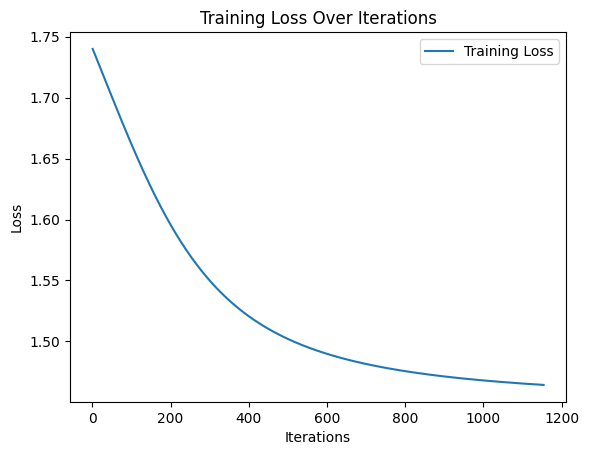

Calibrating to 8 patients
Early stopping after 6 epochs.
Optimized thetas: tensor([0.3333, 0.3333, 0.3333], grad_fn=<DivBackward0>)


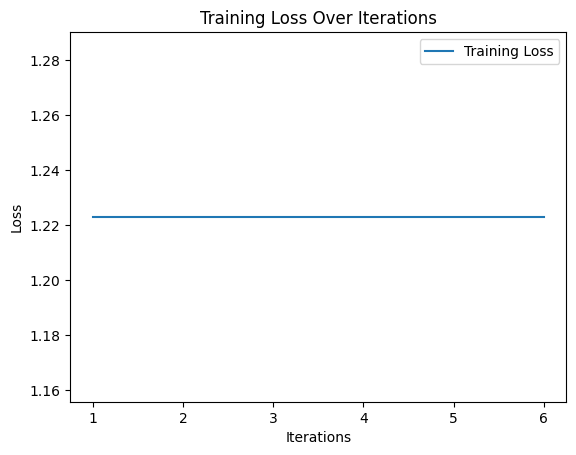

Calibrating to 17 patients
Early stopping after 340 epochs.
Optimized thetas: tensor([0.3871, 0.3152, 0.2978], grad_fn=<DivBackward0>)


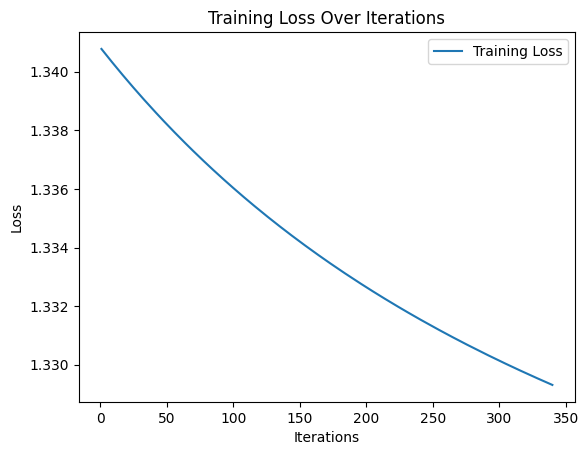

Calibrating to 50 patients
Early stopping after 669 epochs.
Optimized thetas: tensor([0.5278, 0.2454, 0.2268], grad_fn=<DivBackward0>)


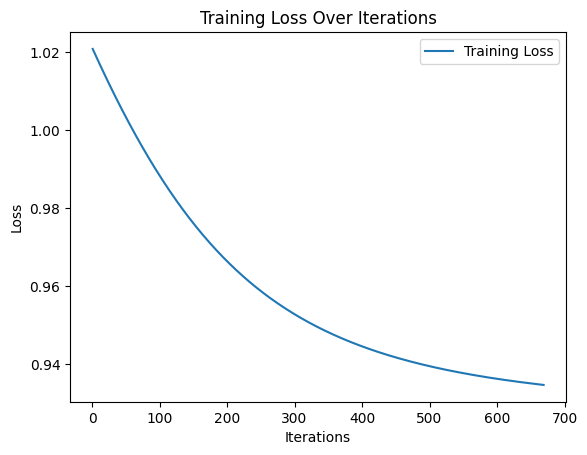


**** RUN 2 ***
Calibrating to 5 patients
Early stopping after 816 epochs.
Optimized thetas: tensor([0.5006, 0.2497, 0.2497], grad_fn=<DivBackward0>)


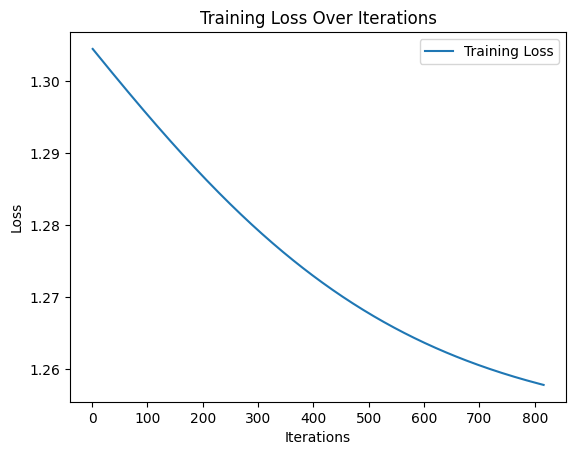

Calibrating to 8 patients
Early stopping after 426 epochs.
Optimized thetas: tensor([0.4960, 0.2089, 0.2952], grad_fn=<DivBackward0>)


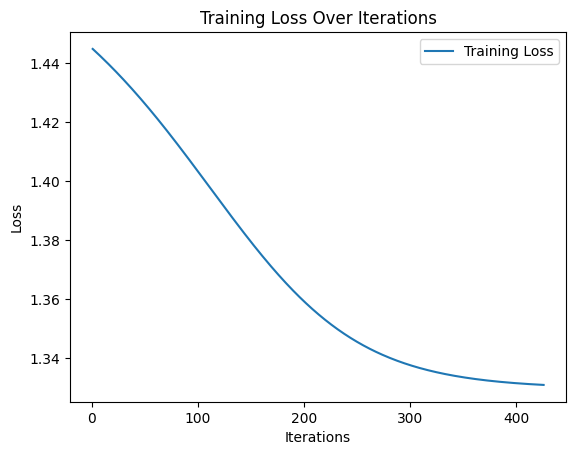

Calibrating to 17 patients
Early stopping after 546 epochs.
Optimized thetas: tensor([0.4344, 0.3209, 0.2447], grad_fn=<DivBackward0>)


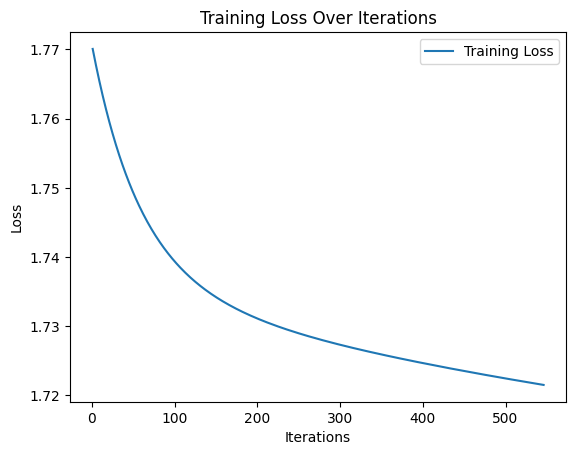

Calibrating to 50 patients
Early stopping after 511 epochs.
Optimized thetas: tensor([0.4827, 0.2616, 0.2557], grad_fn=<DivBackward0>)


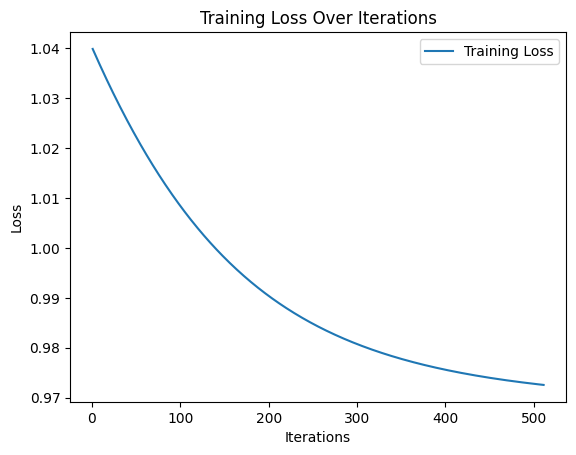


**** RUN 3 ***
Calibrating to 5 patients
Early stopping after 694 epochs.
Optimized thetas: tensor([0.5937, 0.2032, 0.2032], grad_fn=<DivBackward0>)


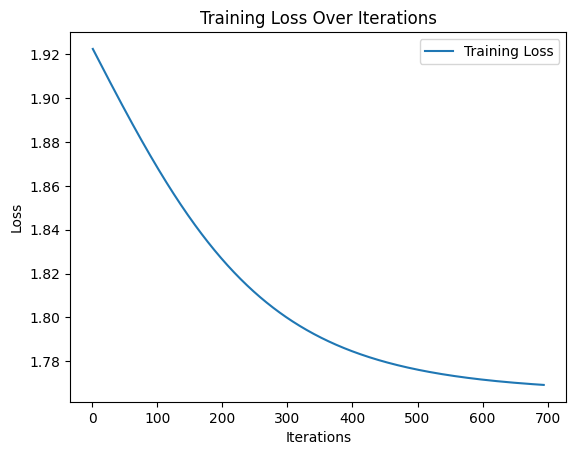

Calibrating to 8 patients
Early stopping after 322 epochs.
Optimized thetas: tensor([0.5011, 0.2054, 0.2935], grad_fn=<DivBackward0>)


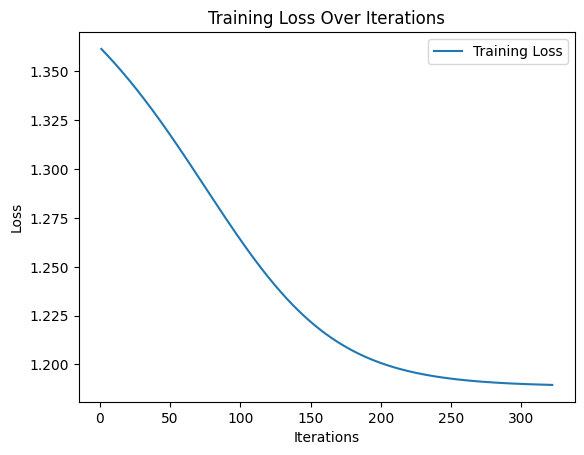

Calibrating to 17 patients
Early stopping after 594 epochs.
Optimized thetas: tensor([0.4471, 0.2938, 0.2591], grad_fn=<DivBackward0>)


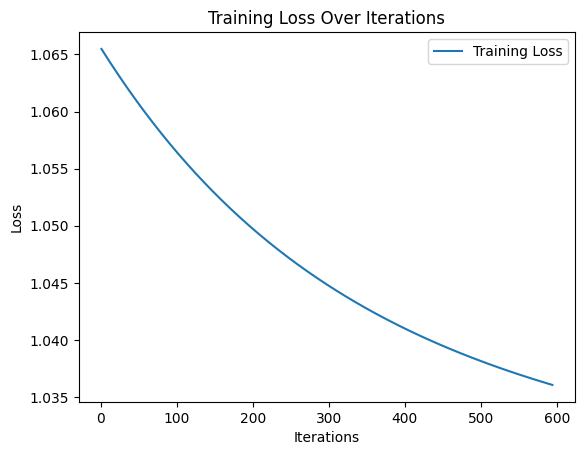

Calibrating to 50 patients
Early stopping after 563 epochs.
Optimized thetas: tensor([0.4904, 0.2567, 0.2529], grad_fn=<DivBackward0>)


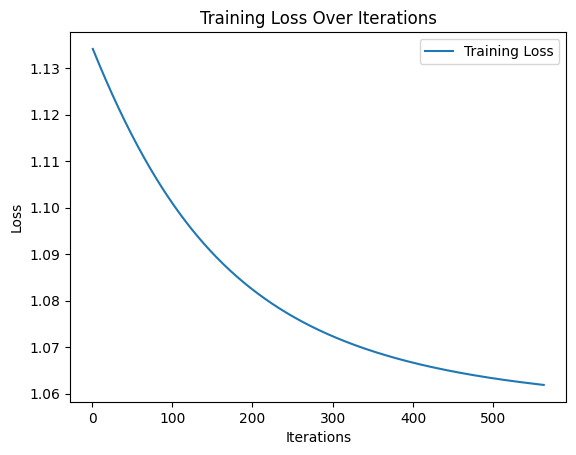


**** RUN 4 ***
Calibrating to 5 patients
Early stopping after 934 epochs.
Optimized thetas: tensor([0.6658, 0.1671, 0.1671], grad_fn=<DivBackward0>)


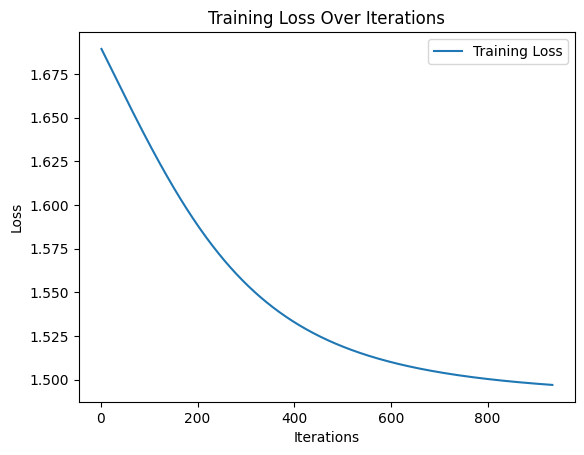

Calibrating to 8 patients
Early stopping after 1726 epochs.
Optimized thetas: tensor([0.8600, 0.0700, 0.0700], grad_fn=<DivBackward0>)


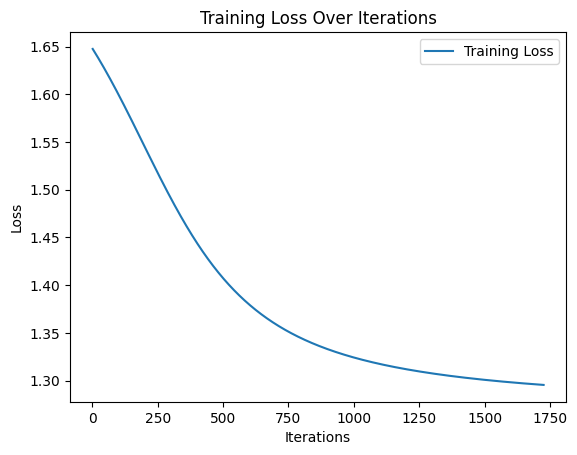

Calibrating to 17 patients
Early stopping after 987 epochs.
Optimized thetas: tensor([0.6099, 0.1901, 0.1999], grad_fn=<DivBackward0>)


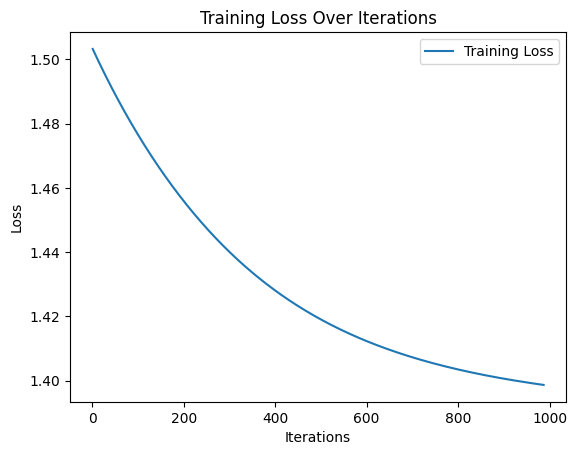

Calibrating to 50 patients
Early stopping after 697 epochs.
Optimized thetas: tensor([0.5230, 0.2282, 0.2488], grad_fn=<DivBackward0>)


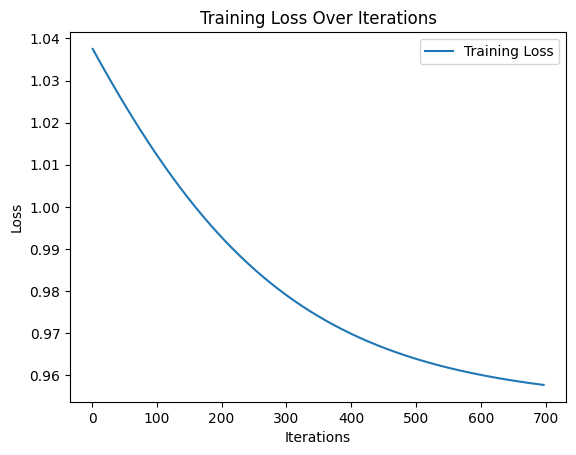


**** RUN 5 ***
Calibrating to 5 patients
Early stopping after 1370 epochs.
Optimized thetas: tensor([0.6138, 0.1931, 0.1931], grad_fn=<DivBackward0>)


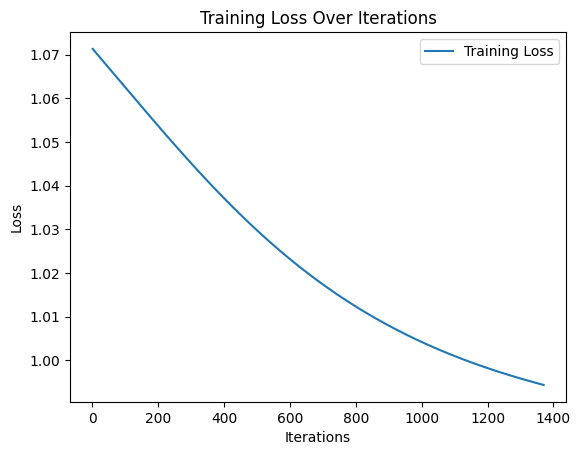

Calibrating to 8 patients
Early stopping after 1966 epochs.
Optimized thetas: tensor([0.7825, 0.1088, 0.1088], grad_fn=<DivBackward0>)


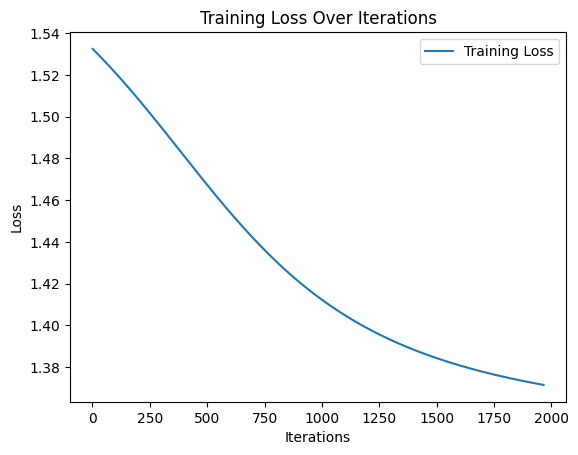

Calibrating to 17 patients
Early stopping after 867 epochs.
Optimized thetas: tensor([0.6482, 0.1956, 0.1563], grad_fn=<DivBackward0>)


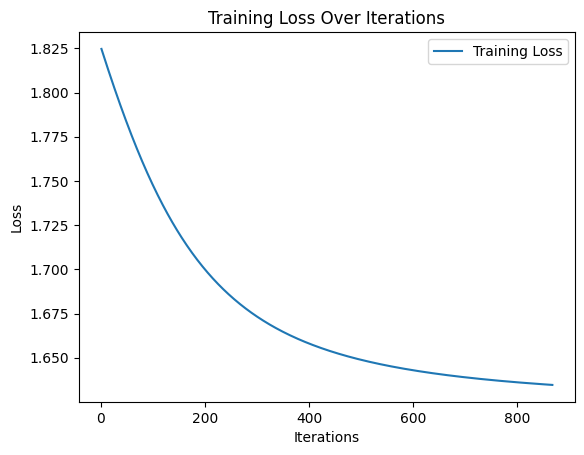

Calibrating to 50 patients
Early stopping after 502 epochs.
Optimized thetas: tensor([0.4376, 0.2919, 0.2705], grad_fn=<DivBackward0>)


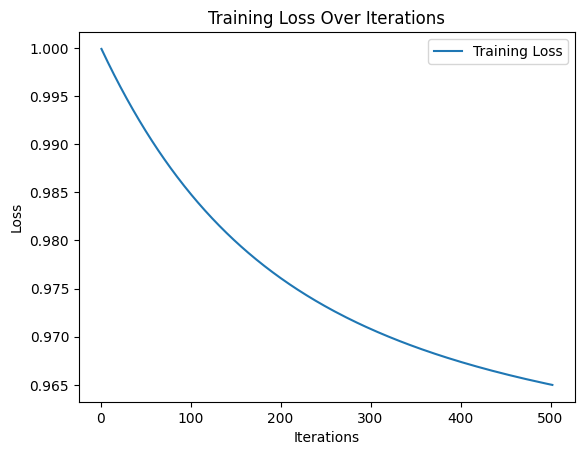


**** RUN 6 ***
Calibrating to 5 patients
Early stopping after 1256 epochs.
Optimized thetas: tensor([0.7064, 0.1468, 0.1468], grad_fn=<DivBackward0>)


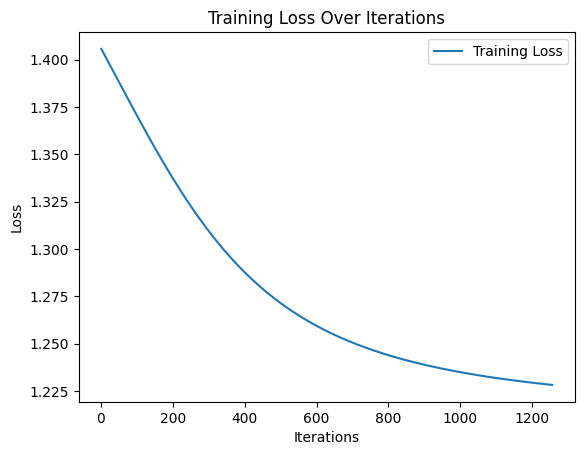

Calibrating to 8 patients
Early stopping after 1415 epochs.
Optimized thetas: tensor([0.7528, 0.1489, 0.0984], grad_fn=<DivBackward0>)


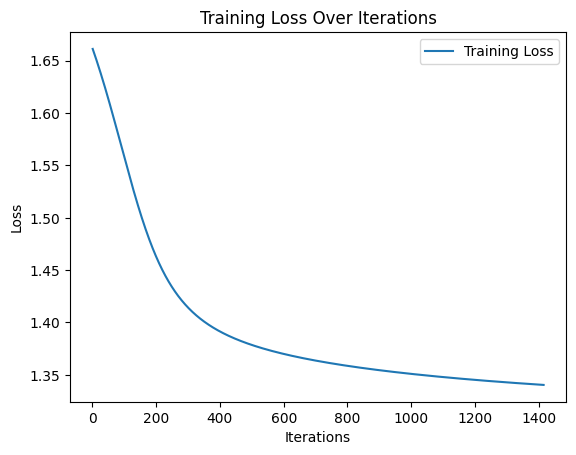

Calibrating to 17 patients
Early stopping after 587 epochs.
Optimized thetas: tensor([0.4571, 0.2824, 0.2606], grad_fn=<DivBackward0>)


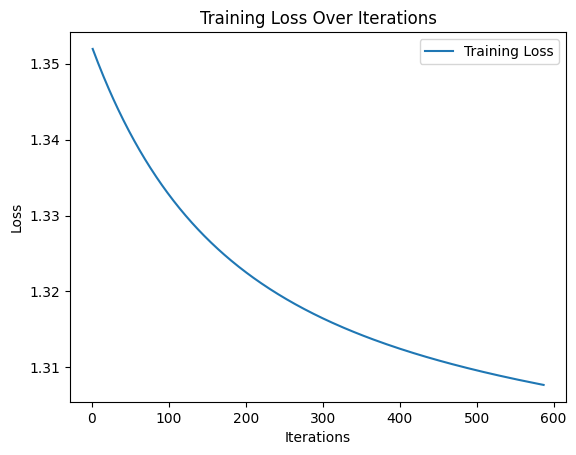

Calibrating to 50 patients
Early stopping after 442 epochs.
Optimized thetas: tensor([0.4247, 0.2990, 0.2763], grad_fn=<DivBackward0>)


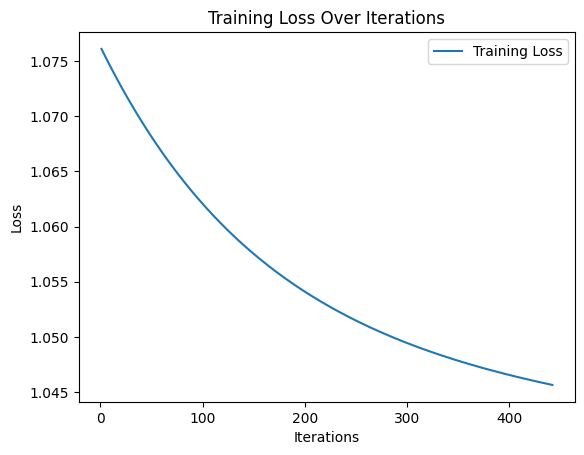


**** RUN 7 ***
Calibrating to 5 patients
Early stopping after 816 epochs.
Optimized thetas: tensor([0.5006, 0.2497, 0.2497], grad_fn=<DivBackward0>)


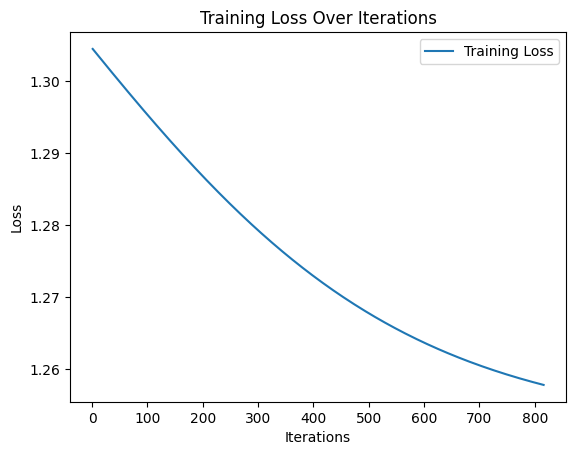

Calibrating to 8 patients
Early stopping after 1417 epochs.
Optimized thetas: tensor([0.7529, 0.1489, 0.0983], grad_fn=<DivBackward0>)


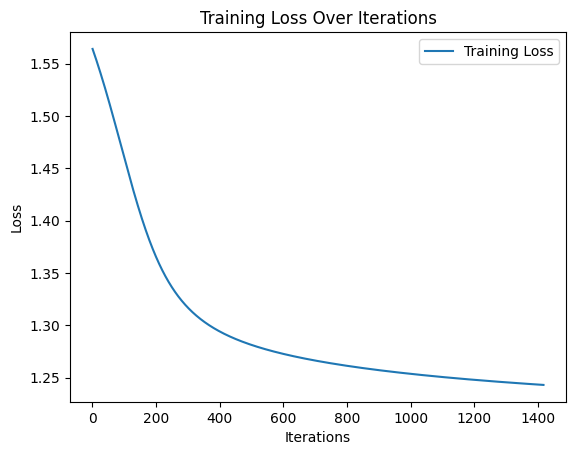

Calibrating to 17 patients
Early stopping after 370 epochs.
Optimized thetas: tensor([0.4333, 0.2842, 0.2826], grad_fn=<DivBackward0>)


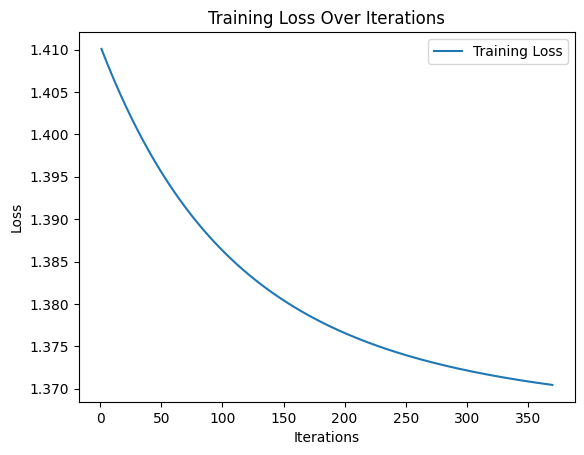

Calibrating to 50 patients
Early stopping after 603 epochs.
Optimized thetas: tensor([0.5203, 0.2386, 0.2411], grad_fn=<DivBackward0>)


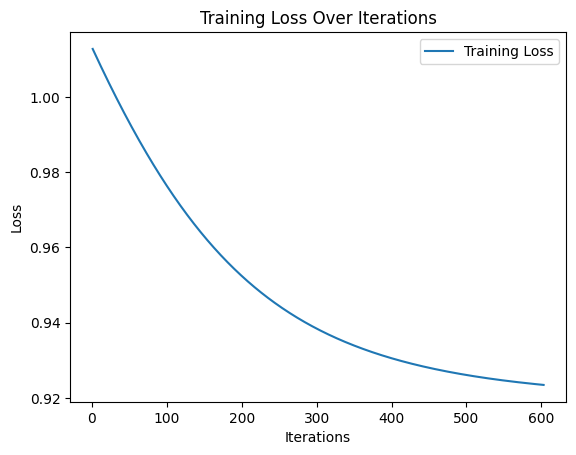


**** RUN 8 ***
Calibrating to 5 patients
Early stopping after 1256 epochs.
Optimized thetas: tensor([0.7064, 0.1468, 0.1468], grad_fn=<DivBackward0>)


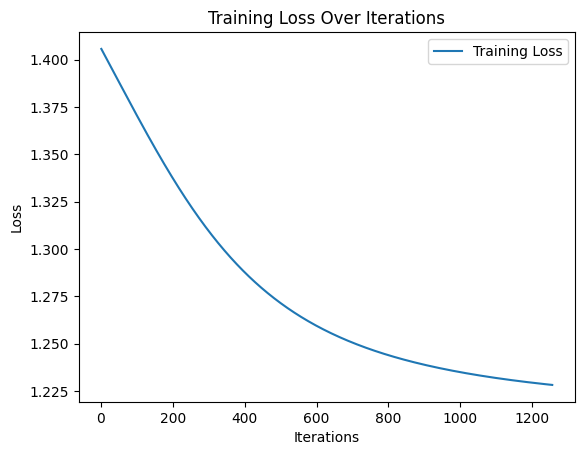

Calibrating to 8 patients
Early stopping after 658 epochs.
Optimized thetas: tensor([0.4804, 0.2194, 0.3002], grad_fn=<DivBackward0>)


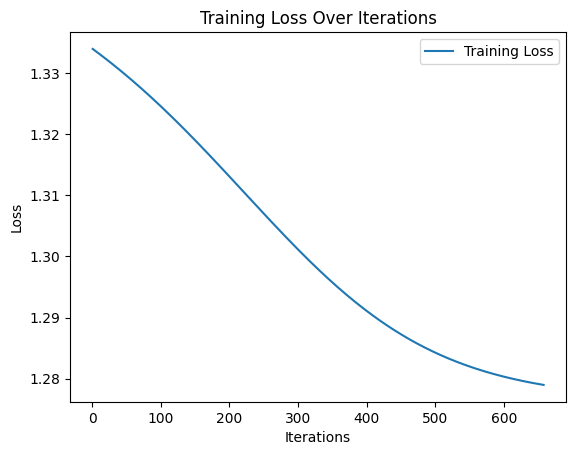

Calibrating to 17 patients
Early stopping after 505 epochs.
Optimized thetas: tensor([0.4531, 0.2784, 0.2685], grad_fn=<DivBackward0>)


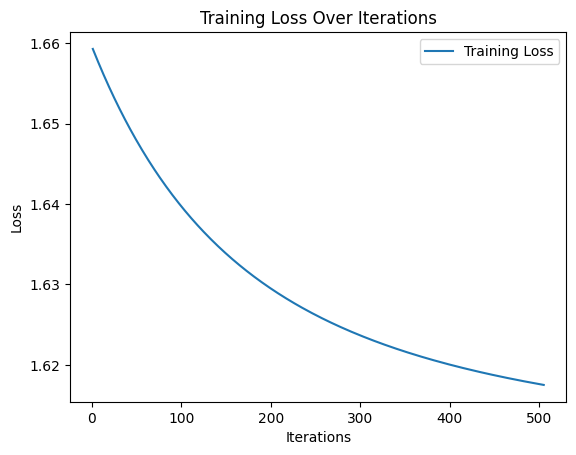

Calibrating to 50 patients
Early stopping after 639 epochs.
Optimized thetas: tensor([0.4911, 0.2690, 0.2399], grad_fn=<DivBackward0>)


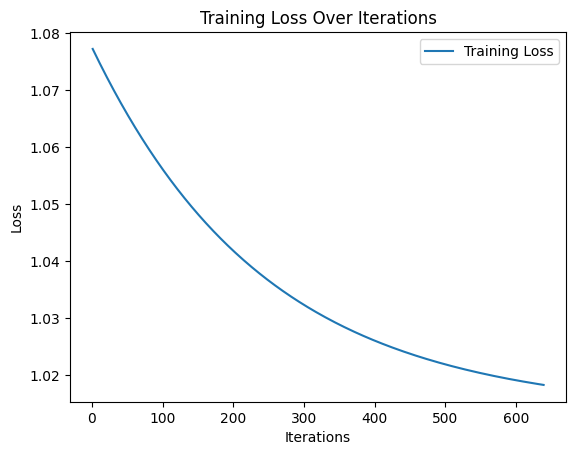


**** RUN 9 ***
Calibrating to 5 patients
Early stopping after 1256 epochs.
Optimized thetas: tensor([0.7064, 0.1468, 0.1468], grad_fn=<DivBackward0>)


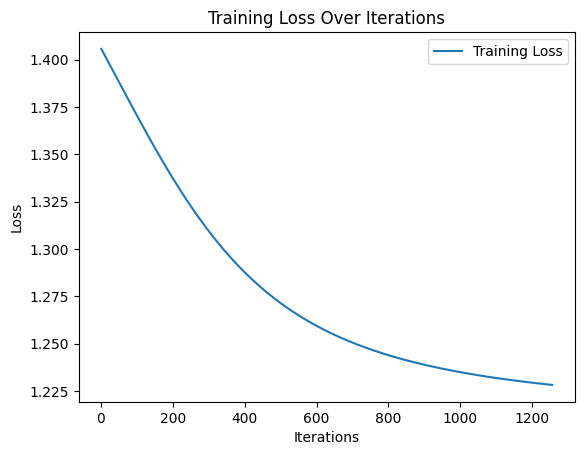

Calibrating to 8 patients
Early stopping after 6 epochs.
Optimized thetas: tensor([0.3333, 0.3333, 0.3333], grad_fn=<DivBackward0>)


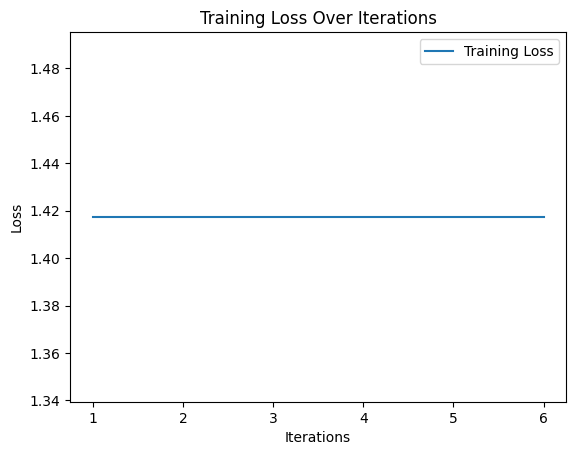

Calibrating to 17 patients
Early stopping after 719 epochs.
Optimized thetas: tensor([0.4533, 0.3248, 0.2218], grad_fn=<DivBackward0>)


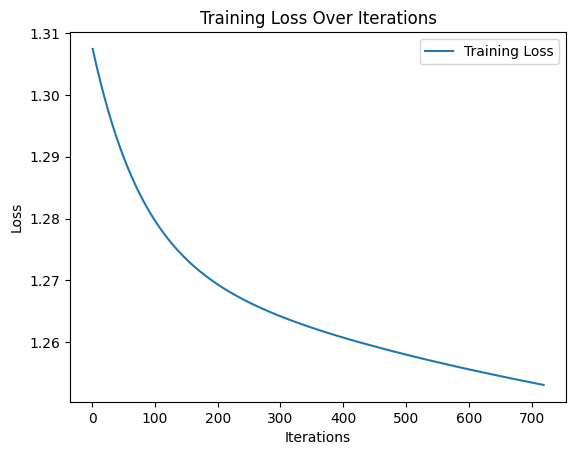

Calibrating to 50 patients
Early stopping after 564 epochs.
Optimized thetas: tensor([0.4627, 0.2729, 0.2645], grad_fn=<DivBackward0>)


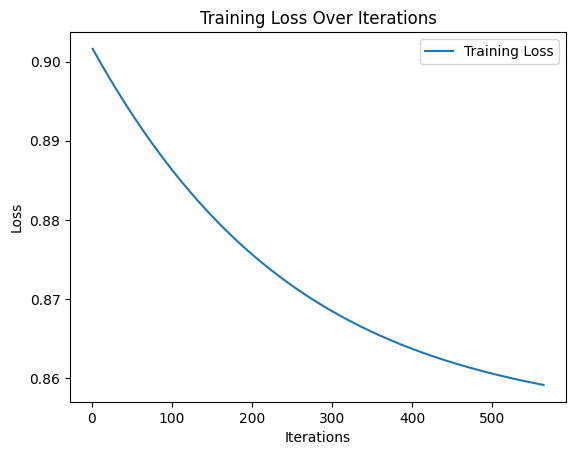


**** RUN 10 ***
Calibrating to 5 patients
Early stopping after 1000 epochs.
Optimized thetas: tensor([0.6002, 0.1999, 0.1999], grad_fn=<DivBackward0>)


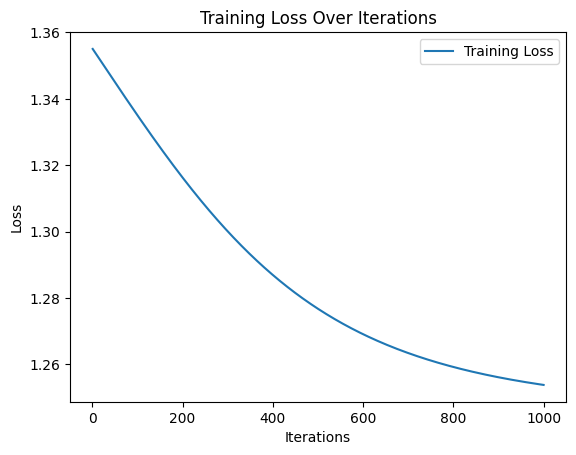

Calibrating to 8 patients
Early stopping after 1967 epochs.
Optimized thetas: tensor([0.7826, 0.1087, 0.1087], grad_fn=<DivBackward0>)


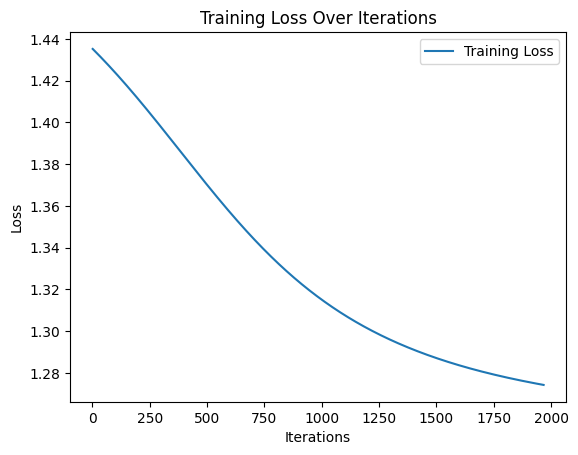

Calibrating to 17 patients
Early stopping after 231 epochs.
Optimized thetas: tensor([0.3706, 0.3192, 0.3102], grad_fn=<DivBackward0>)


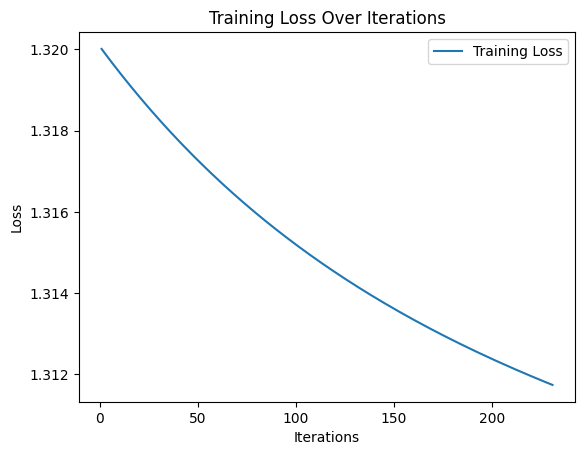

Calibrating to 50 patients
Early stopping after 489 epochs.
Optimized thetas: tensor([0.4369, 0.2997, 0.2634], grad_fn=<DivBackward0>)


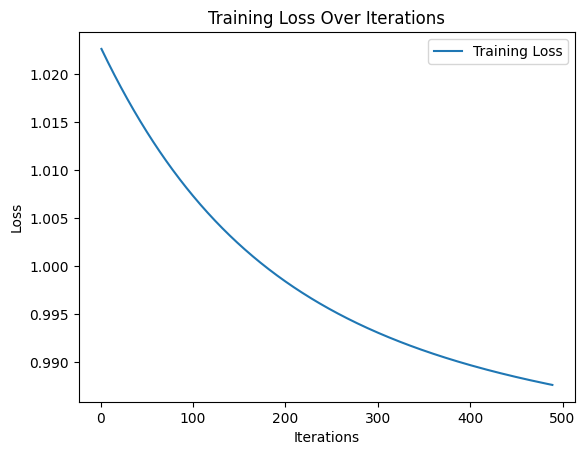


**** RUN 11 ***
Calibrating to 5 patients
Early stopping after 815 epochs.
Optimized thetas: tensor([0.5961, 0.2020, 0.2020], grad_fn=<DivBackward0>)


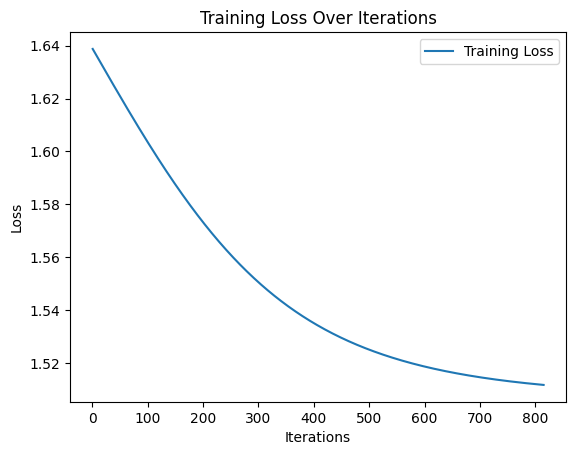

Calibrating to 8 patients
Early stopping after 772 epochs.
Optimized thetas: tensor([0.6025, 0.1921, 0.2054], grad_fn=<DivBackward0>)


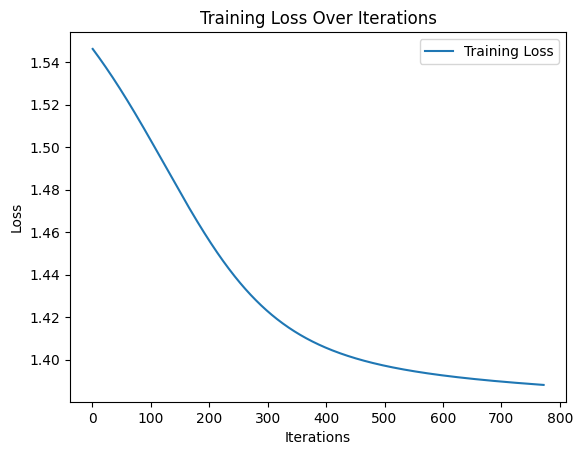

Calibrating to 17 patients
Early stopping after 364 epochs.
Optimized thetas: tensor([0.3939, 0.3118, 0.2944], grad_fn=<DivBackward0>)


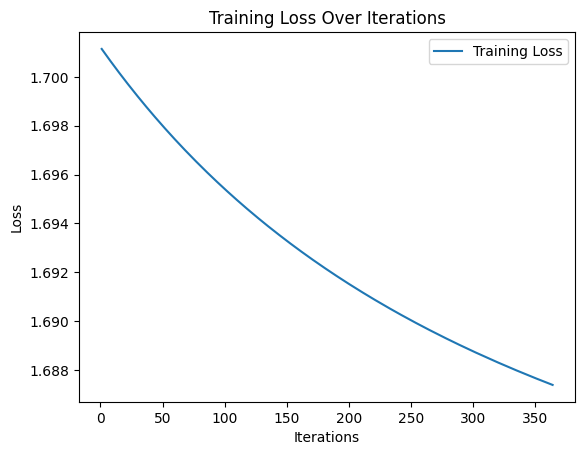

Calibrating to 50 patients
Early stopping after 466 epochs.
Optimized thetas: tensor([0.4452, 0.2823, 0.2725], grad_fn=<DivBackward0>)


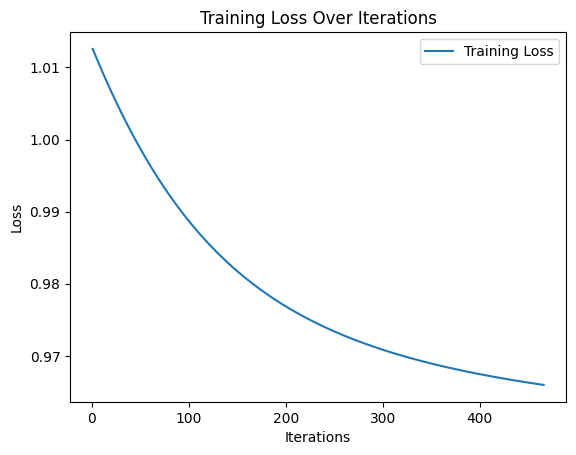


**** RUN 12 ***
Calibrating to 5 patients
Early stopping after 1256 epochs.
Optimized thetas: tensor([0.7064, 0.1468, 0.1468], grad_fn=<DivBackward0>)


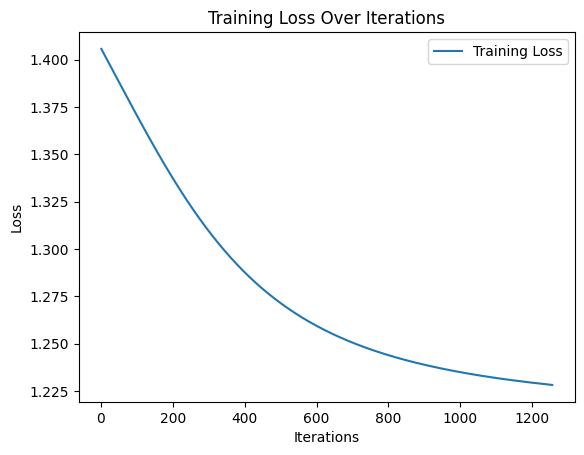

Calibrating to 8 patients
Early stopping after 426 epochs.
Optimized thetas: tensor([0.4960, 0.2089, 0.2952], grad_fn=<DivBackward0>)


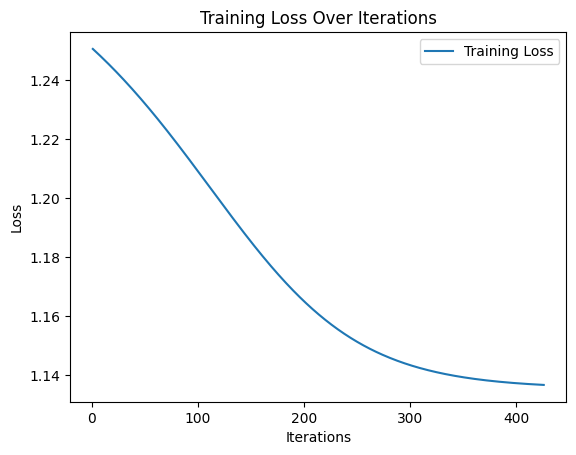

Calibrating to 17 patients
Early stopping after 790 epochs.
Optimized thetas: tensor([0.5578, 0.2359, 0.2063], grad_fn=<DivBackward0>)


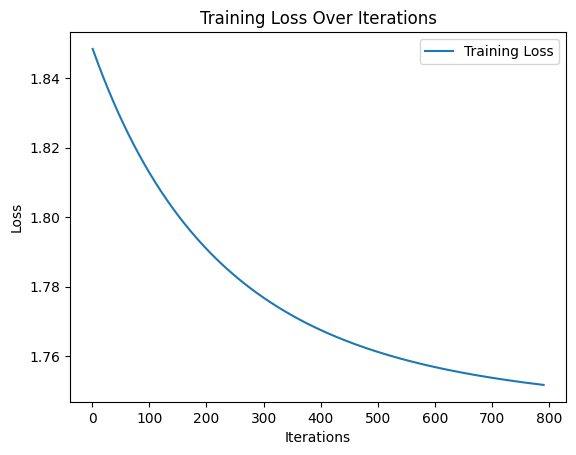

Calibrating to 50 patients
Early stopping after 861 epochs.
Optimized thetas: tensor([0.4819, 0.2973, 0.2208], grad_fn=<DivBackward0>)


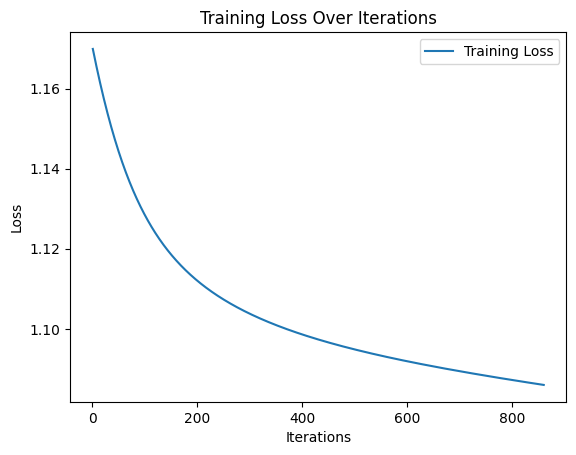


**** RUN 13 ***
Calibrating to 5 patients
Early stopping after 1154 epochs.
Optimized thetas: tensor([0.7459, 0.1270, 0.1270], grad_fn=<DivBackward0>)


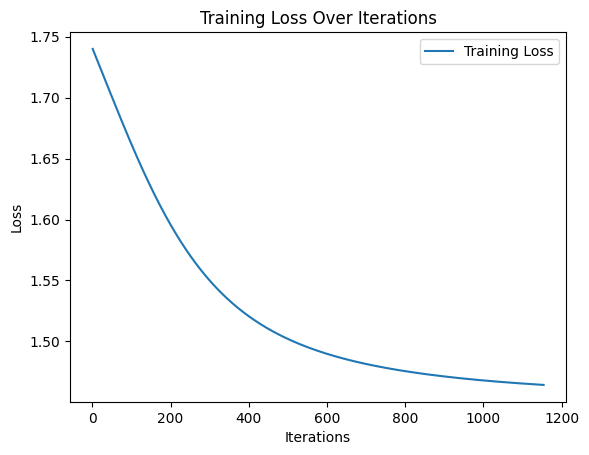

Calibrating to 8 patients
Early stopping after 1966 epochs.
Optimized thetas: tensor([0.7825, 0.1088, 0.1088], grad_fn=<DivBackward0>)


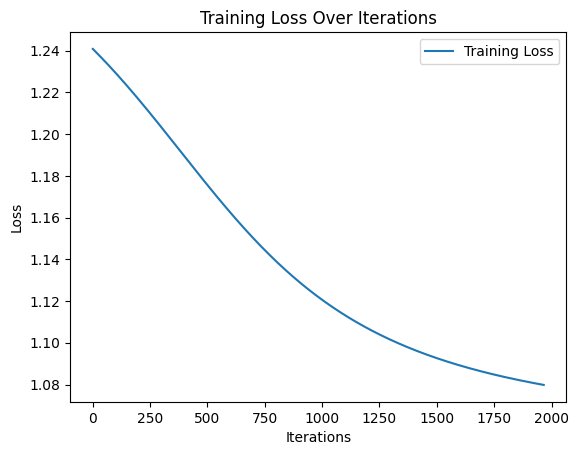

Calibrating to 17 patients
Early stopping after 928 epochs.
Optimized thetas: tensor([0.5796, 0.2308, 0.1896], grad_fn=<DivBackward0>)


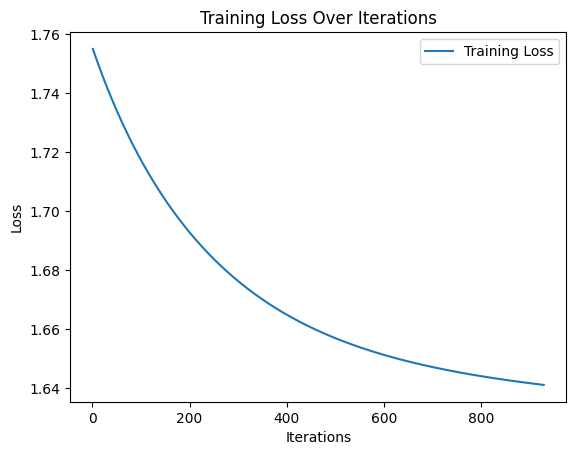

Calibrating to 50 patients
Early stopping after 555 epochs.
Optimized thetas: tensor([0.4691, 0.2613, 0.2696], grad_fn=<DivBackward0>)


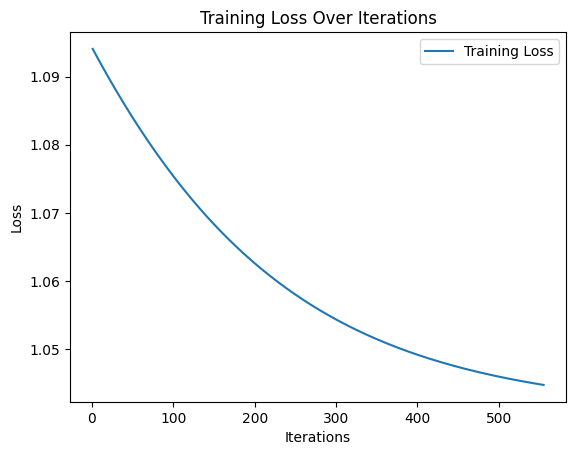


**** RUN 14 ***
Calibrating to 5 patients
Early stopping after 1256 epochs.
Optimized thetas: tensor([0.7064, 0.1468, 0.1468], grad_fn=<DivBackward0>)


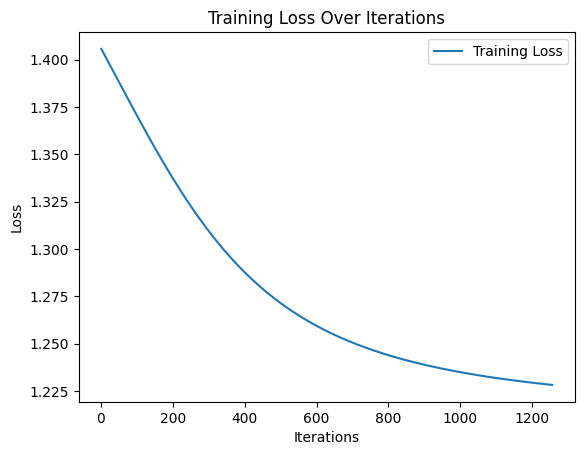

Calibrating to 8 patients
Early stopping after 1726 epochs.
Optimized thetas: tensor([0.8600, 0.0700, 0.0700], grad_fn=<DivBackward0>)


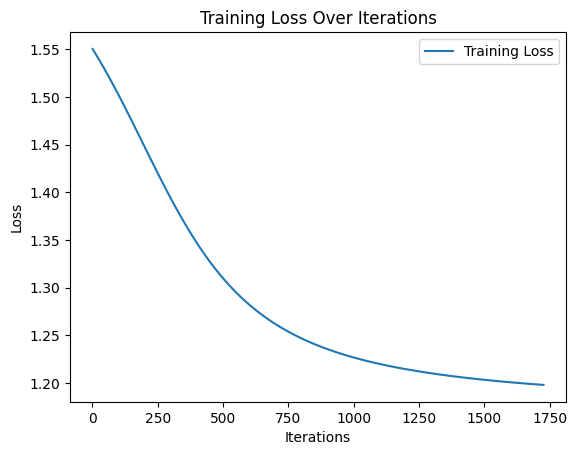

Calibrating to 17 patients
Early stopping after 535 epochs.
Optimized thetas: tensor([0.4538, 0.2823, 0.2639], grad_fn=<DivBackward0>)


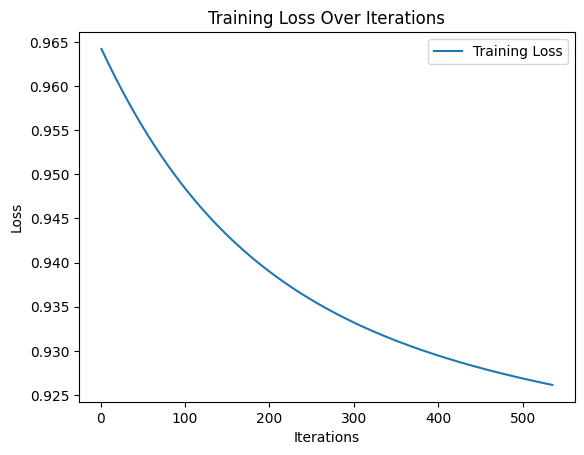

Calibrating to 50 patients
Early stopping after 321 epochs.
Optimized thetas: tensor([0.3930, 0.3087, 0.2983], grad_fn=<DivBackward0>)


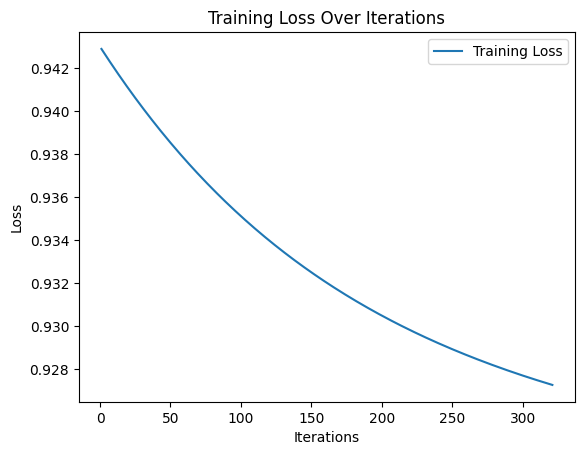


**** RUN 15 ***
Calibrating to 5 patients
Early stopping after 1000 epochs.
Optimized thetas: tensor([0.6002, 0.1999, 0.1999], grad_fn=<DivBackward0>)


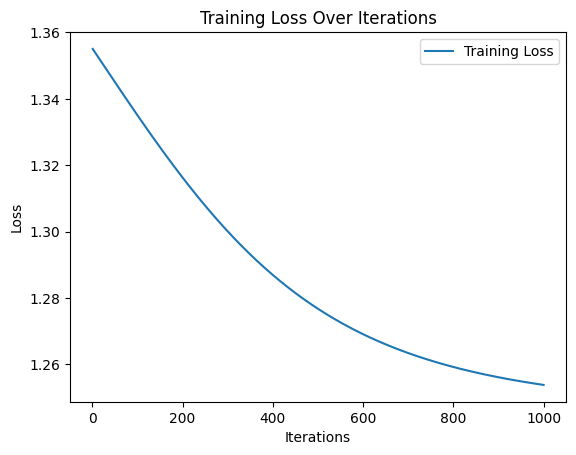

Calibrating to 8 patients
Early stopping after 770 epochs.
Optimized thetas: tensor([0.6023, 0.1921, 0.2056], grad_fn=<DivBackward0>)


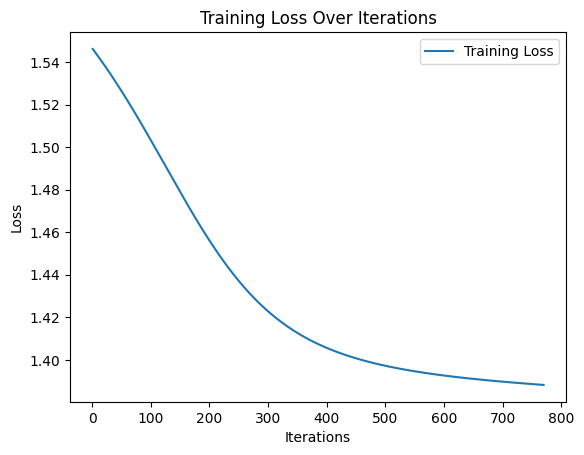

Calibrating to 17 patients
Early stopping after 1854 epochs.
Optimized thetas: tensor([0.5737, 0.3209, 0.1054], grad_fn=<DivBackward0>)


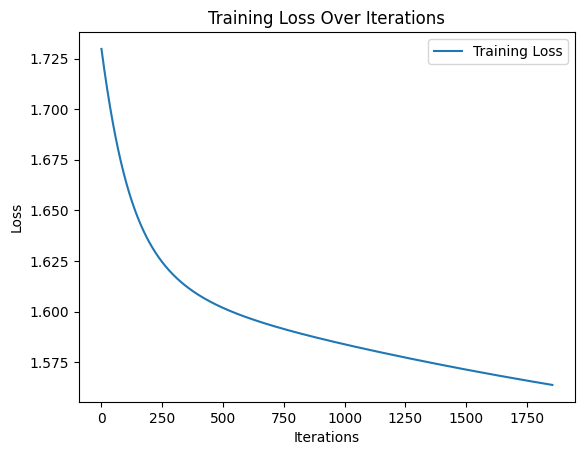

Calibrating to 50 patients
Early stopping after 372 epochs.
Optimized thetas: tensor([0.4068, 0.3075, 0.2857], grad_fn=<DivBackward0>)


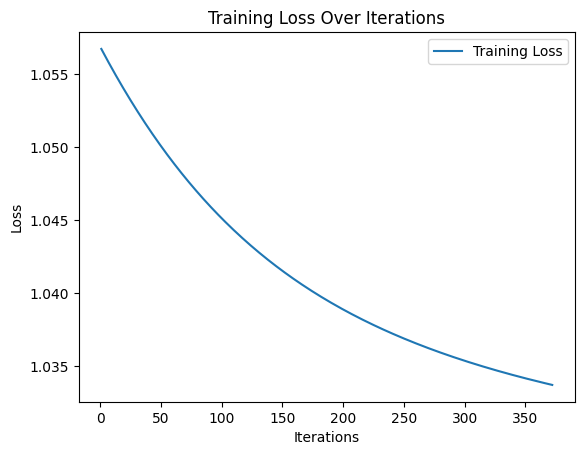


**** RUN 16 ***
Calibrating to 5 patients
Early stopping after 1154 epochs.
Optimized thetas: tensor([0.7459, 0.1270, 0.1270], grad_fn=<DivBackward0>)


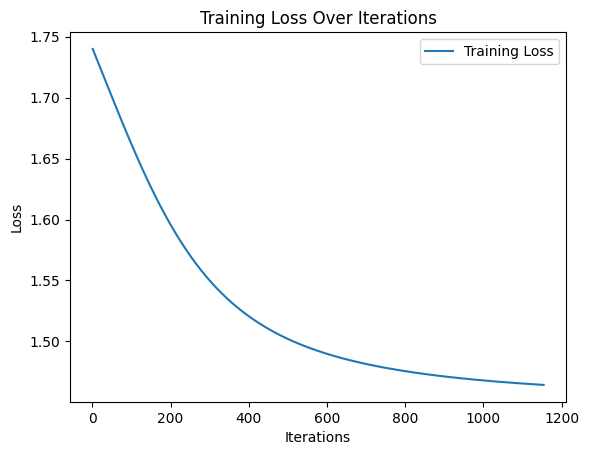

Calibrating to 8 patients
Early stopping after 504 epochs.
Optimized thetas: tensor([0.5664, 0.2000, 0.2336], grad_fn=<DivBackward0>)


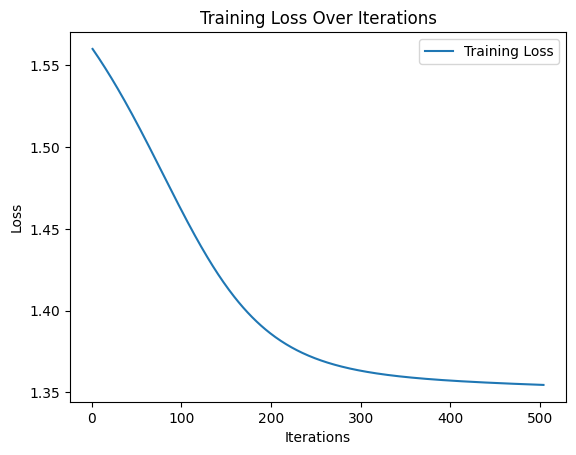

Calibrating to 17 patients
Early stopping after 1250 epochs.
Optimized thetas: tensor([0.4762, 0.3129, 0.2109], grad_fn=<DivBackward0>)


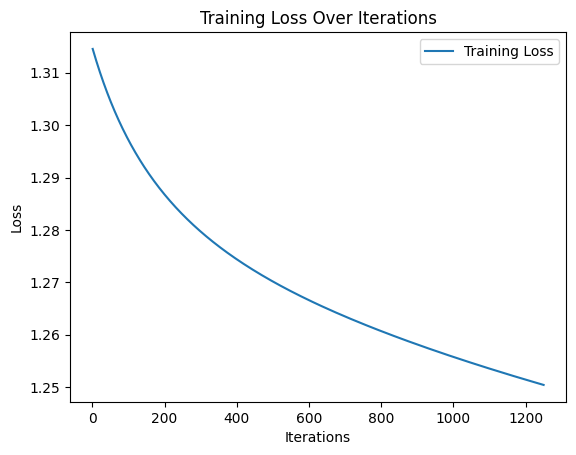

Calibrating to 50 patients
Early stopping after 310 epochs.
Optimized thetas: tensor([0.3914, 0.3036, 0.3050], grad_fn=<DivBackward0>)


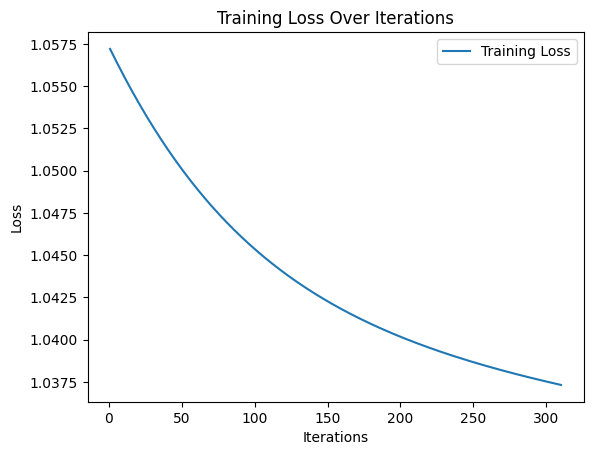


**** RUN 17 ***
Calibrating to 5 patients
Early stopping after 1256 epochs.
Optimized thetas: tensor([0.7064, 0.1468, 0.1468], grad_fn=<DivBackward0>)


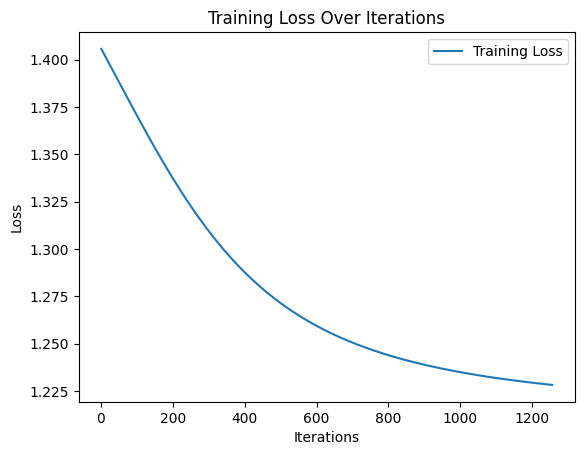

Calibrating to 8 patients
Early stopping after 6 epochs.
Optimized thetas: tensor([0.3333, 0.3333, 0.3333], grad_fn=<DivBackward0>)


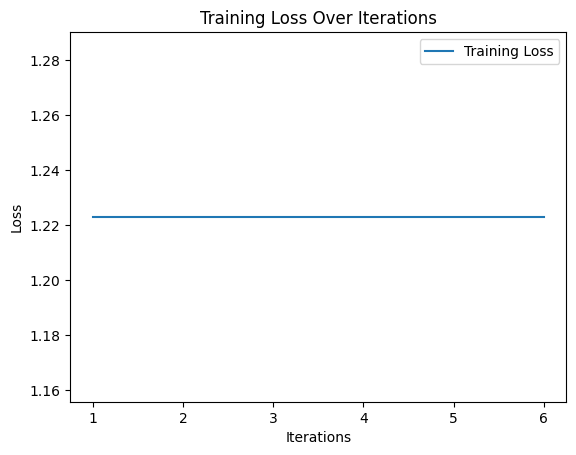

Calibrating to 17 patients
Early stopping after 6 epochs.
Optimized thetas: tensor([0.3335, 0.3334, 0.3331], grad_fn=<DivBackward0>)


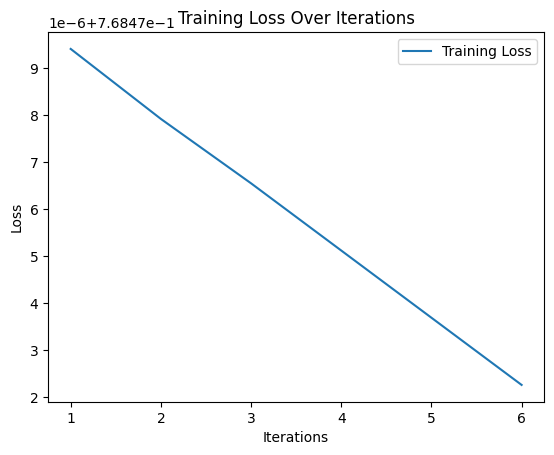

Calibrating to 50 patients
Early stopping after 280 epochs.
Optimized thetas: tensor([0.3906, 0.3097, 0.2998], grad_fn=<DivBackward0>)


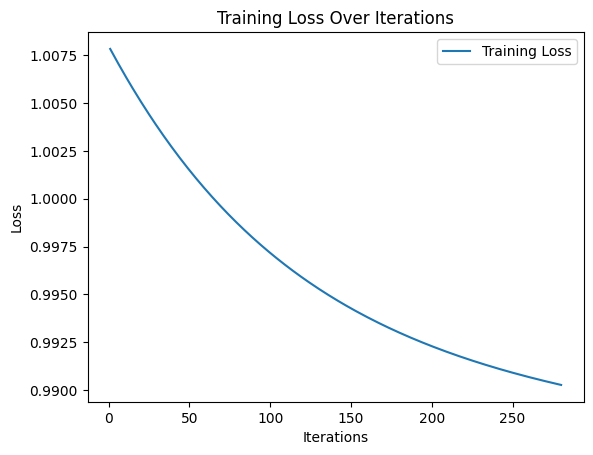


**** RUN 18 ***
Calibrating to 5 patients
Early stopping after 1370 epochs.
Optimized thetas: tensor([0.6138, 0.1931, 0.1931], grad_fn=<DivBackward0>)


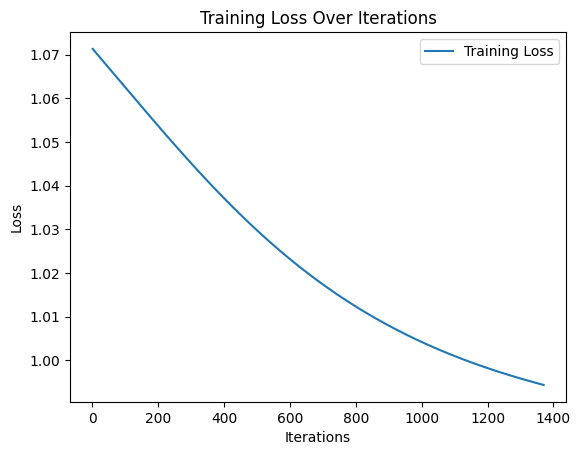

Calibrating to 8 patients
Early stopping after 1606 epochs.
Optimized thetas: tensor([0.8910, 0.0545, 0.0545], grad_fn=<DivBackward0>)


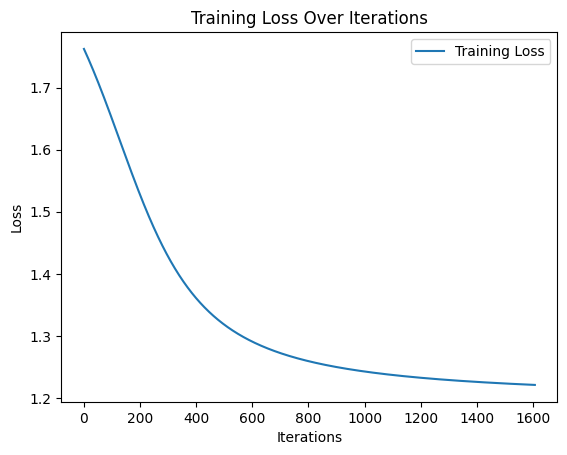

Calibrating to 17 patients
Early stopping after 936 epochs.
Optimized thetas: tensor([0.5798, 0.2375, 0.1827], grad_fn=<DivBackward0>)


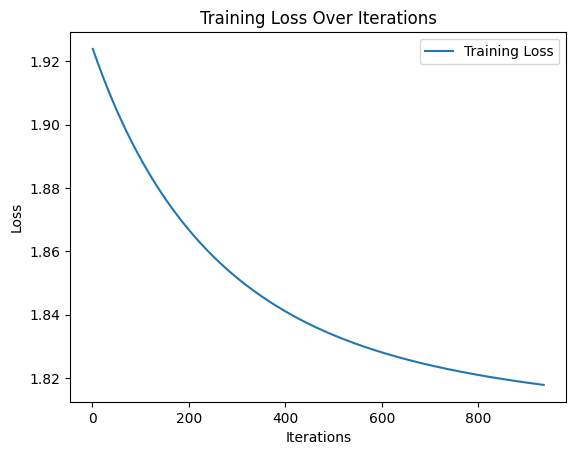

Calibrating to 50 patients
Early stopping after 560 epochs.
Optimized thetas: tensor([0.4452, 0.2853, 0.2695], grad_fn=<DivBackward0>)


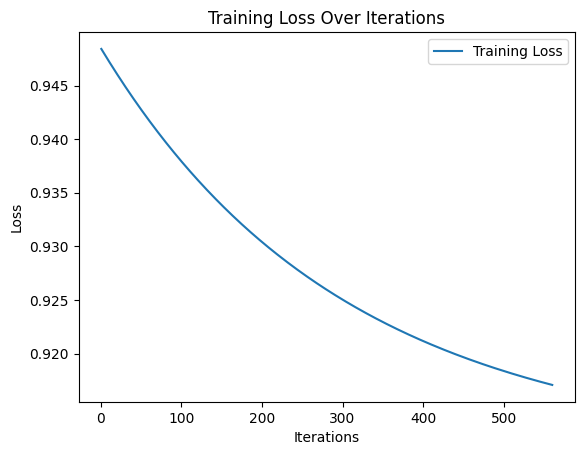


**** RUN 19 ***
Calibrating to 5 patients
Early stopping after 1001 epochs.
Optimized thetas: tensor([0.6003, 0.1999, 0.1999], grad_fn=<DivBackward0>)


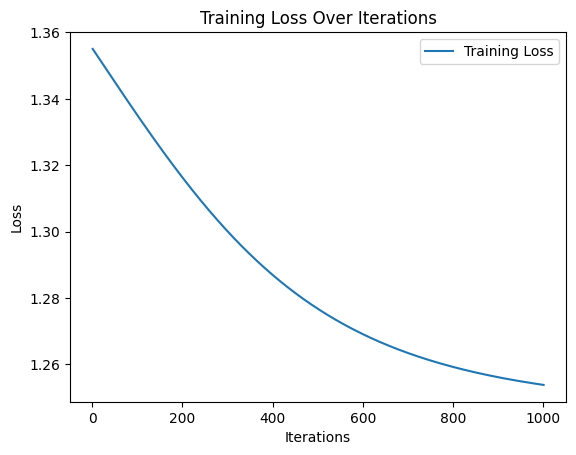

Calibrating to 8 patients
Early stopping after 1812 epochs.
Optimized thetas: tensor([0.8757, 0.0721, 0.0522], grad_fn=<DivBackward0>)


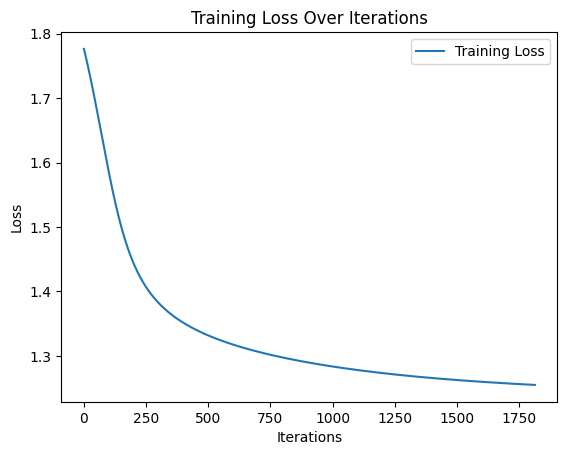

Calibrating to 17 patients
Early stopping after 945 epochs.
Optimized thetas: tensor([0.6015, 0.1915, 0.2070], grad_fn=<DivBackward0>)


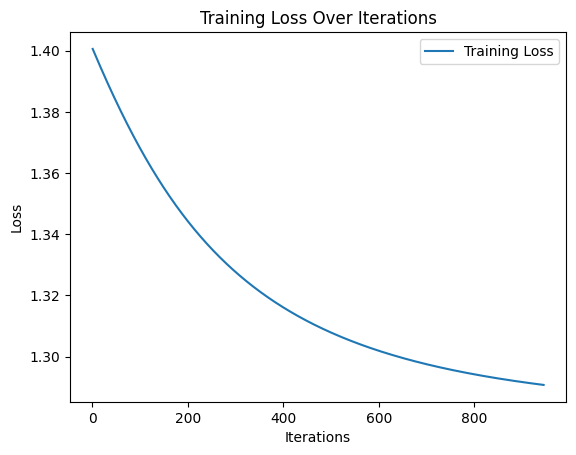

Calibrating to 50 patients
Early stopping after 363 epochs.
Optimized thetas: tensor([0.4012, 0.2919, 0.3069], grad_fn=<DivBackward0>)


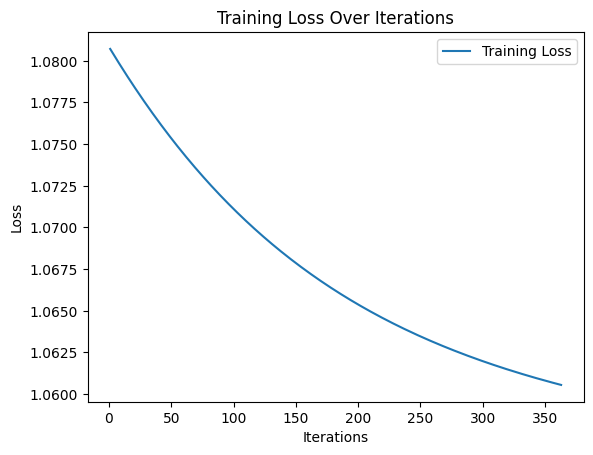


**** RUN 20 ***
Calibrating to 5 patients
Early stopping after 1001 epochs.
Optimized thetas: tensor([0.6003, 0.1999, 0.1999], grad_fn=<DivBackward0>)


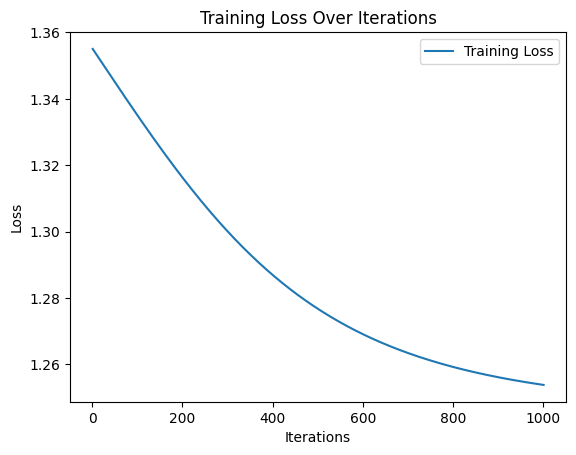

Calibrating to 8 patients
Early stopping after 773 epochs.
Optimized thetas: tensor([0.6026, 0.1921, 0.2053], grad_fn=<DivBackward0>)


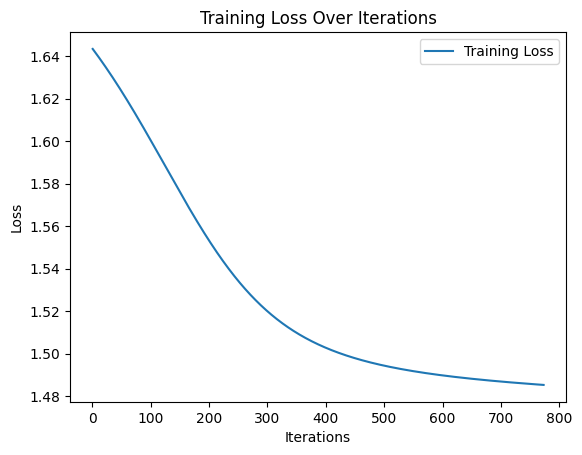

Calibrating to 17 patients
Early stopping after 736 epochs.
Optimized thetas: tensor([0.4761, 0.2767, 0.2473], grad_fn=<DivBackward0>)


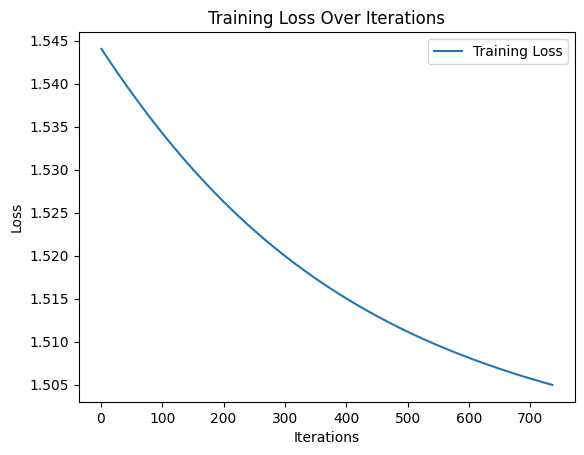

Calibrating to 50 patients
Early stopping after 449 epochs.
Optimized thetas: tensor([0.4508, 0.2684, 0.2808], grad_fn=<DivBackward0>)


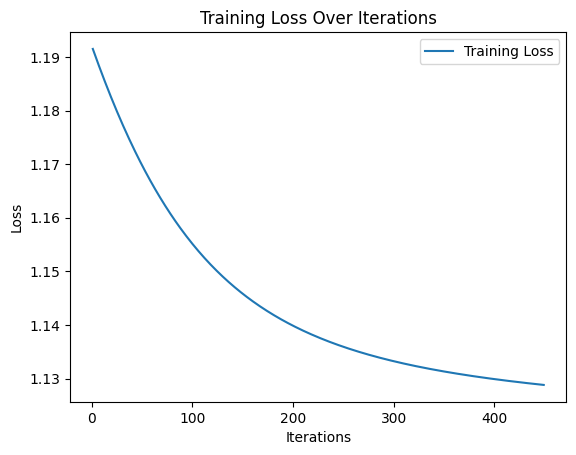


**** RUN 21 ***
Calibrating to 5 patients
Early stopping after 1086 epochs.
Optimized thetas: tensor([0.7699, 0.1150, 0.1150], grad_fn=<DivBackward0>)


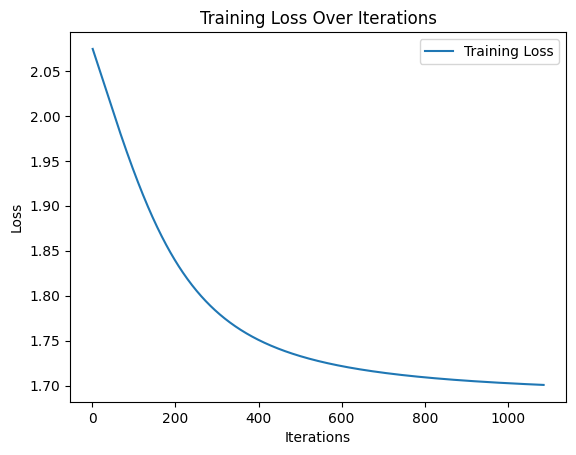

Calibrating to 8 patients
Early stopping after 1726 epochs.
Optimized thetas: tensor([0.8600, 0.0700, 0.0700], grad_fn=<DivBackward0>)


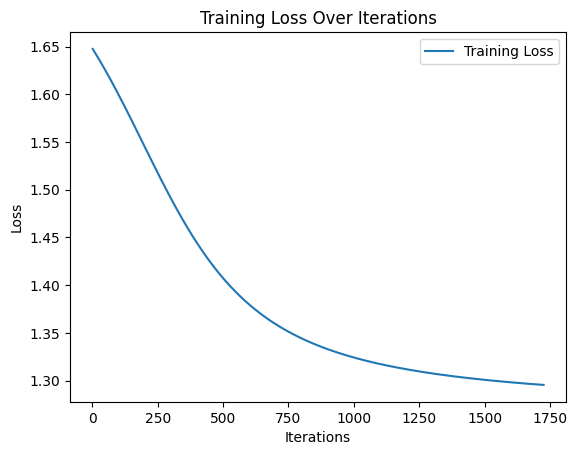

Calibrating to 17 patients
Early stopping after 646 epochs.
Optimized thetas: tensor([0.4595, 0.2759, 0.2646], grad_fn=<DivBackward0>)


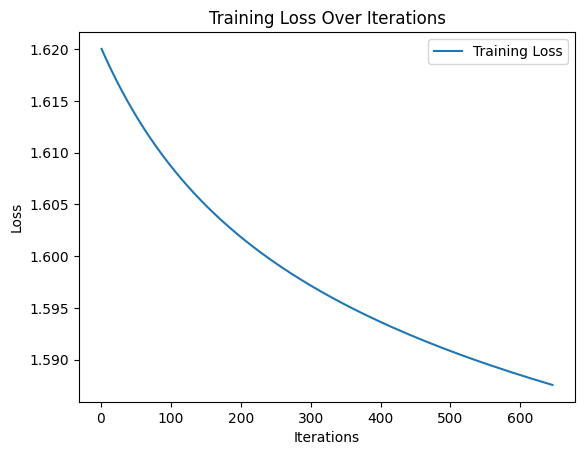

Calibrating to 50 patients
Early stopping after 514 epochs.
Optimized thetas: tensor([0.4520, 0.2853, 0.2627], grad_fn=<DivBackward0>)


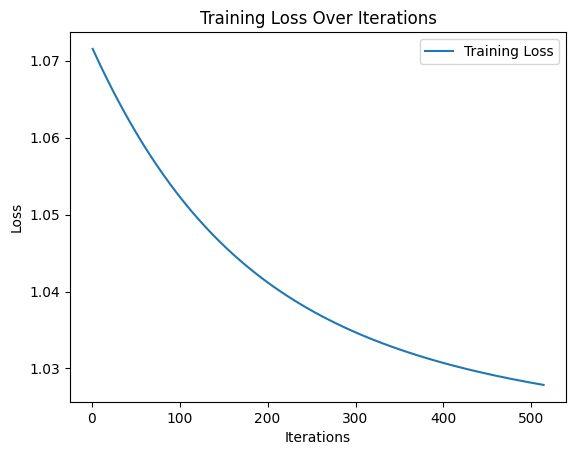


**** RUN 22 ***
Calibrating to 5 patients
Early stopping after 1001 epochs.
Optimized thetas: tensor([0.6003, 0.1999, 0.1999], grad_fn=<DivBackward0>)


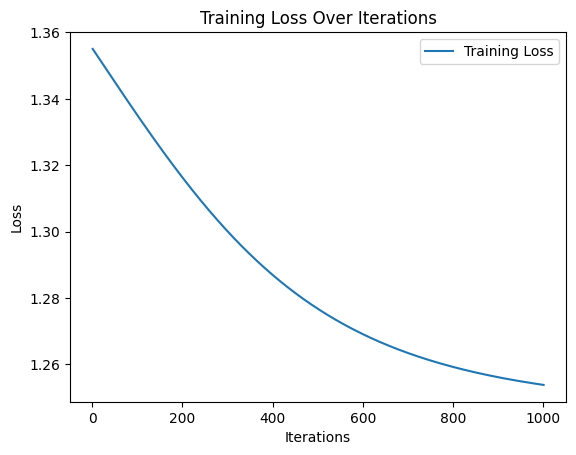

Calibrating to 8 patients
Early stopping after 1726 epochs.
Optimized thetas: tensor([0.8600, 0.0700, 0.0700], grad_fn=<DivBackward0>)


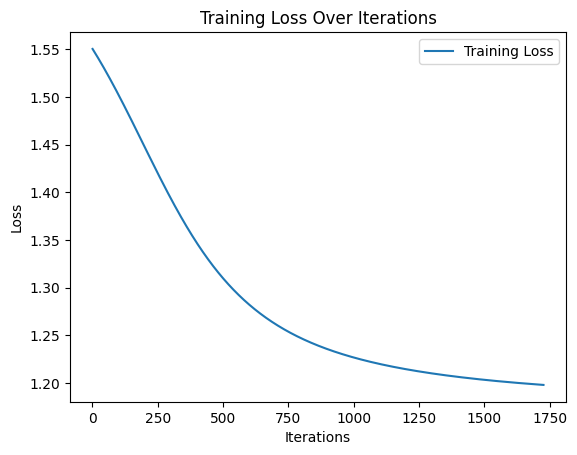

Calibrating to 17 patients
Early stopping after 416 epochs.
Optimized thetas: tensor([0.4184, 0.2934, 0.2882], grad_fn=<DivBackward0>)


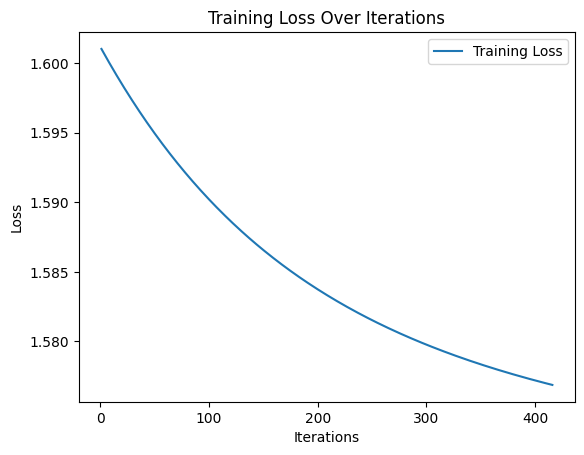

Calibrating to 50 patients
Early stopping after 536 epochs.
Optimized thetas: tensor([0.4424, 0.2668, 0.2908], grad_fn=<DivBackward0>)


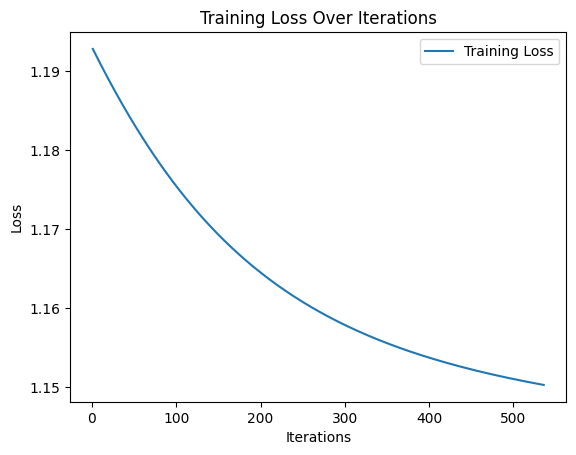


**** RUN 23 ***
Calibrating to 5 patients
Early stopping after 416 epochs.
Optimized thetas: tensor([0.3852, 0.3074, 0.3074], grad_fn=<DivBackward0>)


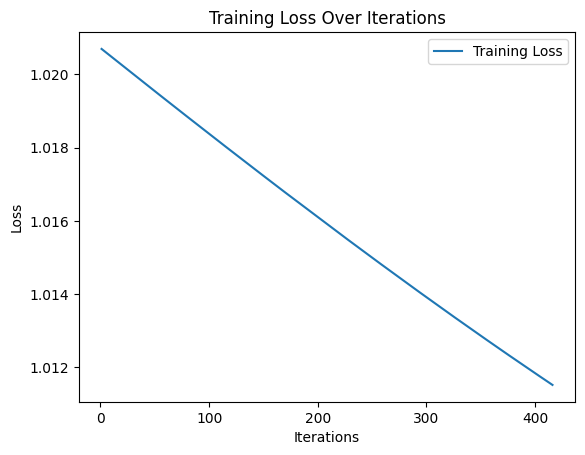

Calibrating to 8 patients
Early stopping after 1971 epochs.
Optimized thetas: tensor([0.7829, 0.1085, 0.1085], grad_fn=<DivBackward0>)


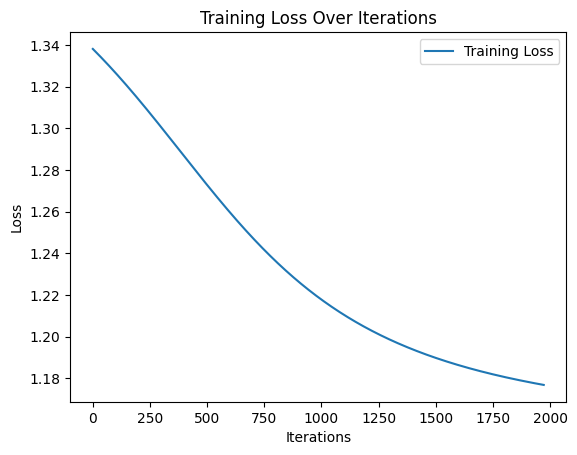

Calibrating to 17 patients
Early stopping after 906 epochs.
Optimized thetas: tensor([0.5180, 0.2520, 0.2300], grad_fn=<DivBackward0>)


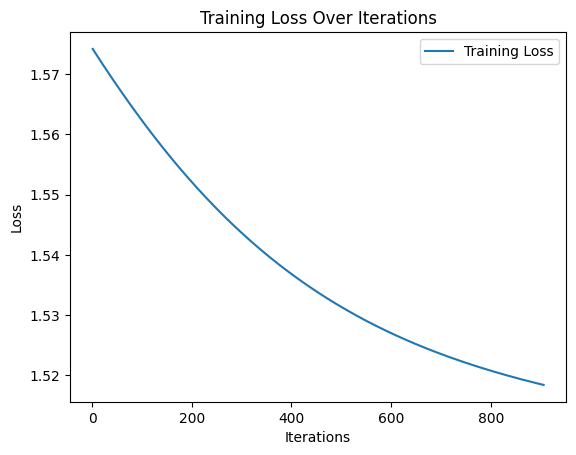

Calibrating to 50 patients
Early stopping after 557 epochs.
Optimized thetas: tensor([0.4821, 0.2482, 0.2697], grad_fn=<DivBackward0>)


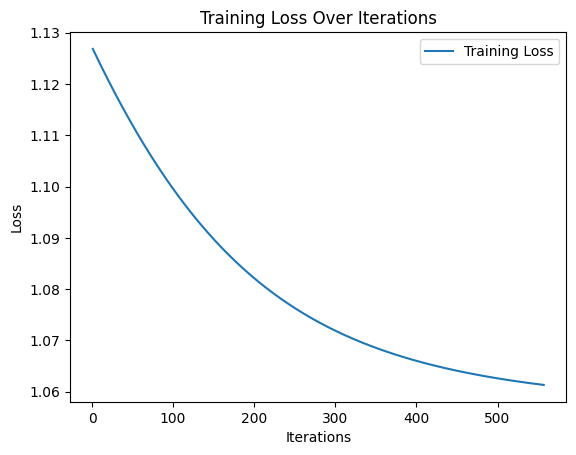


**** RUN 24 ***
Calibrating to 5 patients
Early stopping after 935 epochs.
Optimized thetas: tensor([0.6659, 0.1671, 0.1671], grad_fn=<DivBackward0>)


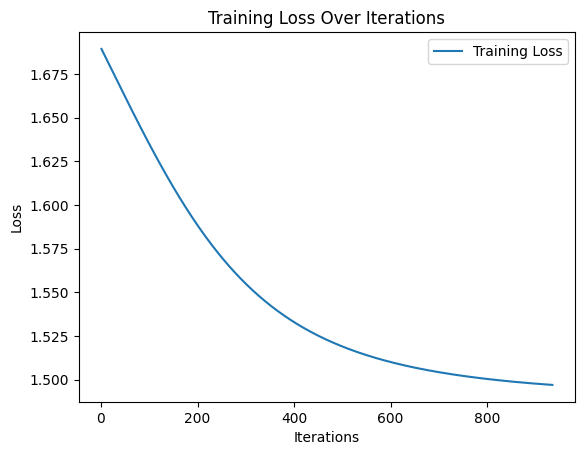

Calibrating to 8 patients
Early stopping after 504 epochs.
Optimized thetas: tensor([0.5664, 0.2000, 0.2336], grad_fn=<DivBackward0>)


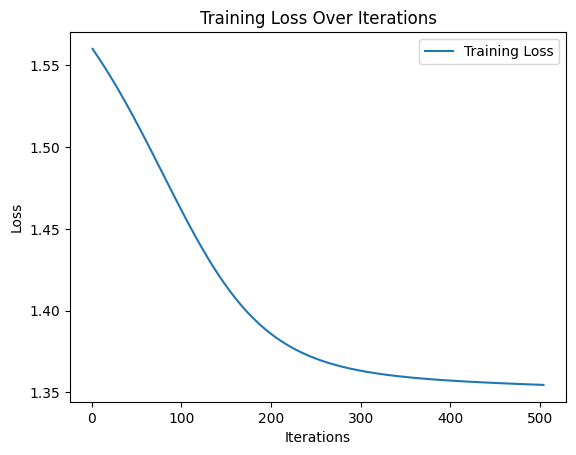

Calibrating to 17 patients
Early stopping after 853 epochs.
Optimized thetas: tensor([0.6174, 0.1883, 0.1942], grad_fn=<DivBackward0>)


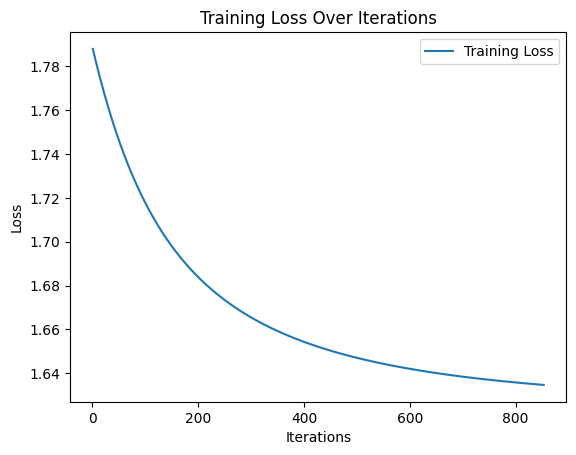

Calibrating to 50 patients
Early stopping after 470 epochs.
Optimized thetas: tensor([0.4262, 0.3000, 0.2738], grad_fn=<DivBackward0>)


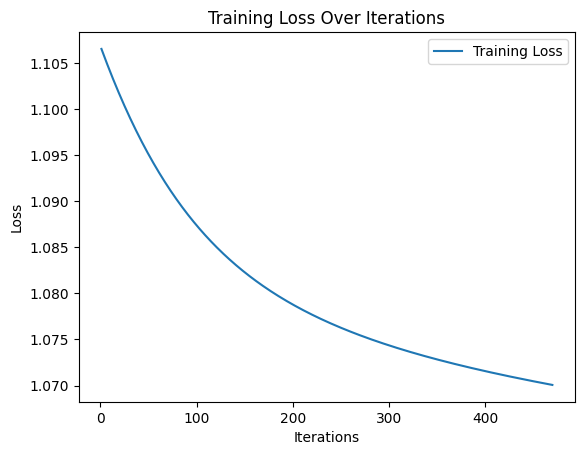


**** RUN 25 ***
Calibrating to 5 patients
Early stopping after 1256 epochs.
Optimized thetas: tensor([0.7064, 0.1468, 0.1468], grad_fn=<DivBackward0>)


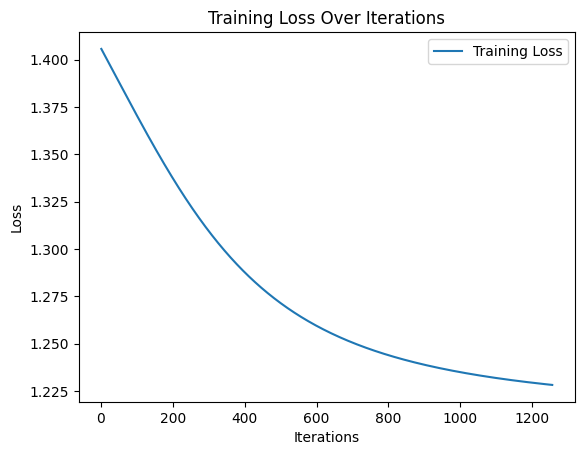

Calibrating to 8 patients
Early stopping after 1816 epochs.
Optimized thetas: tensor([0.8759, 0.0720, 0.0521], grad_fn=<DivBackward0>)


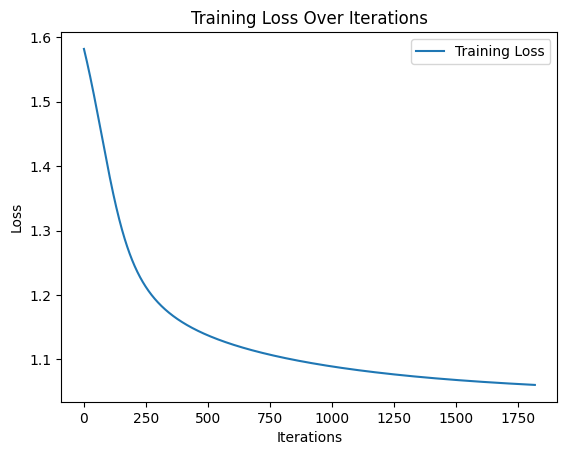

Calibrating to 17 patients
Early stopping after 218 epochs.
Optimized thetas: tensor([0.3797, 0.3060, 0.3143], grad_fn=<DivBackward0>)


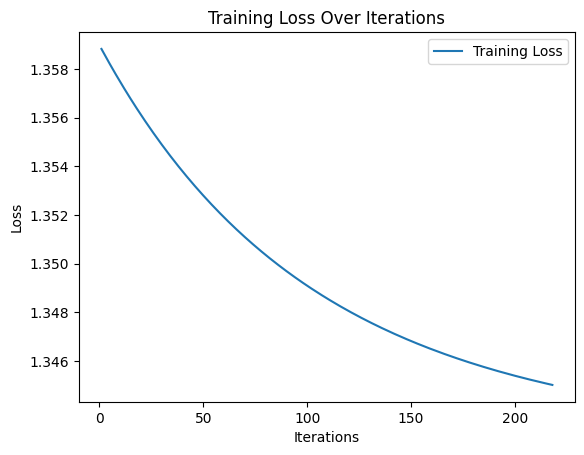

Calibrating to 50 patients
Early stopping after 738 epochs.
Optimized thetas: tensor([0.5153, 0.2564, 0.2283], grad_fn=<DivBackward0>)


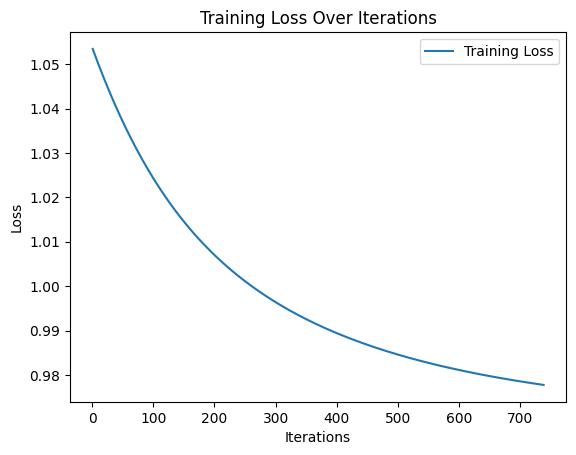


**** RUN 26 ***
Calibrating to 5 patients
Early stopping after 1370 epochs.
Optimized thetas: tensor([0.6138, 0.1931, 0.1931], grad_fn=<DivBackward0>)


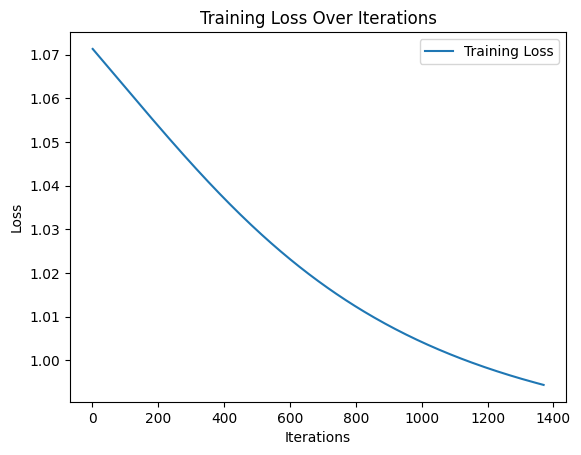

Calibrating to 8 patients
Early stopping after 773 epochs.
Optimized thetas: tensor([0.6026, 0.1921, 0.2053], grad_fn=<DivBackward0>)


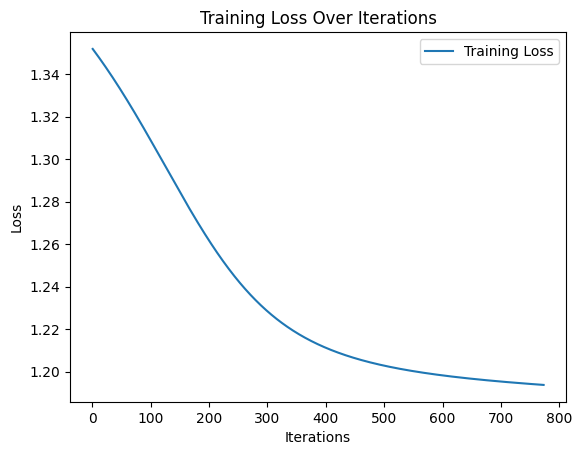

Calibrating to 17 patients
Early stopping after 803 epochs.
Optimized thetas: tensor([0.4295, 0.3280, 0.2425], grad_fn=<DivBackward0>)


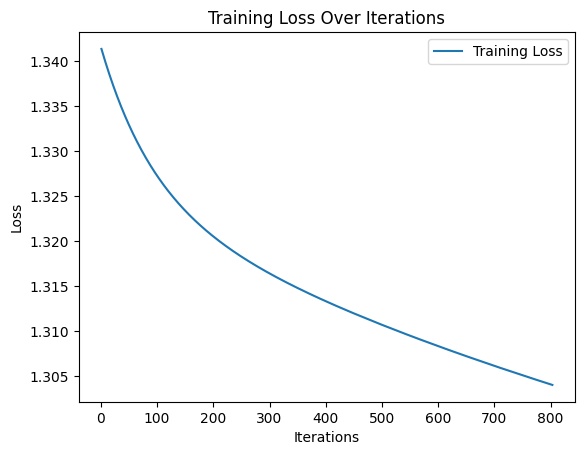

Calibrating to 50 patients
Early stopping after 523 epochs.
Optimized thetas: tensor([0.4741, 0.2595, 0.2664], grad_fn=<DivBackward0>)


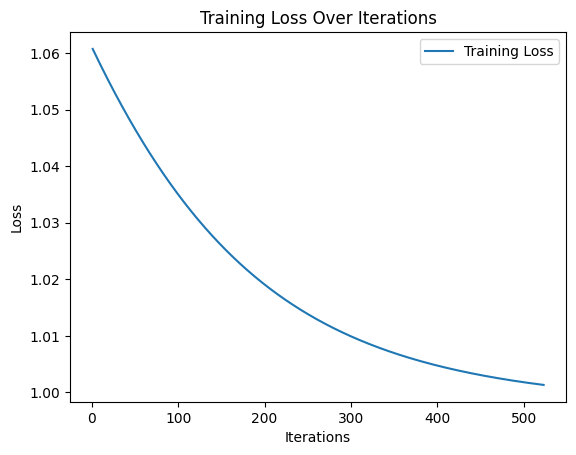


**** RUN 27 ***
Calibrating to 5 patients
Early stopping after 411 epochs.
Optimized thetas: tensor([0.3846, 0.3077, 0.3077], grad_fn=<DivBackward0>)


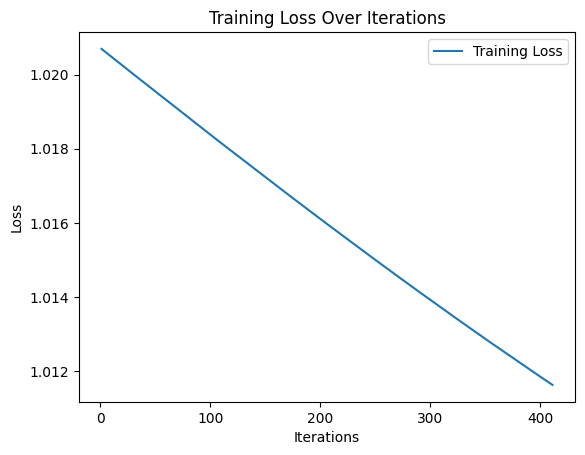

Calibrating to 8 patients
Early stopping after 772 epochs.
Optimized thetas: tensor([0.6025, 0.1921, 0.2054], grad_fn=<DivBackward0>)


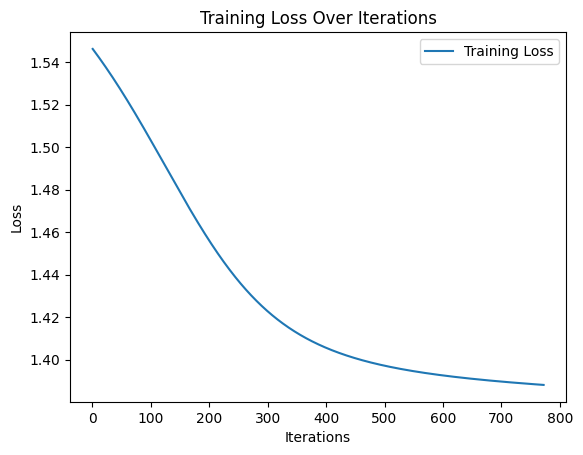

Calibrating to 17 patients
Early stopping after 692 epochs.
Optimized thetas: tensor([0.4781, 0.2914, 0.2306], grad_fn=<DivBackward0>)


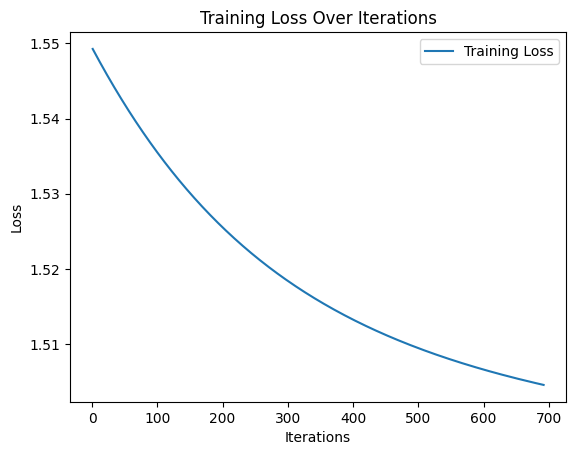

Calibrating to 50 patients
Early stopping after 751 epochs.
Optimized thetas: tensor([0.5077, 0.2508, 0.2415], grad_fn=<DivBackward0>)


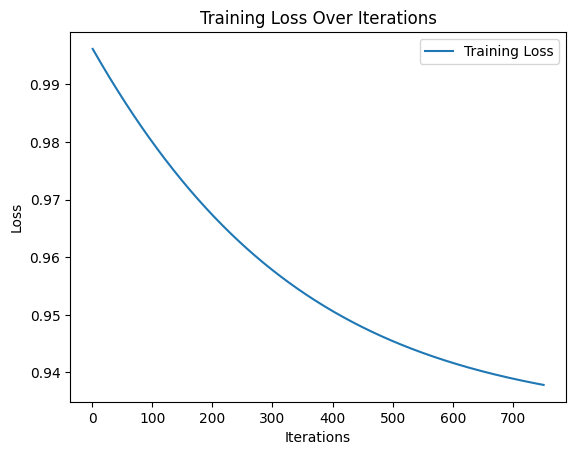


**** RUN 28 ***
Calibrating to 5 patients
Early stopping after 694 epochs.
Optimized thetas: tensor([0.5937, 0.2032, 0.2032], grad_fn=<DivBackward0>)


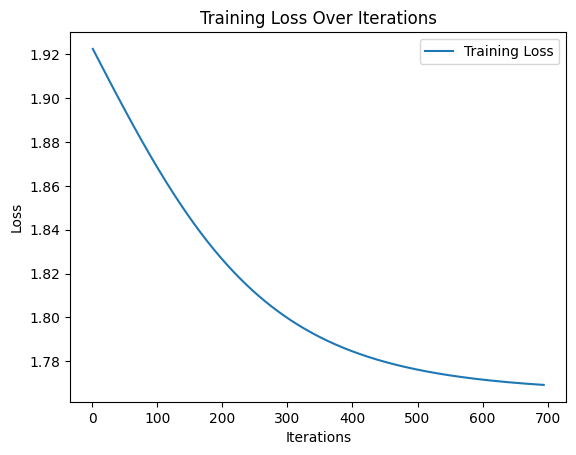

Calibrating to 8 patients
Early stopping after 426 epochs.
Optimized thetas: tensor([0.4960, 0.2089, 0.2952], grad_fn=<DivBackward0>)


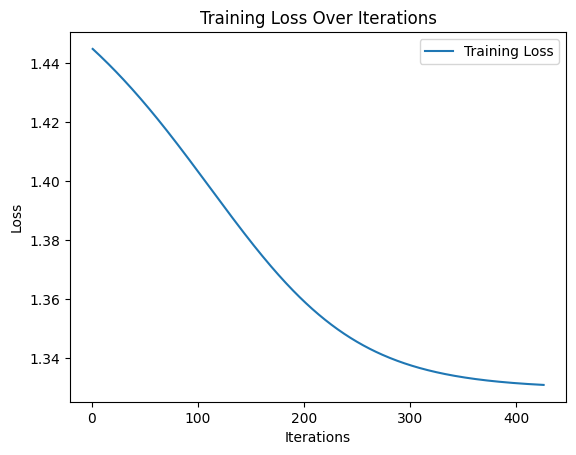

Calibrating to 17 patients
Early stopping after 319 epochs.
Optimized thetas: tensor([0.4203, 0.2909, 0.2889], grad_fn=<DivBackward0>)


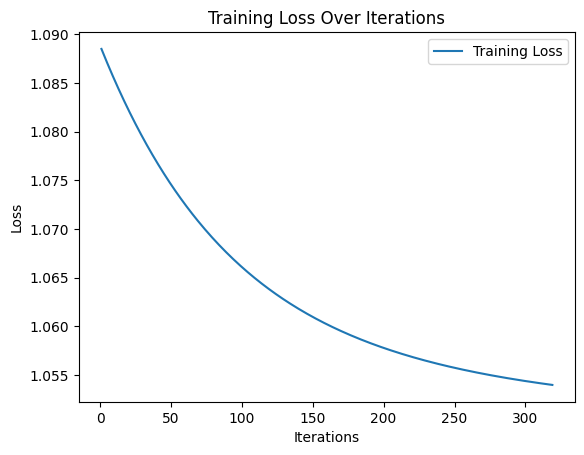

Calibrating to 50 patients
Early stopping after 655 epochs.
Optimized thetas: tensor([0.4526, 0.2709, 0.2765], grad_fn=<DivBackward0>)


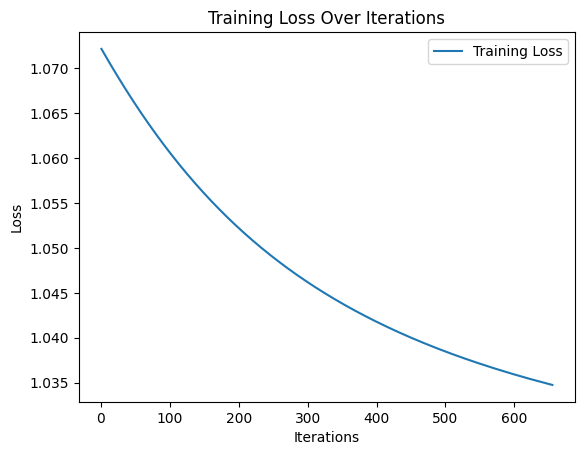


**** RUN 29 ***
Calibrating to 5 patients
Early stopping after 1256 epochs.
Optimized thetas: tensor([0.7064, 0.1468, 0.1468], grad_fn=<DivBackward0>)


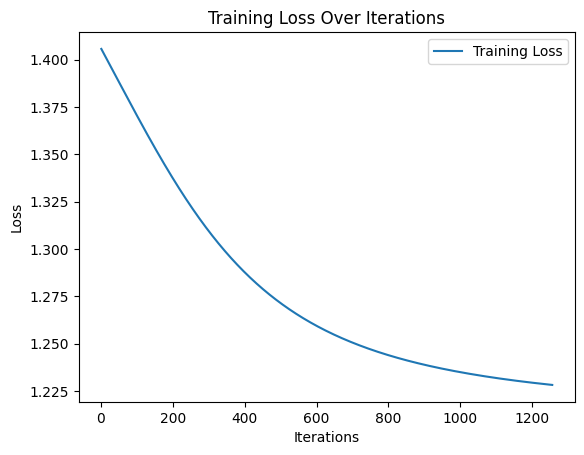

Calibrating to 8 patients
Early stopping after 772 epochs.
Optimized thetas: tensor([0.6025, 0.1921, 0.2054], grad_fn=<DivBackward0>)


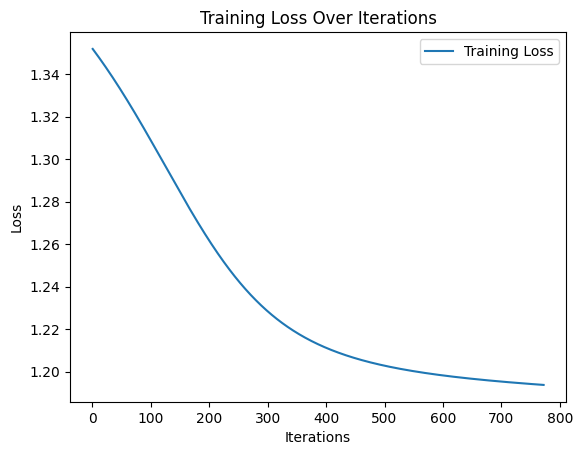

Calibrating to 17 patients
Early stopping after 379 epochs.
Optimized thetas: tensor([0.4418, 0.2744, 0.2838], grad_fn=<DivBackward0>)


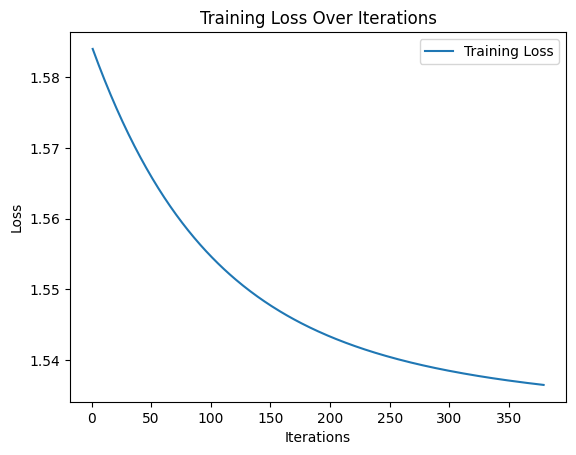

Calibrating to 50 patients
Early stopping after 413 epochs.
Optimized thetas: tensor([0.4284, 0.2855, 0.2860], grad_fn=<DivBackward0>)


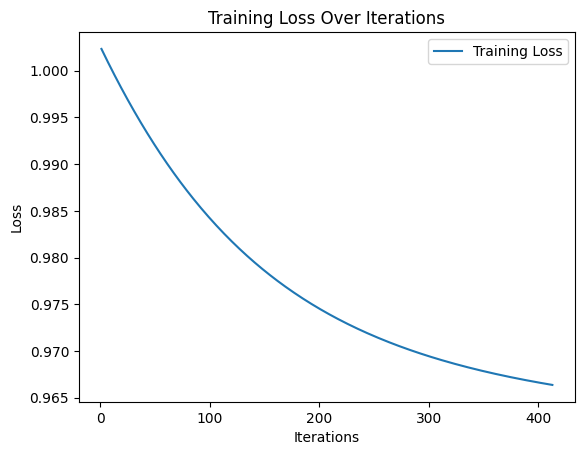


**** RUN 30 ***
Calibrating to 5 patients
Early stopping after 6 epochs.
Optimized thetas: tensor([0.3333, 0.3333, 0.3333], grad_fn=<DivBackward0>)


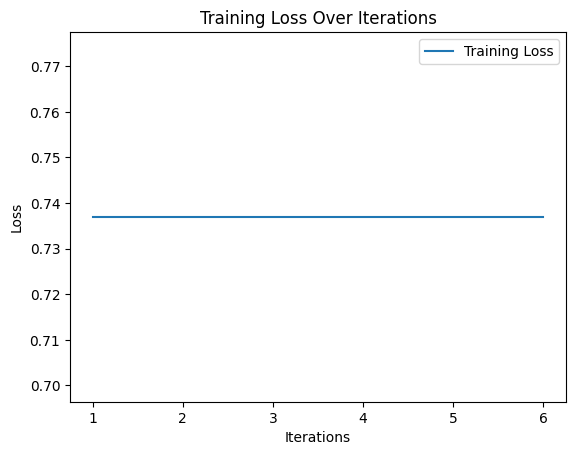

Calibrating to 8 patients
Early stopping after 772 epochs.
Optimized thetas: tensor([0.6025, 0.1921, 0.2054], grad_fn=<DivBackward0>)


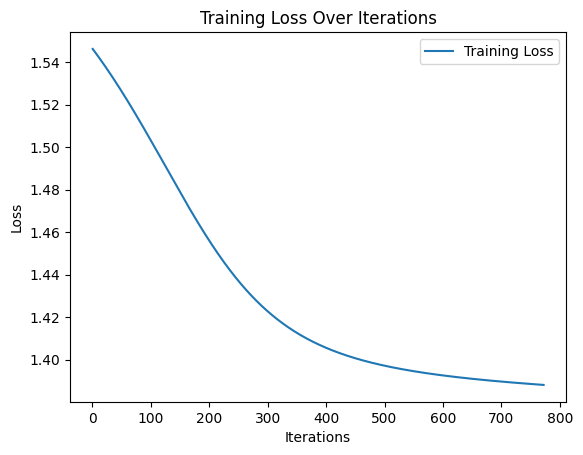

Calibrating to 17 patients
Early stopping after 722 epochs.
Optimized thetas: tensor([0.4961, 0.2453, 0.2586], grad_fn=<DivBackward0>)


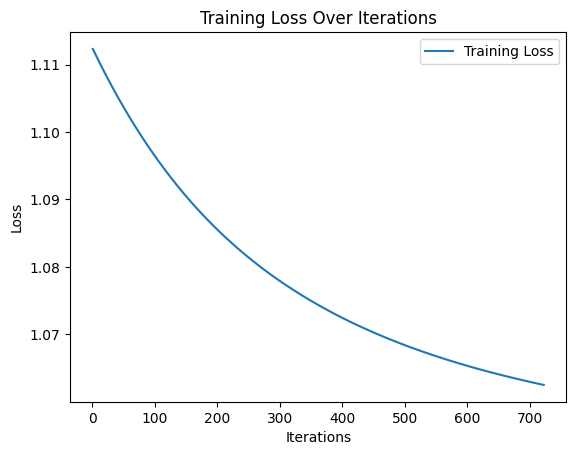

Calibrating to 50 patients
Early stopping after 512 epochs.
Optimized thetas: tensor([0.4361, 0.3058, 0.2581], grad_fn=<DivBackward0>)


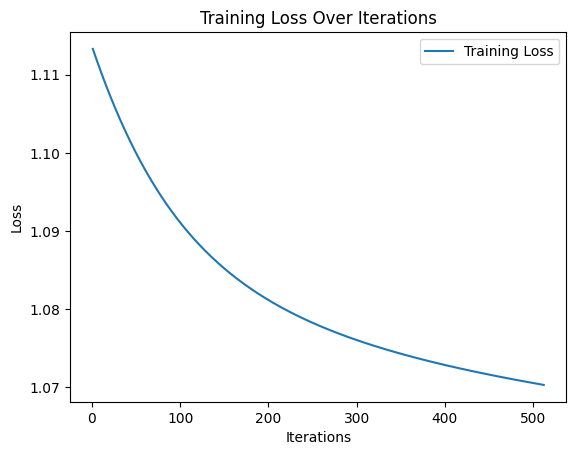


**** RUN 31 ***
Calibrating to 5 patients
Early stopping after 1000 epochs.
Optimized thetas: tensor([0.6002, 0.1999, 0.1999], grad_fn=<DivBackward0>)


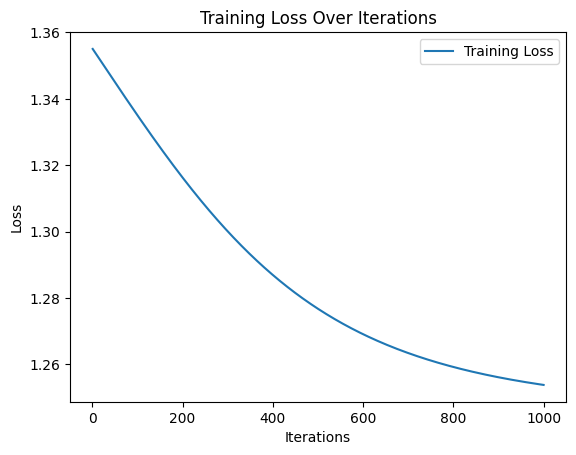

Calibrating to 8 patients
Early stopping after 1968 epochs.
Optimized thetas: tensor([0.7827, 0.1087, 0.1087], grad_fn=<DivBackward0>)


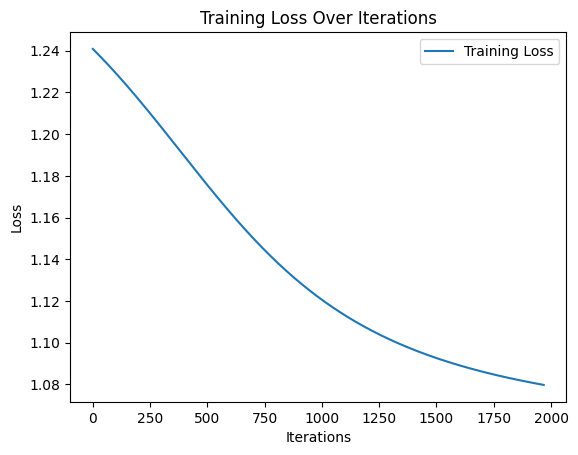

Calibrating to 17 patients
Early stopping after 774 epochs.
Optimized thetas: tensor([0.5291, 0.2650, 0.2059], grad_fn=<DivBackward0>)


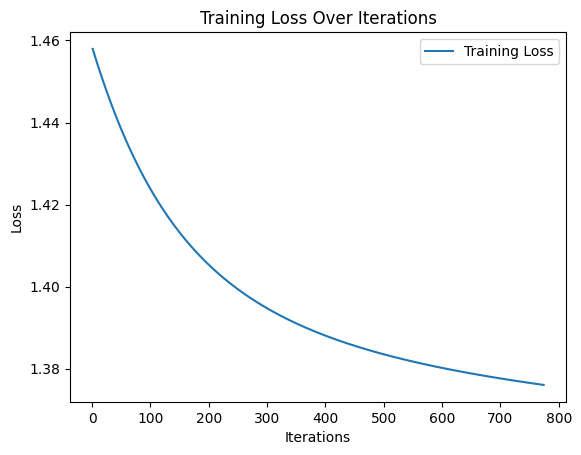

Calibrating to 50 patients
Early stopping after 492 epochs.
Optimized thetas: tensor([0.4774, 0.2601, 0.2625], grad_fn=<DivBackward0>)


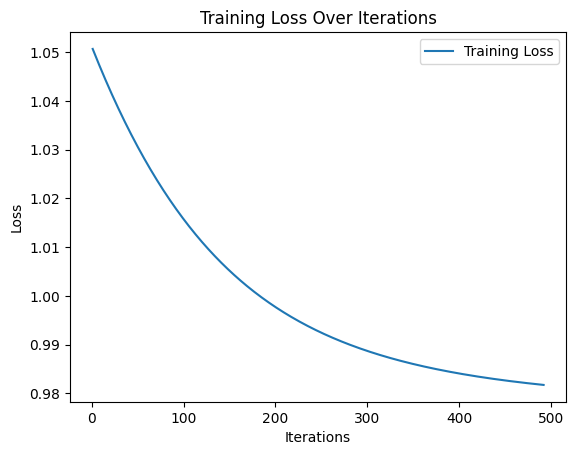


**** RUN 32 ***
Calibrating to 5 patients
Early stopping after 6 epochs.
Optimized thetas: tensor([0.3333, 0.3333, 0.3333], grad_fn=<DivBackward0>)


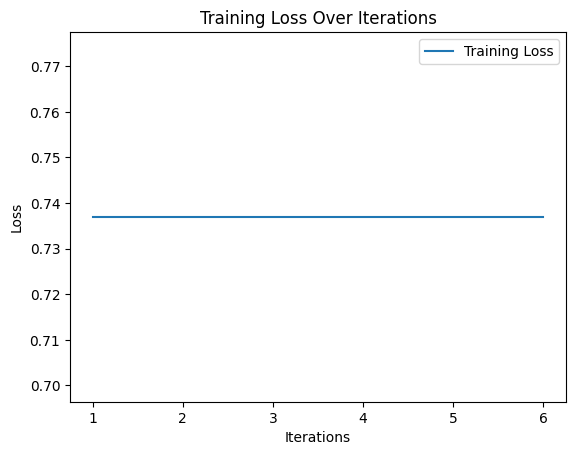

Calibrating to 8 patients
Early stopping after 658 epochs.
Optimized thetas: tensor([0.4804, 0.2194, 0.3002], grad_fn=<DivBackward0>)


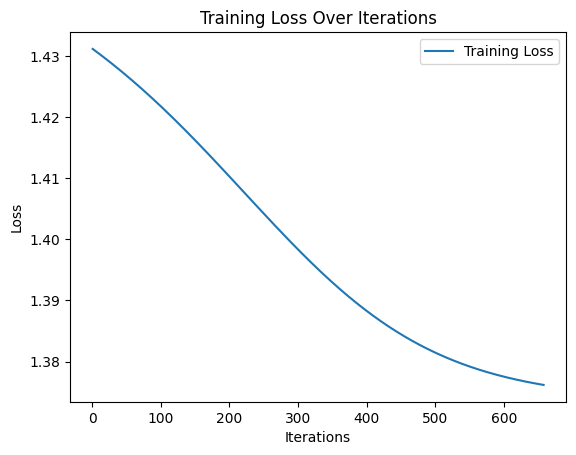

Calibrating to 17 patients
Early stopping after 988 epochs.
Optimized thetas: tensor([0.6380, 0.1839, 0.1781], grad_fn=<DivBackward0>)


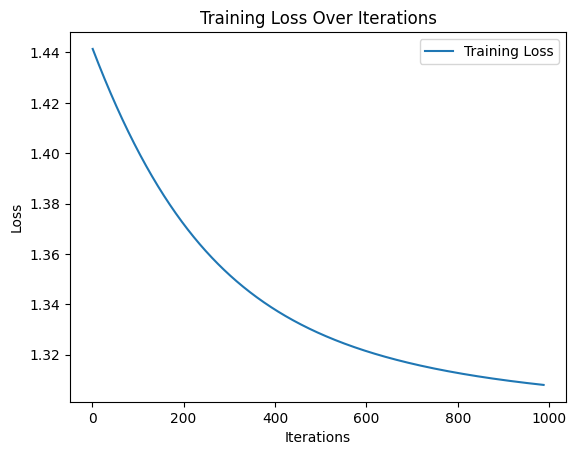

Calibrating to 50 patients
Early stopping after 428 epochs.
Optimized thetas: tensor([0.4464, 0.2721, 0.2815], grad_fn=<DivBackward0>)


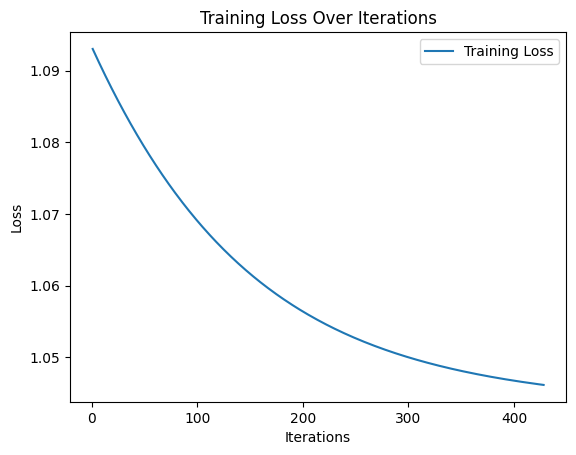


**** RUN 33 ***
Calibrating to 5 patients
Early stopping after 411 epochs.
Optimized thetas: tensor([0.3846, 0.3077, 0.3077], grad_fn=<DivBackward0>)


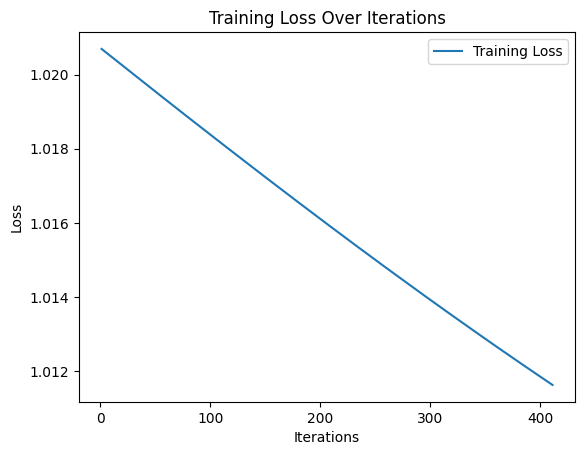

Calibrating to 8 patients
Early stopping after 1967 epochs.
Optimized thetas: tensor([0.7826, 0.1087, 0.1087], grad_fn=<DivBackward0>)


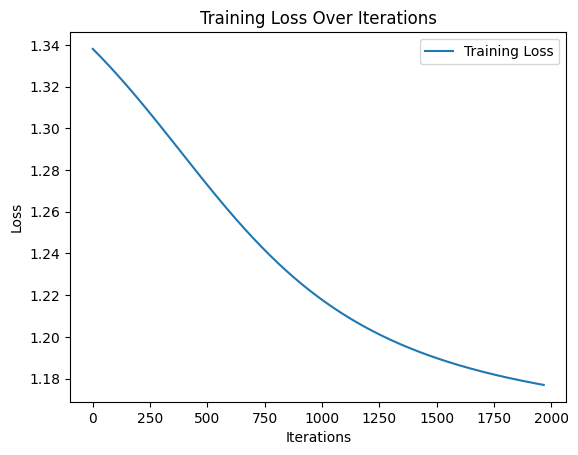

Calibrating to 17 patients
Early stopping after 949 epochs.
Optimized thetas: tensor([0.5456, 0.2572, 0.1972], grad_fn=<DivBackward0>)


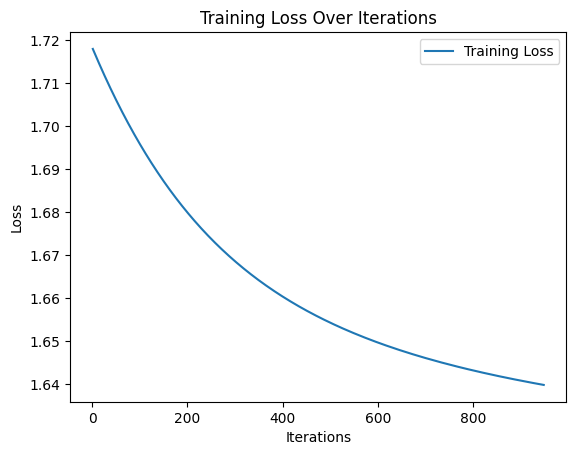

Calibrating to 50 patients
Early stopping after 754 epochs.
Optimized thetas: tensor([0.5401, 0.2392, 0.2207], grad_fn=<DivBackward0>)


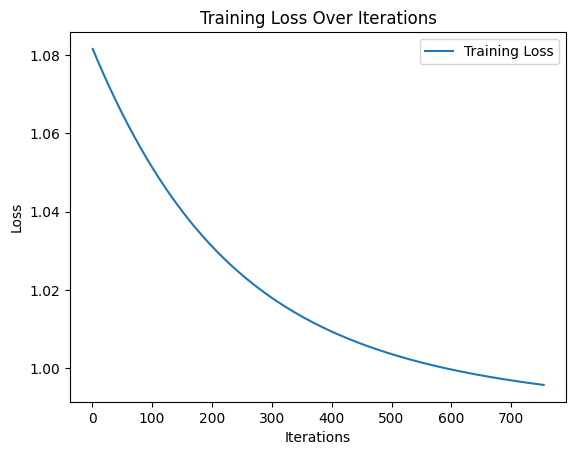


**** RUN 34 ***
Calibrating to 5 patients
Early stopping after 416 epochs.
Optimized thetas: tensor([0.3852, 0.3074, 0.3074], grad_fn=<DivBackward0>)


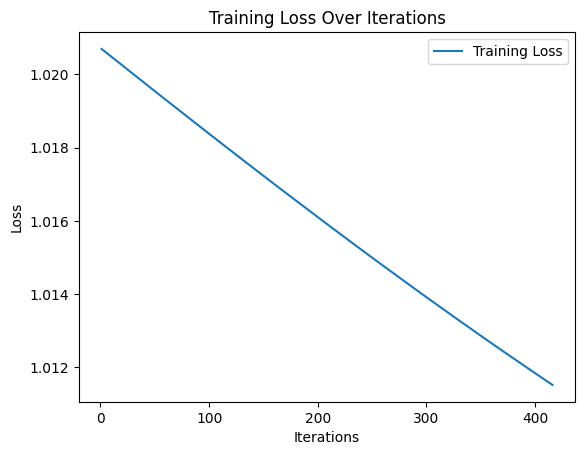

Calibrating to 8 patients
Early stopping after 509 epochs.
Optimized thetas: tensor([0.5669, 0.2000, 0.2331], grad_fn=<DivBackward0>)


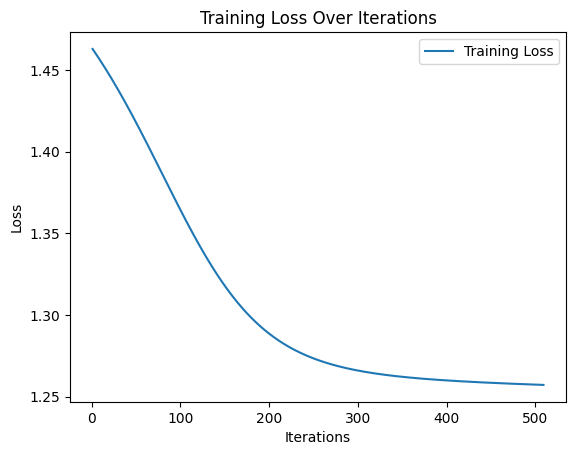

Calibrating to 17 patients
Early stopping after 810 epochs.
Optimized thetas: tensor([0.5660, 0.2245, 0.2096], grad_fn=<DivBackward0>)


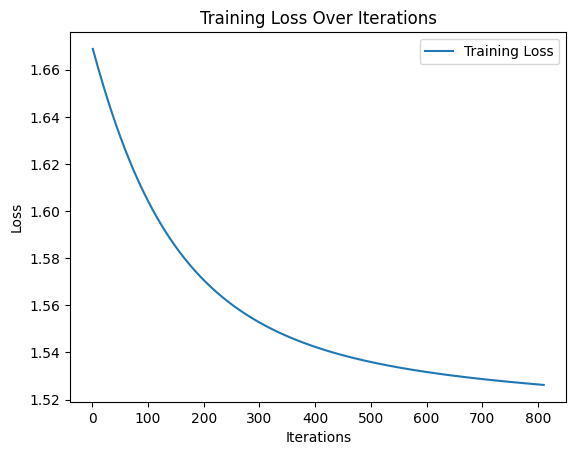

Calibrating to 50 patients
Early stopping after 522 epochs.
Optimized thetas: tensor([0.4280, 0.3000, 0.2720], grad_fn=<DivBackward0>)


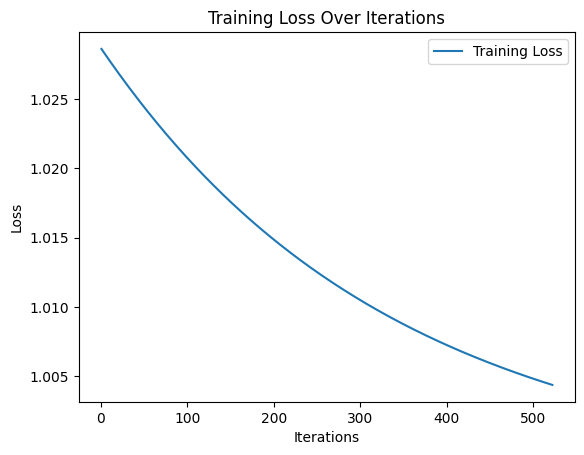


**** RUN 35 ***
Calibrating to 5 patients
Early stopping after 882 epochs.
Optimized thetas: tensor([0.7035, 0.1482, 0.1482], grad_fn=<DivBackward0>)


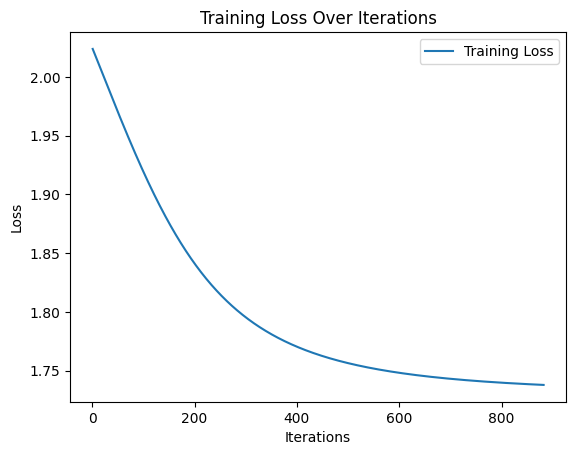

Calibrating to 8 patients
Early stopping after 772 epochs.
Optimized thetas: tensor([0.6025, 0.1921, 0.2054], grad_fn=<DivBackward0>)


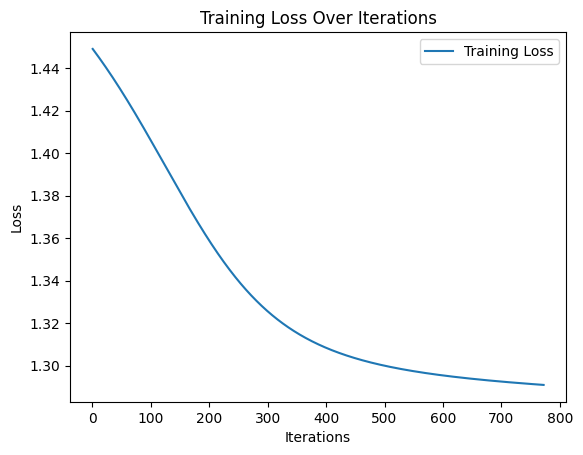

Calibrating to 17 patients
Early stopping after 864 epochs.
Optimized thetas: tensor([0.4817, 0.3029, 0.2154], grad_fn=<DivBackward0>)


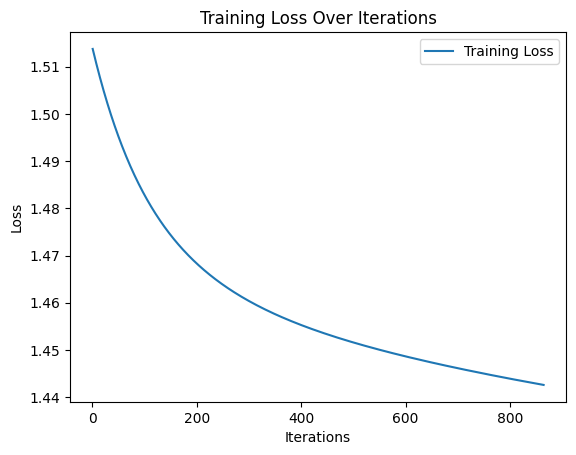

Calibrating to 50 patients
Early stopping after 407 epochs.
Optimized thetas: tensor([0.4262, 0.2860, 0.2878], grad_fn=<DivBackward0>)


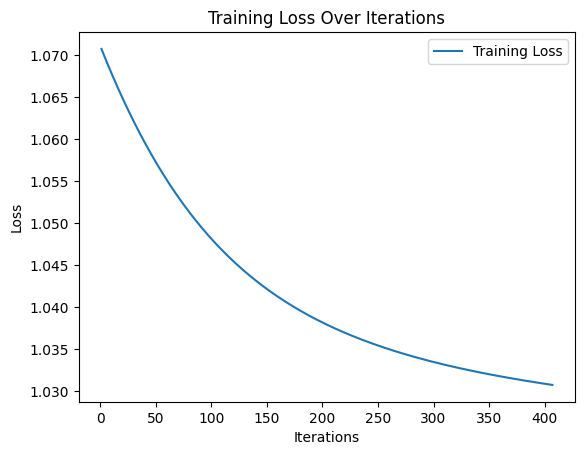


**** RUN 36 ***
Calibrating to 5 patients
Early stopping after 411 epochs.
Optimized thetas: tensor([0.3846, 0.3077, 0.3077], grad_fn=<DivBackward0>)


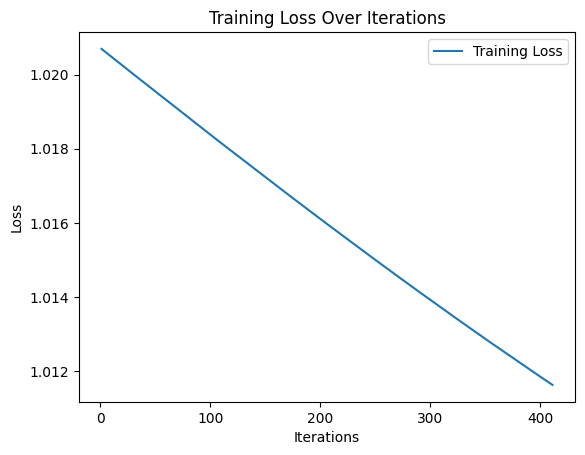

Calibrating to 8 patients
Early stopping after 772 epochs.
Optimized thetas: tensor([0.6025, 0.1921, 0.2054], grad_fn=<DivBackward0>)


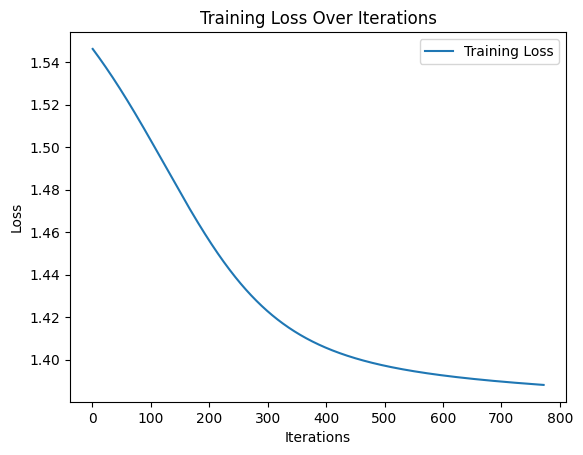

Calibrating to 17 patients
Early stopping after 1320 epochs.
Optimized thetas: tensor([0.5179, 0.3313, 0.1508], grad_fn=<DivBackward0>)


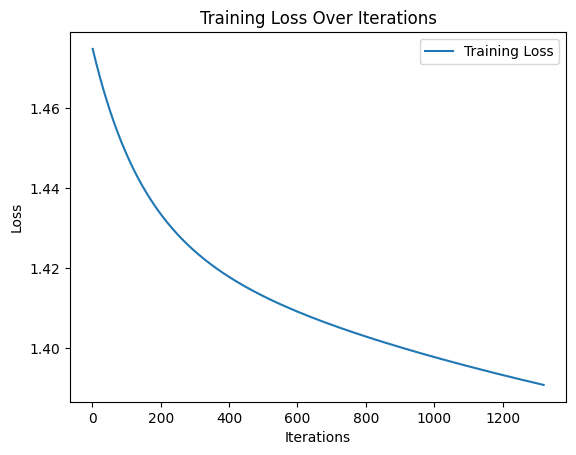

Calibrating to 50 patients
Early stopping after 635 epochs.
Optimized thetas: tensor([0.5322, 0.2395, 0.2283], grad_fn=<DivBackward0>)


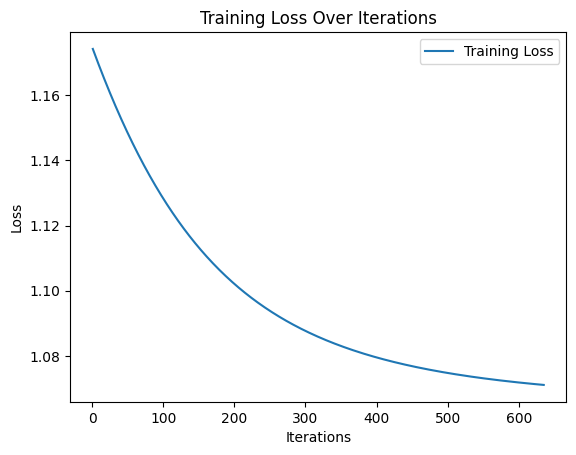


**** RUN 37 ***
Calibrating to 5 patients
Early stopping after 1256 epochs.
Optimized thetas: tensor([0.7064, 0.1468, 0.1468], grad_fn=<DivBackward0>)


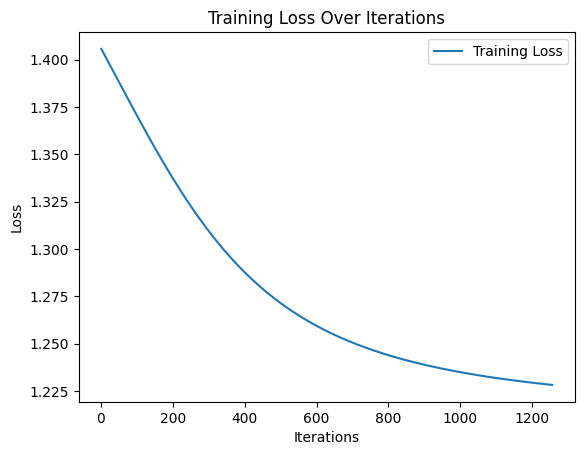

Calibrating to 8 patients
Early stopping after 772 epochs.
Optimized thetas: tensor([0.6025, 0.1921, 0.2054], grad_fn=<DivBackward0>)


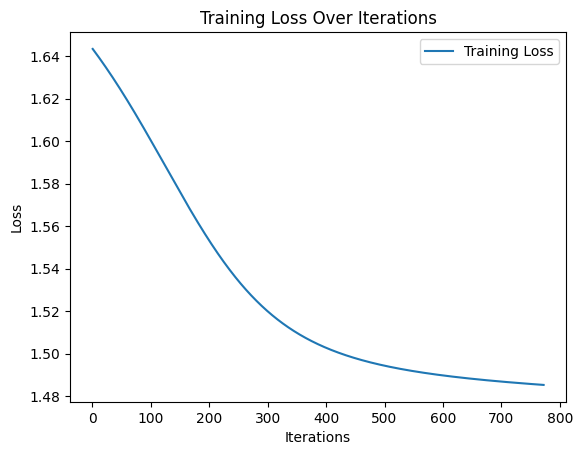

Calibrating to 17 patients
Early stopping after 504 epochs.
Optimized thetas: tensor([0.4953, 0.2486, 0.2561], grad_fn=<DivBackward0>)


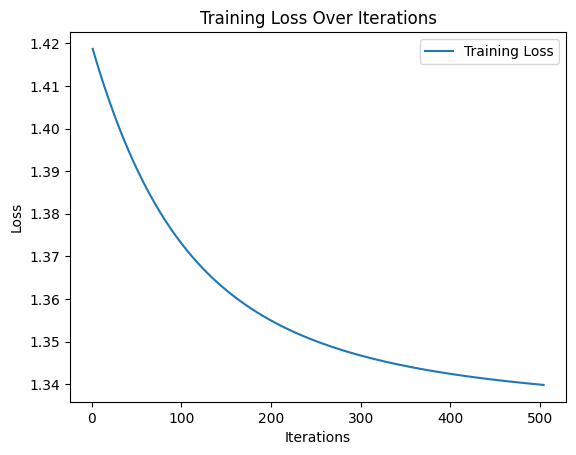

Calibrating to 50 patients
Early stopping after 419 epochs.
Optimized thetas: tensor([0.3922, 0.2959, 0.3118], grad_fn=<DivBackward0>)


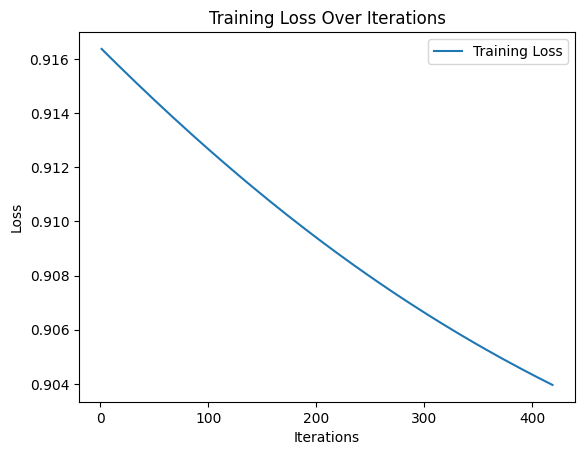


**** RUN 38 ***
Calibrating to 5 patients
Early stopping after 694 epochs.
Optimized thetas: tensor([0.5937, 0.2032, 0.2032], grad_fn=<DivBackward0>)


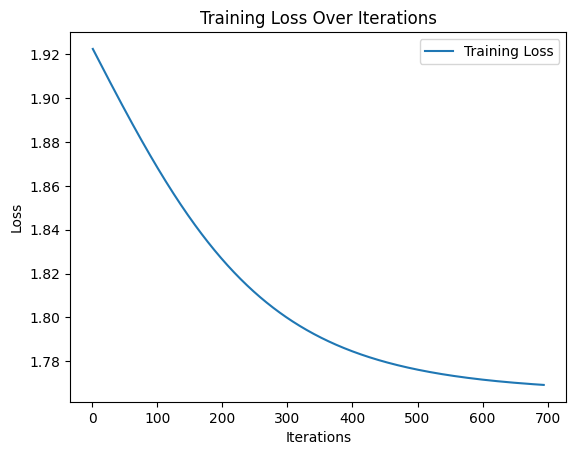

Calibrating to 8 patients
Early stopping after 653 epochs.
Optimized thetas: tensor([0.4798, 0.2198, 0.3004], grad_fn=<DivBackward0>)


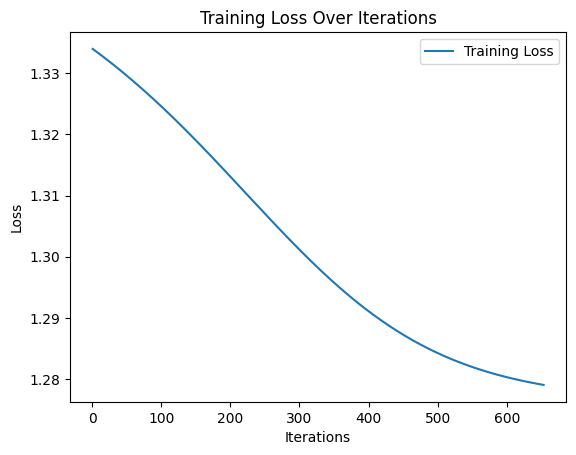

Calibrating to 17 patients
Early stopping after 933 epochs.
Optimized thetas: tensor([0.5708, 0.2072, 0.2220], grad_fn=<DivBackward0>)


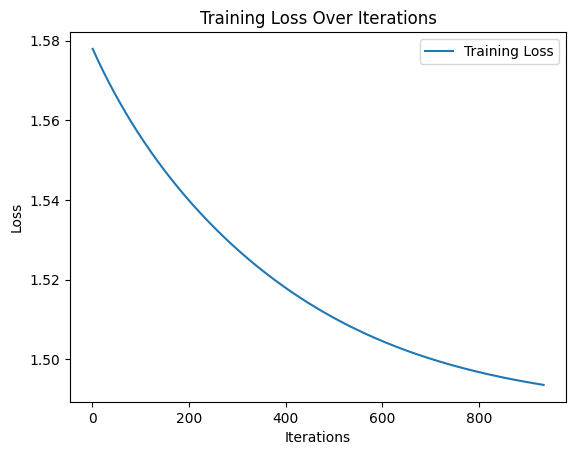

Calibrating to 50 patients
Early stopping after 517 epochs.
Optimized thetas: tensor([0.4603, 0.2897, 0.2500], grad_fn=<DivBackward0>)


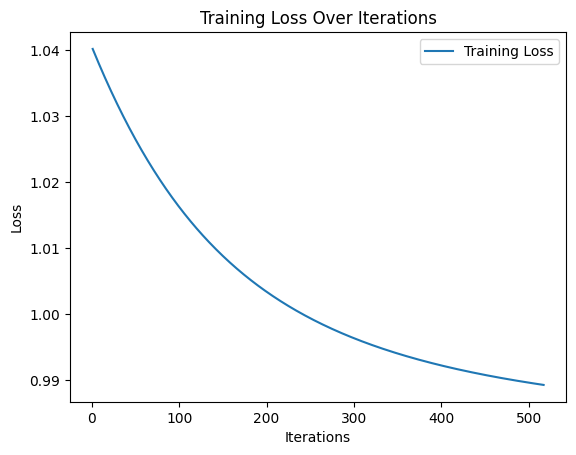


**** RUN 39 ***
Calibrating to 5 patients
Early stopping after 1000 epochs.
Optimized thetas: tensor([0.6002, 0.1999, 0.1999], grad_fn=<DivBackward0>)


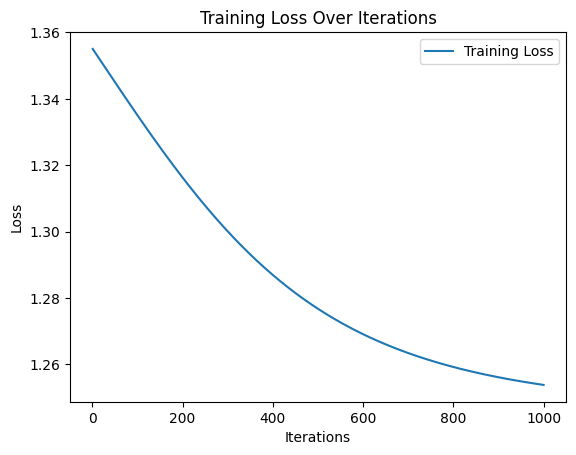

Calibrating to 8 patients
Early stopping after 653 epochs.
Optimized thetas: tensor([0.4798, 0.2198, 0.3004], grad_fn=<DivBackward0>)


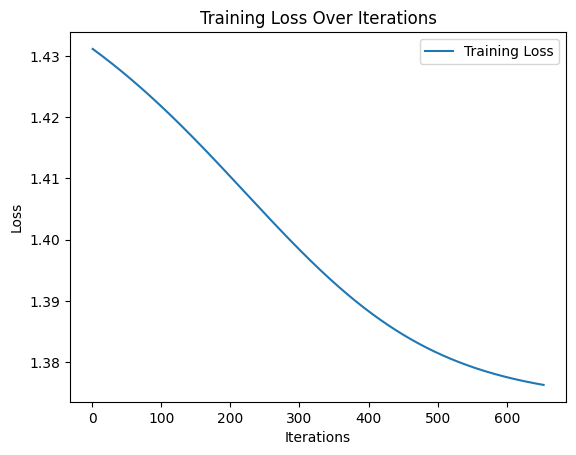

Calibrating to 17 patients
Early stopping after 909 epochs.
Optimized thetas: tensor([0.6062, 0.2195, 0.1743], grad_fn=<DivBackward0>)


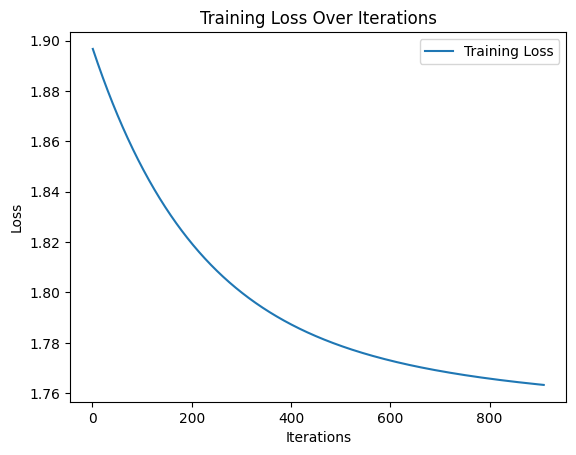

Calibrating to 50 patients
Early stopping after 626 epochs.
Optimized thetas: tensor([0.4818, 0.2549, 0.2633], grad_fn=<DivBackward0>)


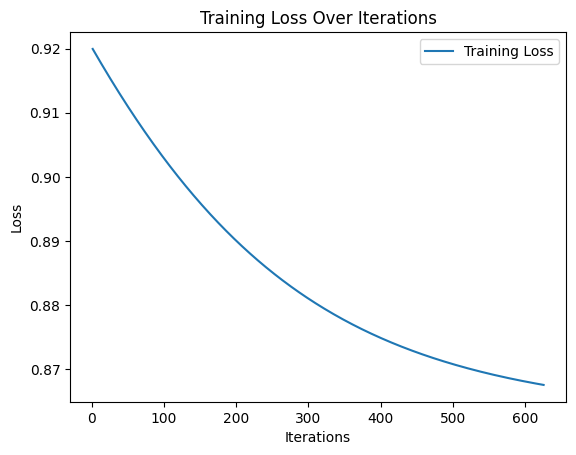


**** RUN 40 ***
Calibrating to 5 patients
Early stopping after 411 epochs.
Optimized thetas: tensor([0.3846, 0.3077, 0.3077], grad_fn=<DivBackward0>)


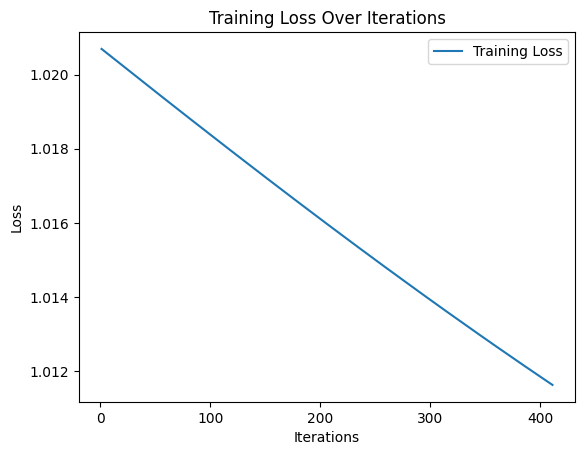

Calibrating to 8 patients
Early stopping after 426 epochs.
Optimized thetas: tensor([0.4960, 0.2089, 0.2952], grad_fn=<DivBackward0>)


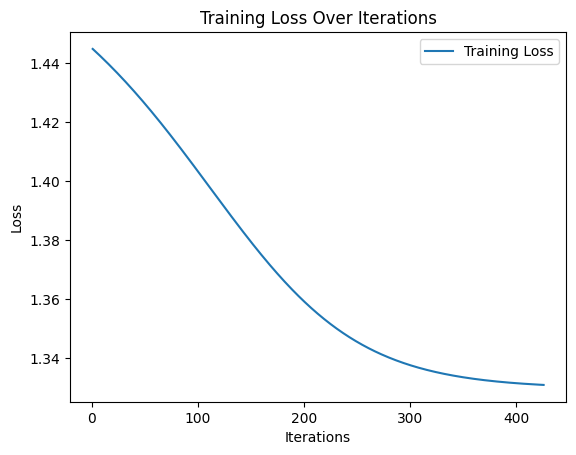

Calibrating to 17 patients
Early stopping after 725 epochs.
Optimized thetas: tensor([0.5298, 0.2151, 0.2551], grad_fn=<DivBackward0>)


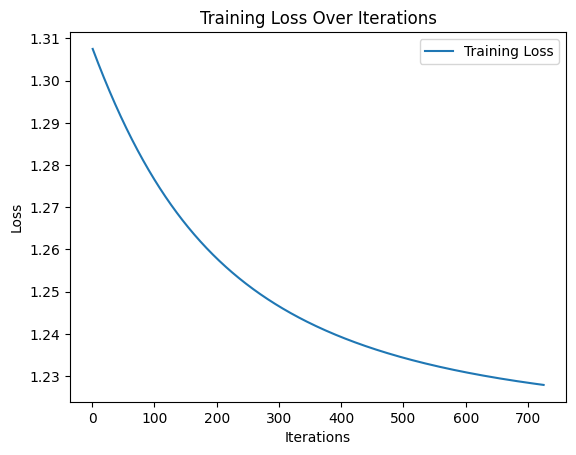

Calibrating to 50 patients
Early stopping after 910 epochs.
Optimized thetas: tensor([0.4526, 0.3390, 0.2084], grad_fn=<DivBackward0>)


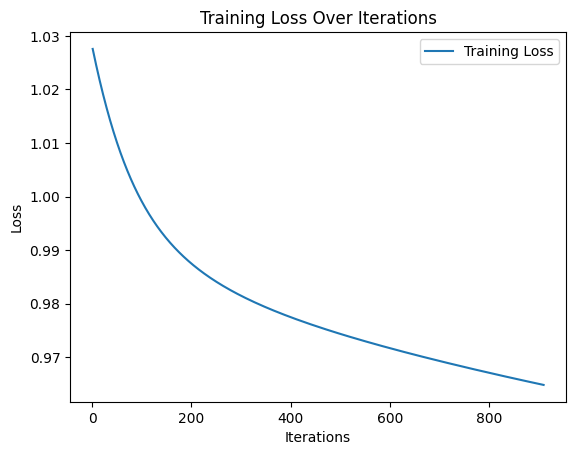


**** RUN 41 ***
Calibrating to 5 patients
Early stopping after 1370 epochs.
Optimized thetas: tensor([0.6138, 0.1931, 0.1931], grad_fn=<DivBackward0>)


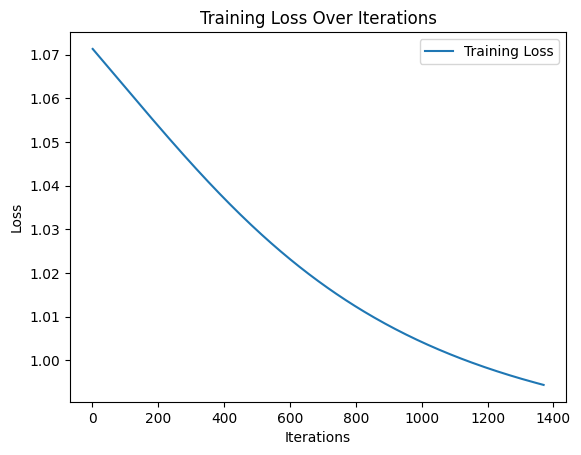

Calibrating to 8 patients
Early stopping after 658 epochs.
Optimized thetas: tensor([0.4804, 0.2194, 0.3002], grad_fn=<DivBackward0>)


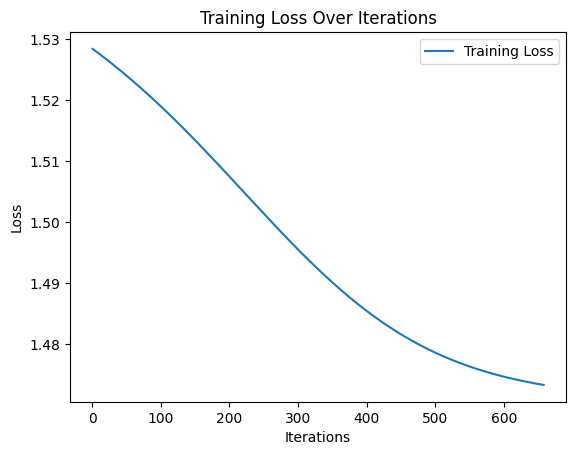

Calibrating to 17 patients
Early stopping after 623 epochs.
Optimized thetas: tensor([0.4522, 0.2597, 0.2881], grad_fn=<DivBackward0>)


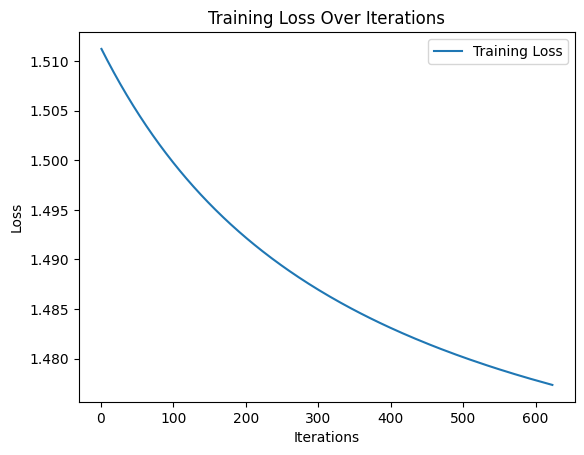

Calibrating to 50 patients
Early stopping after 300 epochs.
Optimized thetas: tensor([0.3903, 0.3113, 0.2984], grad_fn=<DivBackward0>)


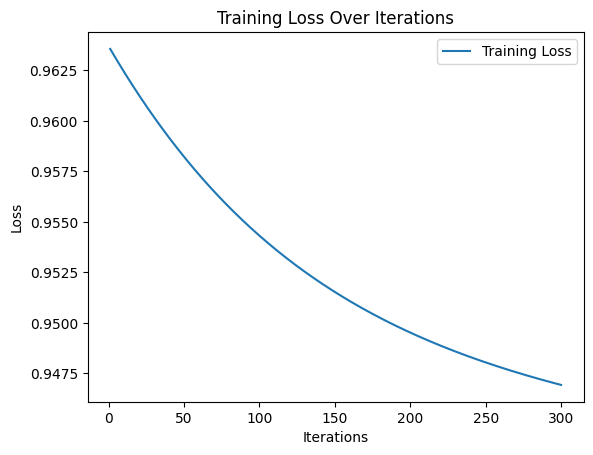


**** RUN 42 ***
Calibrating to 5 patients
Early stopping after 1370 epochs.
Optimized thetas: tensor([0.6138, 0.1931, 0.1931], grad_fn=<DivBackward0>)


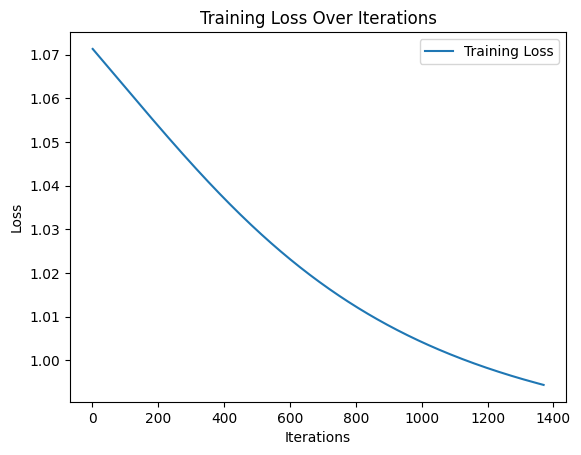

Calibrating to 8 patients
Early stopping after 772 epochs.
Optimized thetas: tensor([0.6025, 0.1921, 0.2054], grad_fn=<DivBackward0>)


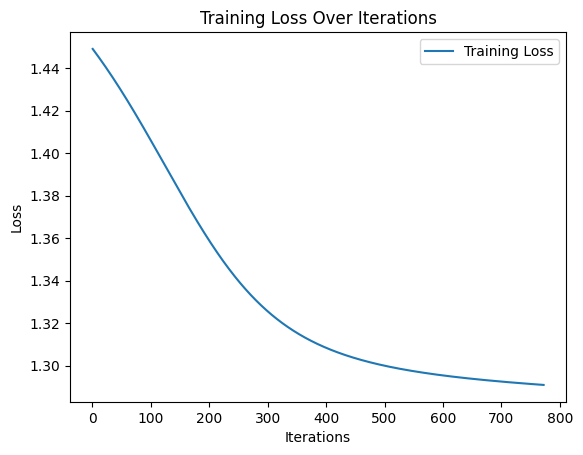

Calibrating to 17 patients
Early stopping after 1013 epochs.
Optimized thetas: tensor([0.5266, 0.2399, 0.2335], grad_fn=<DivBackward0>)


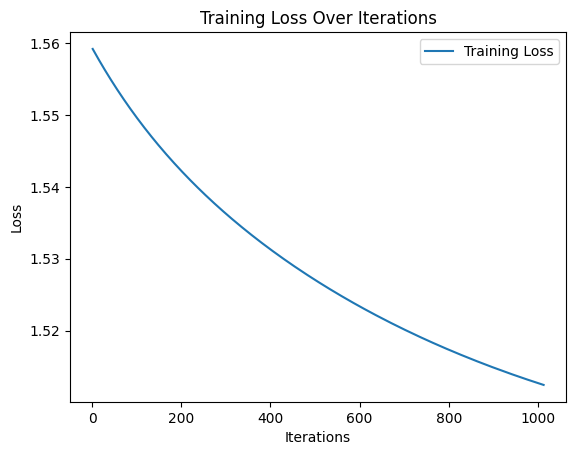

Calibrating to 50 patients
Early stopping after 364 epochs.
Optimized thetas: tensor([0.4171, 0.2855, 0.2974], grad_fn=<DivBackward0>)


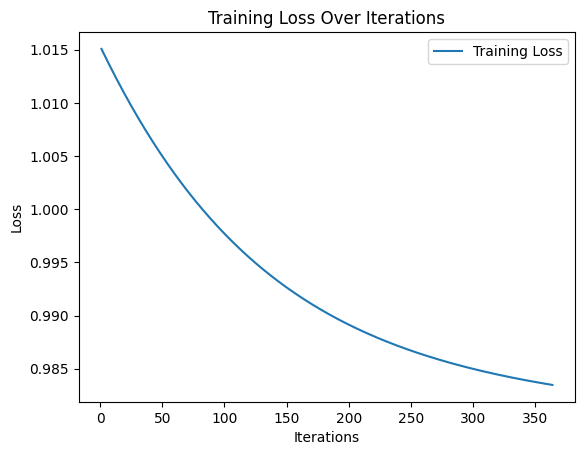


**** RUN 43 ***
Calibrating to 5 patients
Early stopping after 1370 epochs.
Optimized thetas: tensor([0.6138, 0.1931, 0.1931], grad_fn=<DivBackward0>)


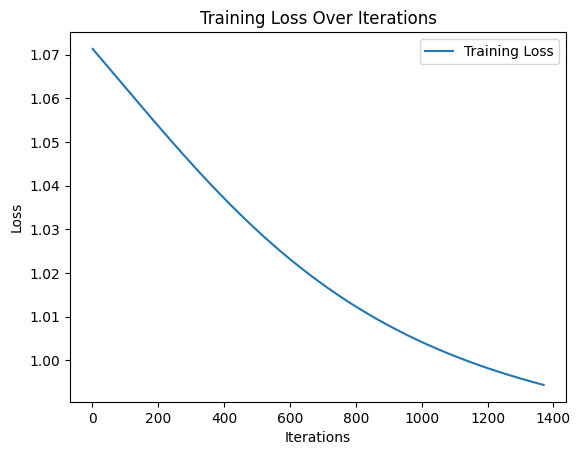

Calibrating to 8 patients
Early stopping after 1968 epochs.
Optimized thetas: tensor([0.7827, 0.1087, 0.1087], grad_fn=<DivBackward0>)


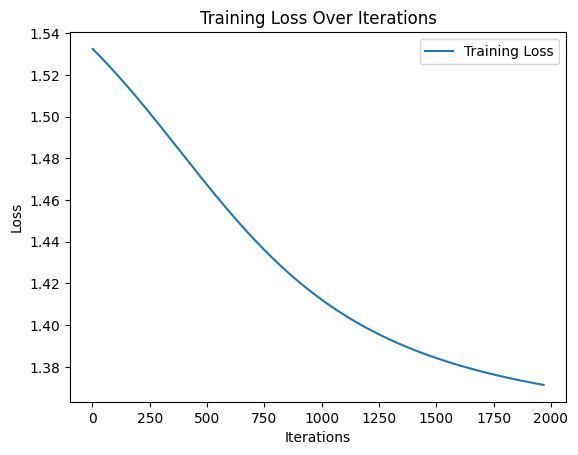

Calibrating to 17 patients
Early stopping after 383 epochs.
Optimized thetas: tensor([0.4239, 0.2967, 0.2794], grad_fn=<DivBackward0>)


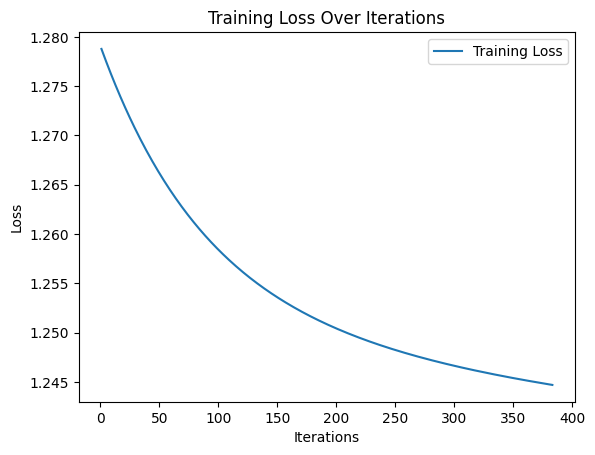

Calibrating to 50 patients
Early stopping after 293 epochs.
Optimized thetas: tensor([0.3957, 0.3024, 0.3019], grad_fn=<DivBackward0>)


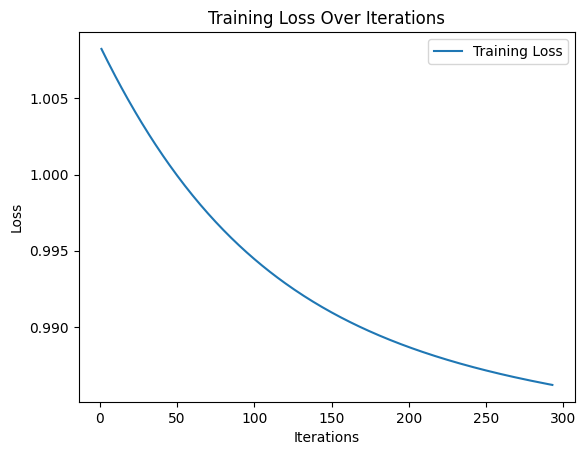


**** RUN 44 ***
Calibrating to 5 patients
Early stopping after 1370 epochs.
Optimized thetas: tensor([0.6138, 0.1931, 0.1931], grad_fn=<DivBackward0>)


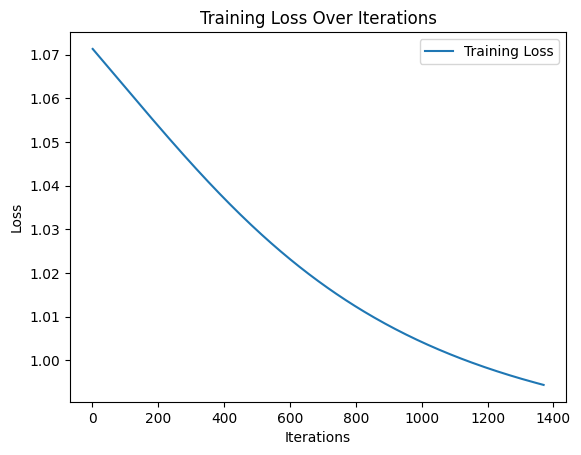

Calibrating to 8 patients
Early stopping after 773 epochs.
Optimized thetas: tensor([0.6026, 0.1921, 0.2053], grad_fn=<DivBackward0>)


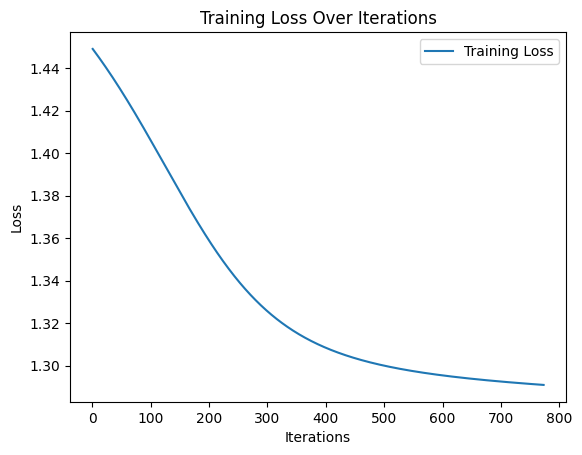

Calibrating to 17 patients
Early stopping after 240 epochs.
Optimized thetas: tensor([0.3688, 0.3188, 0.3124], grad_fn=<DivBackward0>)


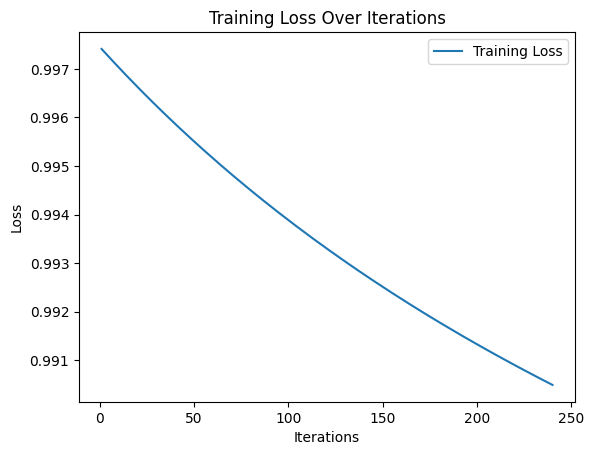

Calibrating to 50 patients
Early stopping after 649 epochs.
Optimized thetas: tensor([0.5122, 0.2532, 0.2346], grad_fn=<DivBackward0>)


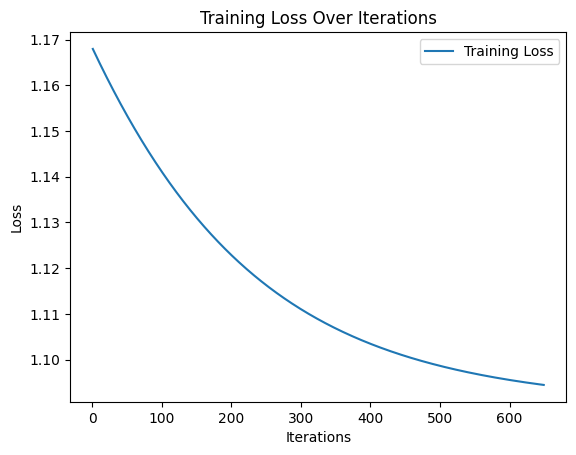


**** RUN 45 ***
Calibrating to 5 patients
Early stopping after 812 epochs.
Optimized thetas: tensor([0.5957, 0.2022, 0.2022], grad_fn=<DivBackward0>)


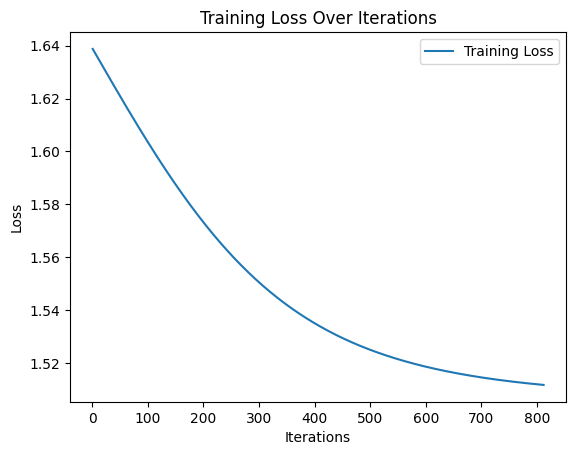

Calibrating to 8 patients
Early stopping after 426 epochs.
Optimized thetas: tensor([0.4960, 0.2089, 0.2952], grad_fn=<DivBackward0>)


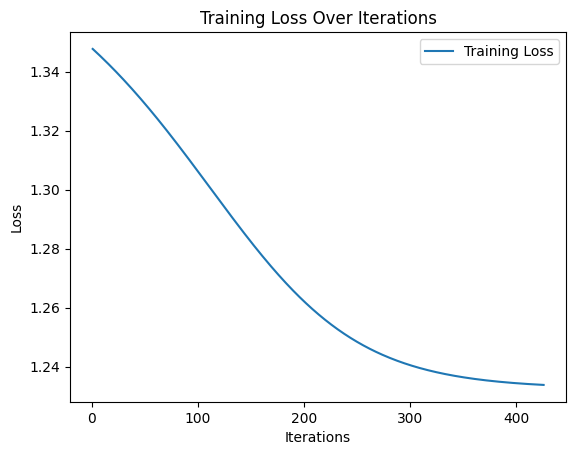

Calibrating to 17 patients
Early stopping after 937 epochs.
Optimized thetas: tensor([0.5502, 0.2674, 0.1824], grad_fn=<DivBackward0>)


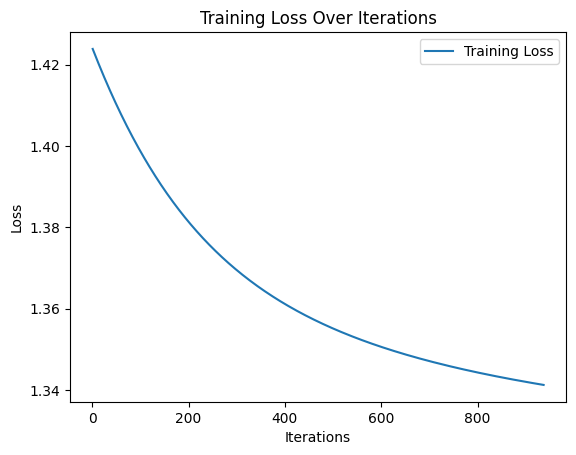

Calibrating to 50 patients
Early stopping after 683 epochs.
Optimized thetas: tensor([0.4979, 0.2530, 0.2491], grad_fn=<DivBackward0>)


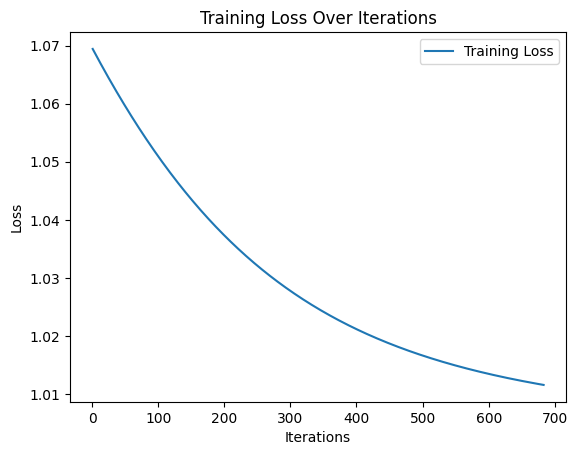


**** RUN 46 ***
Calibrating to 5 patients
Early stopping after 816 epochs.
Optimized thetas: tensor([0.5006, 0.2497, 0.2497], grad_fn=<DivBackward0>)


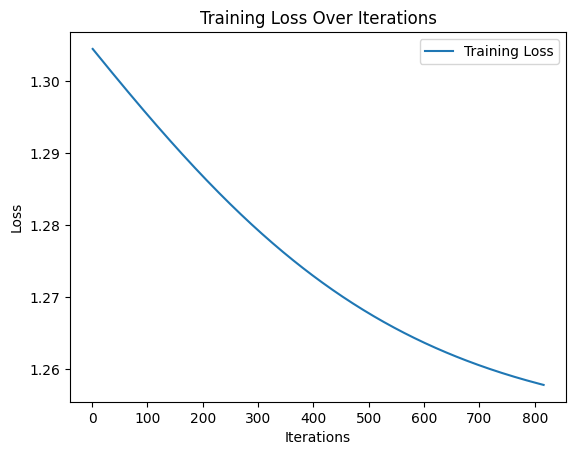

Calibrating to 8 patients
Early stopping after 426 epochs.
Optimized thetas: tensor([0.4960, 0.2089, 0.2952], grad_fn=<DivBackward0>)


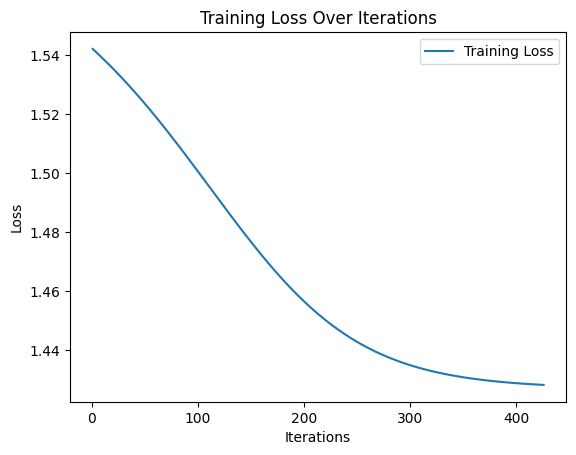

Calibrating to 17 patients
Early stopping after 733 epochs.
Optimized thetas: tensor([0.5596, 0.2345, 0.2060], grad_fn=<DivBackward0>)


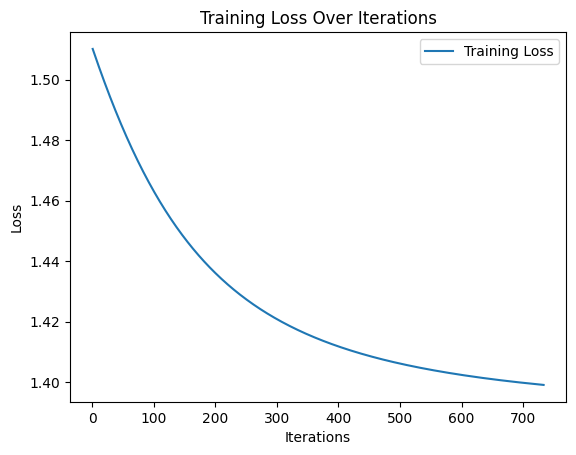

Calibrating to 50 patients
Early stopping after 726 epochs.
Optimized thetas: tensor([0.5359, 0.2555, 0.2086], grad_fn=<DivBackward0>)


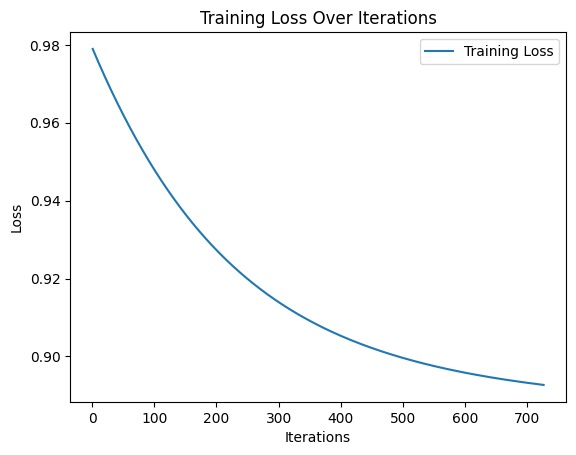


**** RUN 47 ***
Calibrating to 5 patients
Early stopping after 1001 epochs.
Optimized thetas: tensor([0.6003, 0.1999, 0.1999], grad_fn=<DivBackward0>)


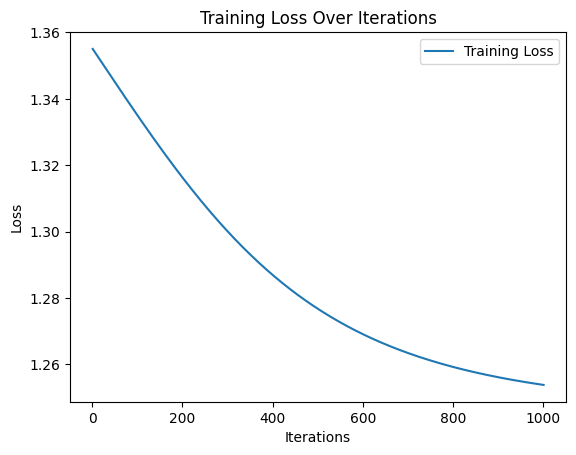

Calibrating to 8 patients
Early stopping after 1726 epochs.
Optimized thetas: tensor([0.8600, 0.0700, 0.0700], grad_fn=<DivBackward0>)


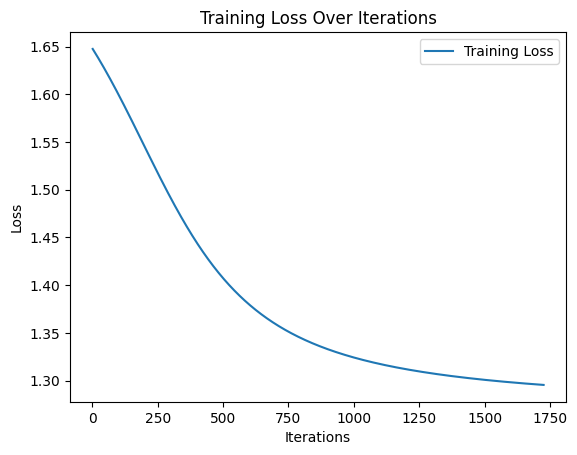

Calibrating to 17 patients
Early stopping after 773 epochs.
Optimized thetas: tensor([0.4876, 0.2962, 0.2161], grad_fn=<DivBackward0>)


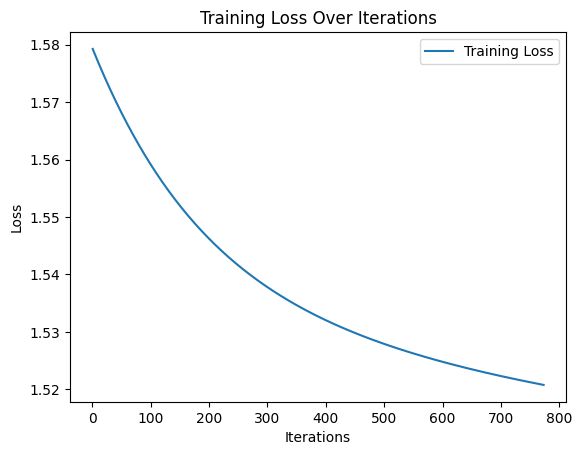

Calibrating to 50 patients
Early stopping after 550 epochs.
Optimized thetas: tensor([0.4693, 0.2614, 0.2694], grad_fn=<DivBackward0>)


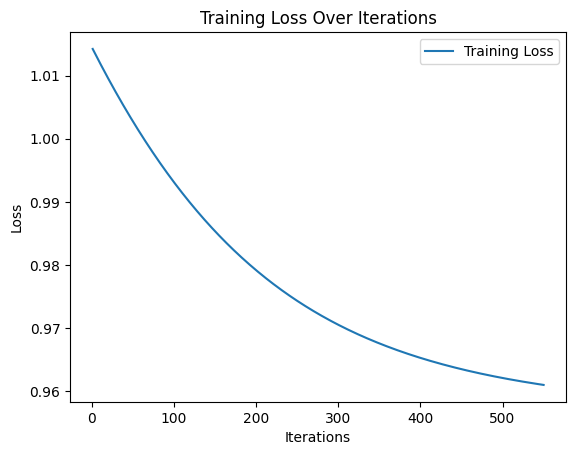


**** RUN 48 ***
Calibrating to 5 patients
Early stopping after 411 epochs.
Optimized thetas: tensor([0.3846, 0.3077, 0.3077], grad_fn=<DivBackward0>)


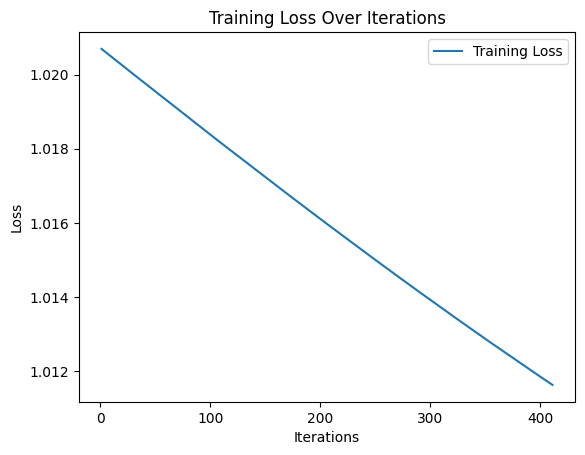

Calibrating to 8 patients
Early stopping after 6 epochs.
Optimized thetas: tensor([0.3333, 0.3333, 0.3333], grad_fn=<DivBackward0>)


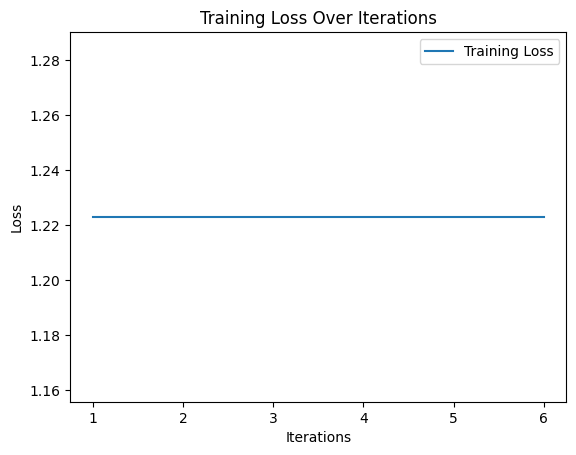

Calibrating to 17 patients
Early stopping after 602 epochs.
Optimized thetas: tensor([0.4922, 0.2526, 0.2552], grad_fn=<DivBackward0>)


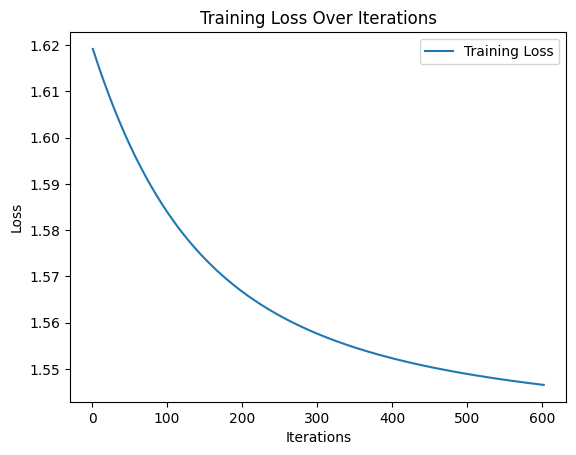

Calibrating to 50 patients
Early stopping after 625 epochs.
Optimized thetas: tensor([0.4605, 0.2963, 0.2432], grad_fn=<DivBackward0>)


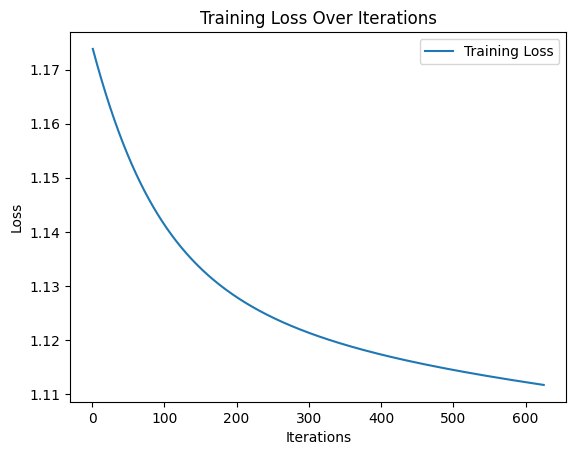


**** RUN 49 ***
Calibrating to 5 patients
Early stopping after 884 epochs.
Optimized thetas: tensor([0.7037, 0.1481, 0.1481], grad_fn=<DivBackward0>)


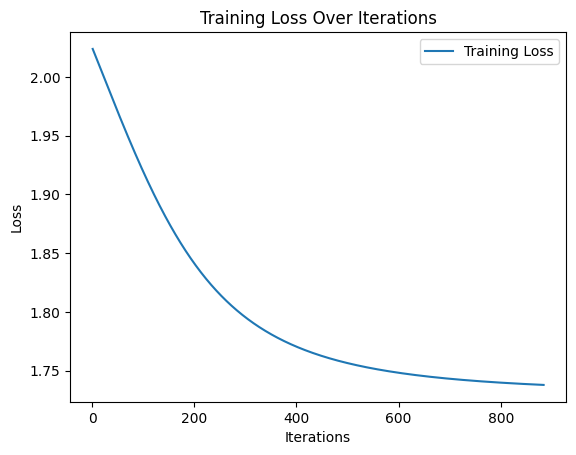

Calibrating to 8 patients
Early stopping after 658 epochs.
Optimized thetas: tensor([0.4804, 0.2194, 0.3002], grad_fn=<DivBackward0>)


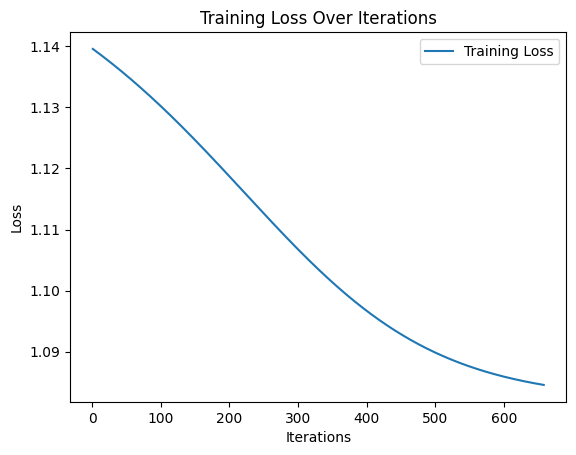

Calibrating to 17 patients
Early stopping after 842 epochs.
Optimized thetas: tensor([0.6199, 0.2123, 0.1678], grad_fn=<DivBackward0>)


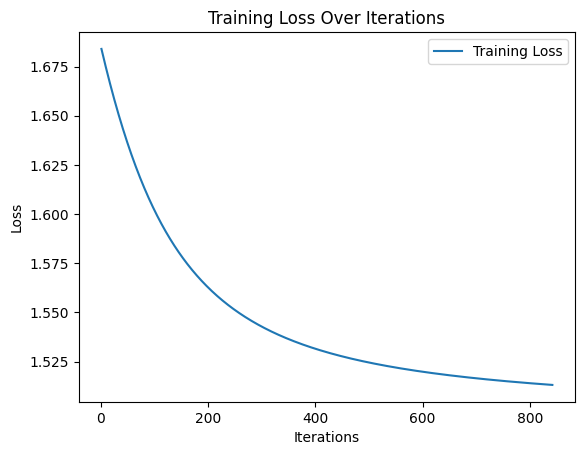

Calibrating to 50 patients
Early stopping after 592 epochs.
Optimized thetas: tensor([0.4838, 0.2679, 0.2484], grad_fn=<DivBackward0>)


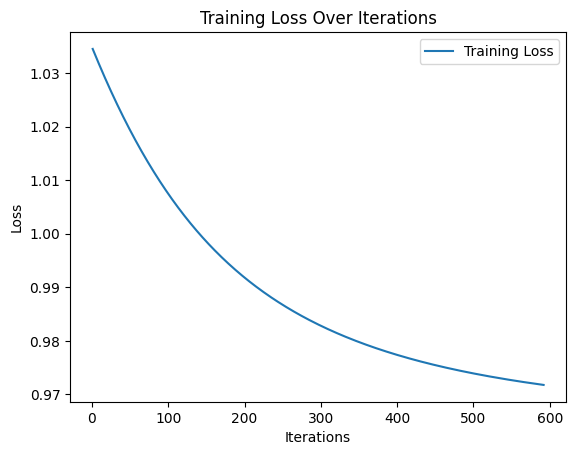


**** RUN 50 ***
Calibrating to 5 patients
Early stopping after 816 epochs.
Optimized thetas: tensor([0.5006, 0.2497, 0.2497], grad_fn=<DivBackward0>)


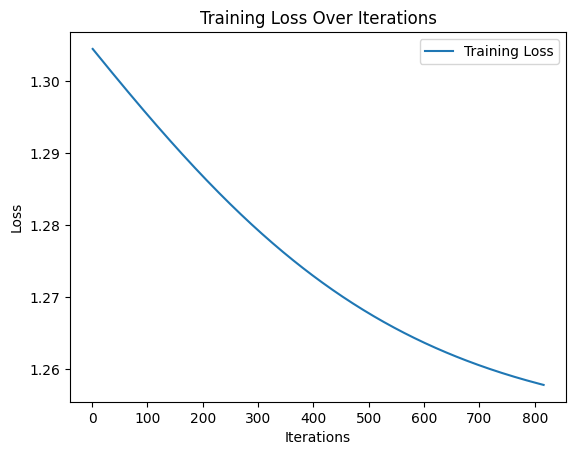

Calibrating to 8 patients
Early stopping after 1726 epochs.
Optimized thetas: tensor([0.8600, 0.0700, 0.0700], grad_fn=<DivBackward0>)


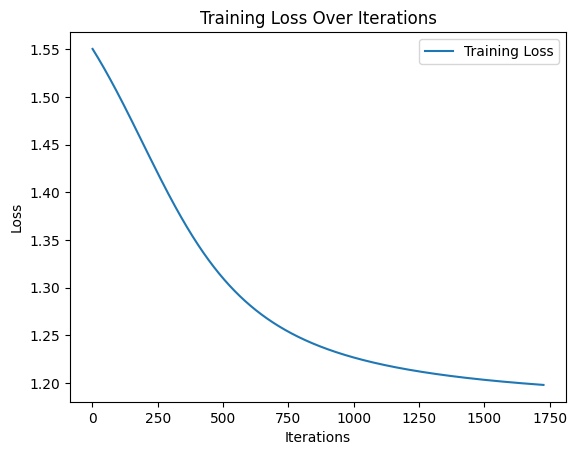

Calibrating to 17 patients
Early stopping after 933 epochs.
Optimized thetas: tensor([0.5661, 0.2092, 0.2247], grad_fn=<DivBackward0>)


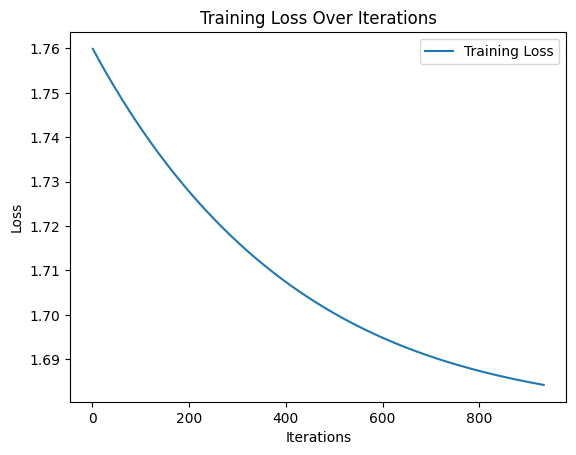

Calibrating to 50 patients
Early stopping after 522 epochs.
Optimized thetas: tensor([0.4617, 0.2588, 0.2795], grad_fn=<DivBackward0>)


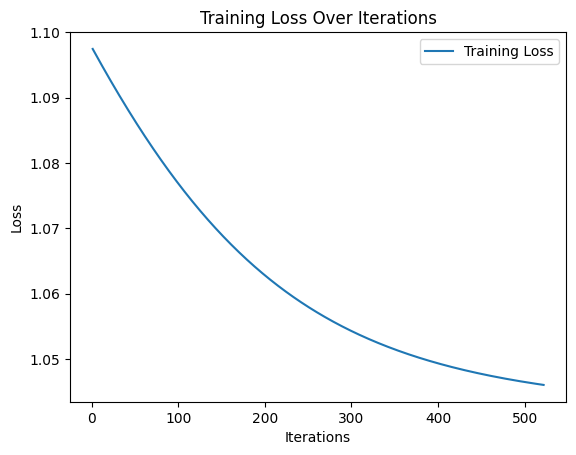

dataset Parsimony metric  Fit theta
0            HGSOC        Migration      0.746
1            HGSOC      Comigration      0.127
2            HGSOC     Seeding site      0.127
3         Melanoma        Migration      0.333
4         Melanoma      Comigration      0.333
..             ...              ...        ...
595  Neuroblastoma      Comigration      0.209
596  Neuroblastoma     Seeding site      0.225
597          NSCLC        Migration      0.462
598          NSCLC      Comigration      0.259
599          NSCLC     Seeding site      0.280

[600 rows x 3 columns]

In [3]:
data = []

num_bootstrap_samples = 50

# Bootstrap sampling
for i in range(num_bootstrap_samples):
    print(f"\n**** RUN {i+1} ***")
    for dataset in dataset_to_pickle_files:
        matching_files = [x[0] for x in dataset_to_pickle_files[dataset]]
        if len(matching_files) == 0:
            continue
        # Create a bootstrap sample by sampling with replacement
        bootstrap_sample = list(np.random.choice(matching_files, size=len(matching_files), replace=True))
        thetas = eutil.get_max_cross_ent_thetas(pickle_file_list=bootstrap_sample)
        #thetas = convert_thetas_to_alt_metrics(thetas)
        for midx, metric in enumerate(METRICS):
            data.append([dataset, metric, thetas[midx]])

thetas_split_on_same_cohort = pd.DataFrame(data, columns=["dataset", "Parsimony metric", "Fit theta"])
thetas_split_on_same_cohort

### How consistent are thetas when calibrating on random samples amongst all cancer type cohorts?

[5, 8, 17, 50] 80

**** RUN 1 ***
Calibrating to 80 patients
Early stopping after 668 epochs.
Optimized thetas: tensor([0.5437, 0.2246, 0.2317], grad_fn=<DivBackward0>)


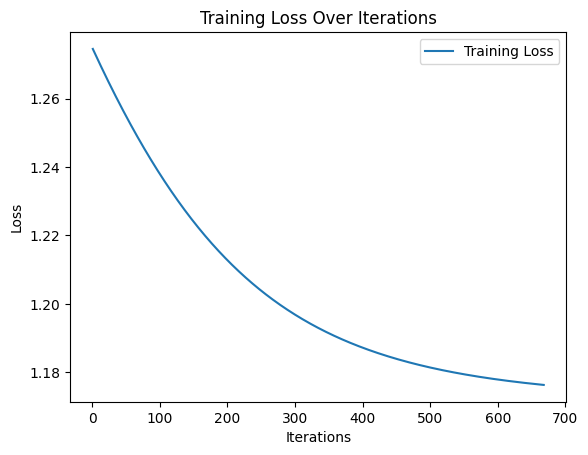


**** RUN 2 ***
Calibrating to 80 patients
Early stopping after 637 epochs.
Optimized thetas: tensor([0.4763, 0.2833, 0.2404], grad_fn=<DivBackward0>)


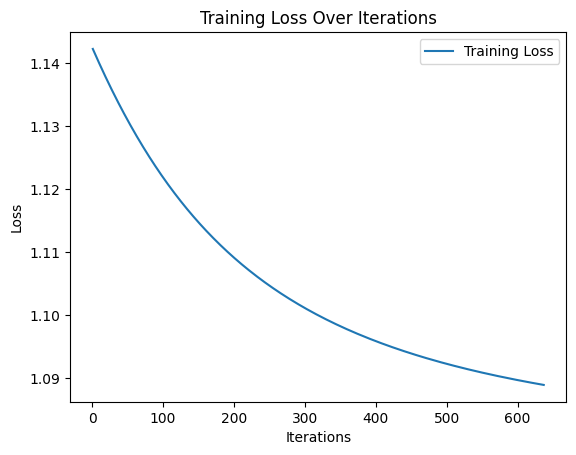


**** RUN 3 ***
Calibrating to 80 patients
Early stopping after 520 epochs.
Optimized thetas: tensor([0.4424, 0.2900, 0.2676], grad_fn=<DivBackward0>)


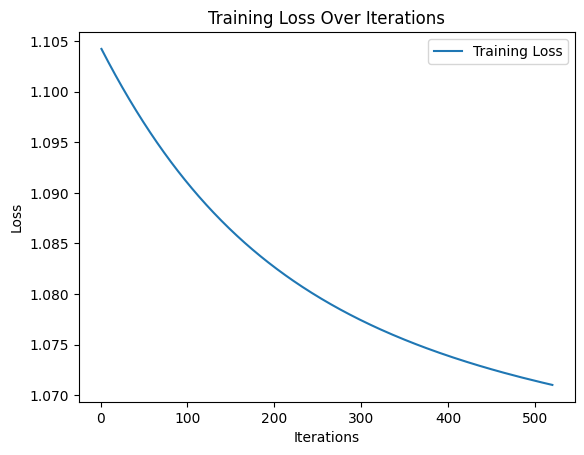


**** RUN 4 ***
Calibrating to 80 patients
Early stopping after 609 epochs.
Optimized thetas: tensor([0.5038, 0.2375, 0.2587], grad_fn=<DivBackward0>)


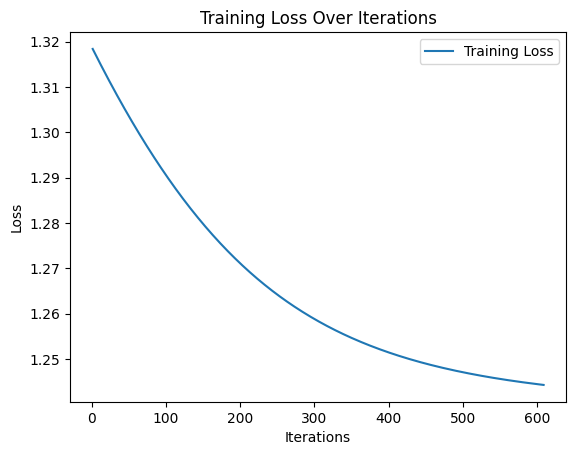


**** RUN 5 ***
Calibrating to 80 patients
Early stopping after 648 epochs.
Optimized thetas: tensor([0.5564, 0.2204, 0.2233], grad_fn=<DivBackward0>)


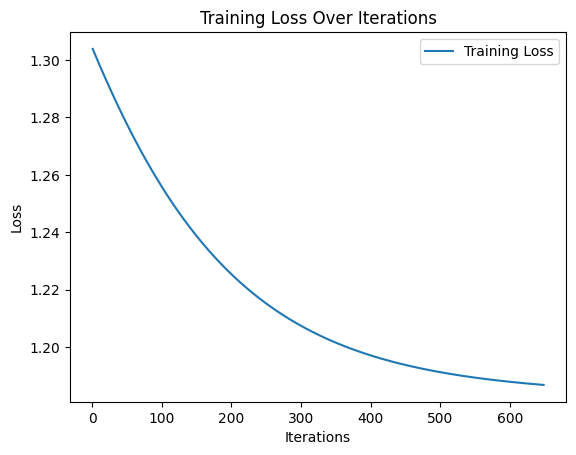


**** RUN 6 ***
Calibrating to 80 patients
Early stopping after 549 epochs.
Optimized thetas: tensor([0.4854, 0.2530, 0.2616], grad_fn=<DivBackward0>)


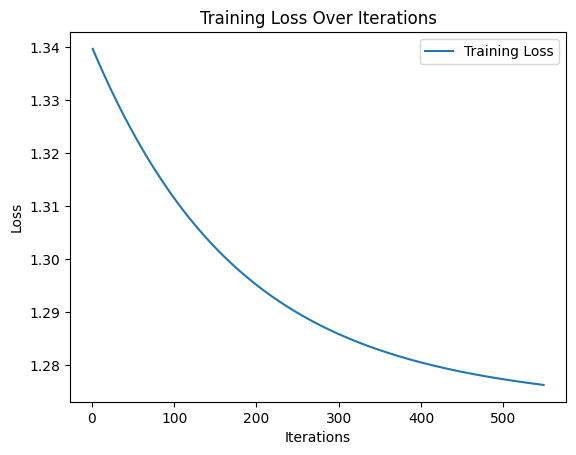


**** RUN 7 ***
Calibrating to 80 patients
Early stopping after 558 epochs.
Optimized thetas: tensor([0.4658, 0.2663, 0.2679], grad_fn=<DivBackward0>)


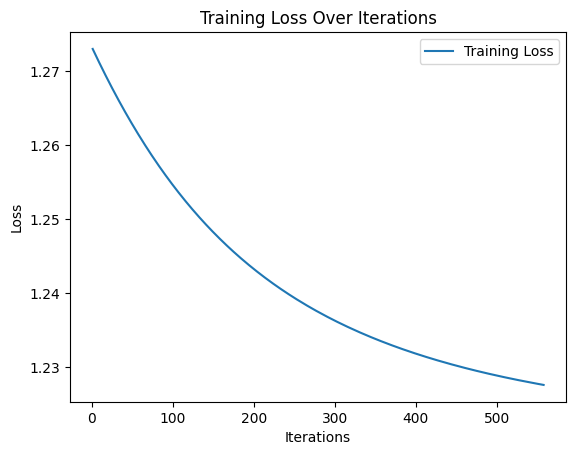


**** RUN 8 ***
Calibrating to 80 patients
Early stopping after 608 epochs.
Optimized thetas: tensor([0.4594, 0.2787, 0.2619], grad_fn=<DivBackward0>)


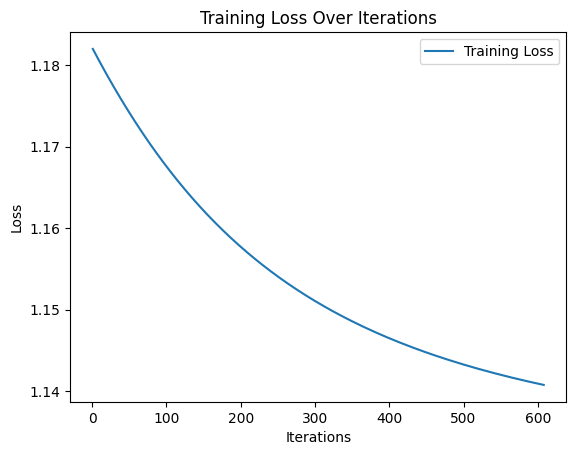


**** RUN 9 ***
Calibrating to 80 patients
Early stopping after 516 epochs.
Optimized thetas: tensor([0.4306, 0.2925, 0.2769], grad_fn=<DivBackward0>)


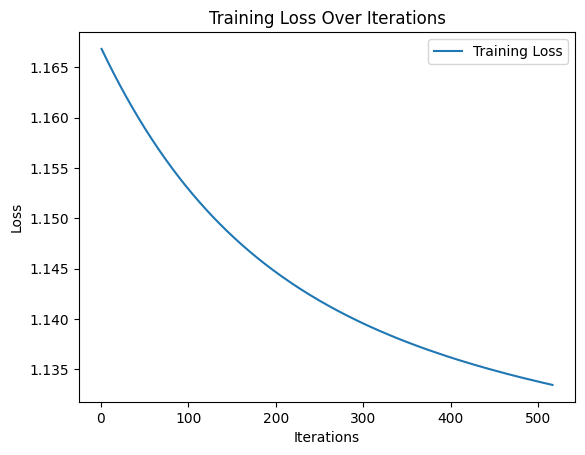


**** RUN 10 ***
Calibrating to 80 patients
Early stopping after 549 epochs.
Optimized thetas: tensor([0.4371, 0.2955, 0.2674], grad_fn=<DivBackward0>)


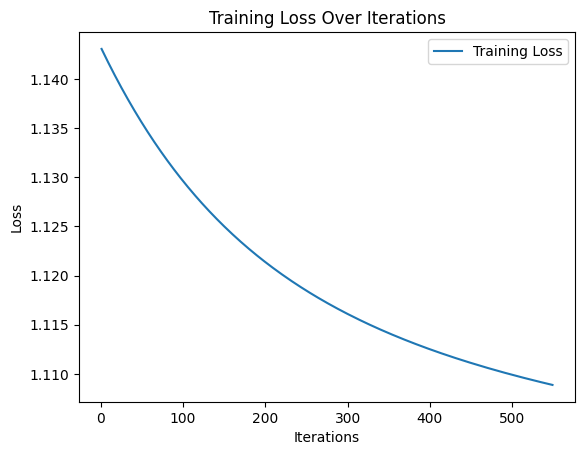


**** RUN 11 ***
Calibrating to 80 patients
Early stopping after 474 epochs.
Optimized thetas: tensor([0.4467, 0.2629, 0.2904], grad_fn=<DivBackward0>)


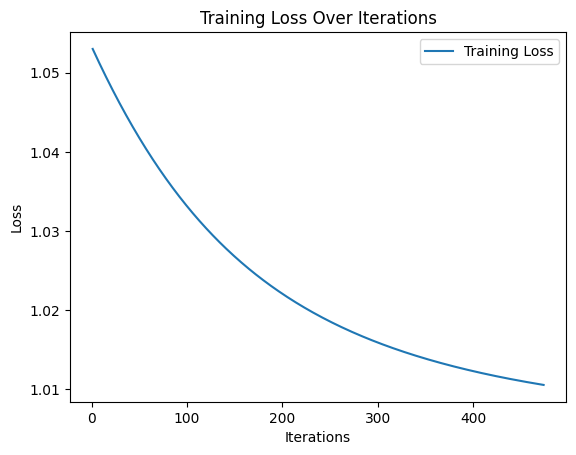


**** RUN 12 ***
Calibrating to 80 patients
Early stopping after 773 epochs.
Optimized thetas: tensor([0.5673, 0.2250, 0.2077], grad_fn=<DivBackward0>)


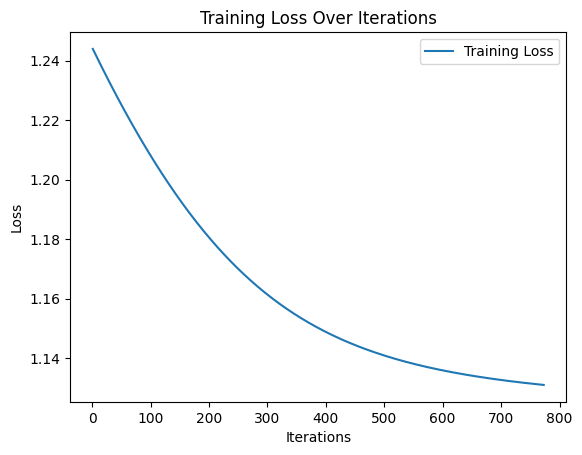


**** RUN 13 ***
Calibrating to 80 patients
Early stopping after 548 epochs.
Optimized thetas: tensor([0.4572, 0.2641, 0.2787], grad_fn=<DivBackward0>)


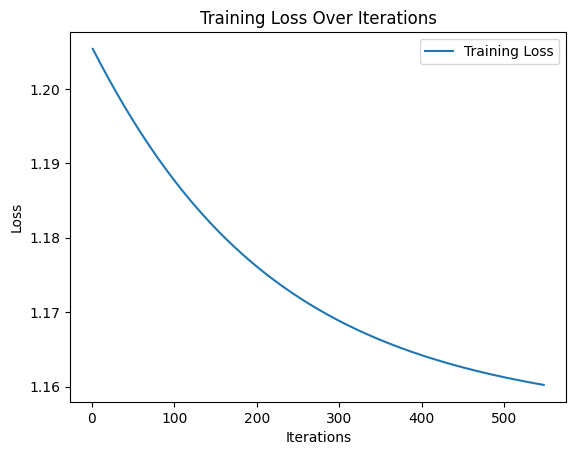


**** RUN 14 ***
Calibrating to 80 patients
Early stopping after 642 epochs.
Optimized thetas: tensor([0.5350, 0.2323, 0.2327], grad_fn=<DivBackward0>)


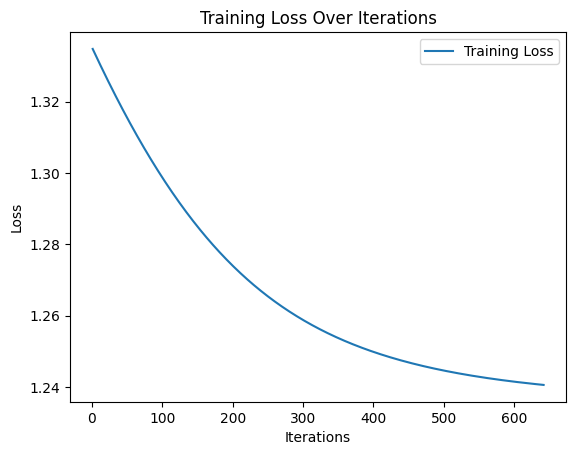


**** RUN 15 ***
Calibrating to 80 patients
Early stopping after 678 epochs.
Optimized thetas: tensor([0.4588, 0.2664, 0.2749], grad_fn=<DivBackward0>)


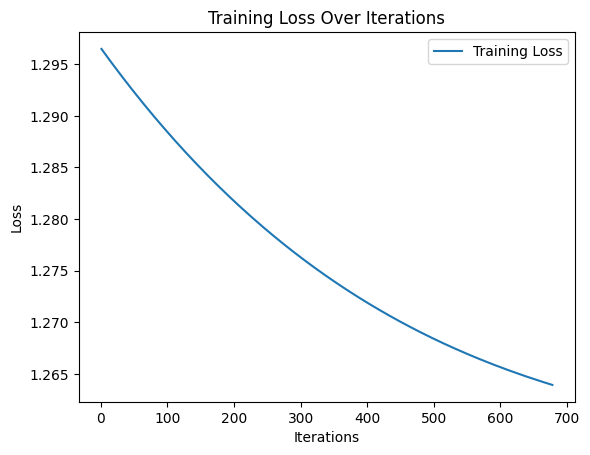


**** RUN 16 ***
Calibrating to 80 patients
Early stopping after 701 epochs.
Optimized thetas: tensor([0.5274, 0.2343, 0.2382], grad_fn=<DivBackward0>)


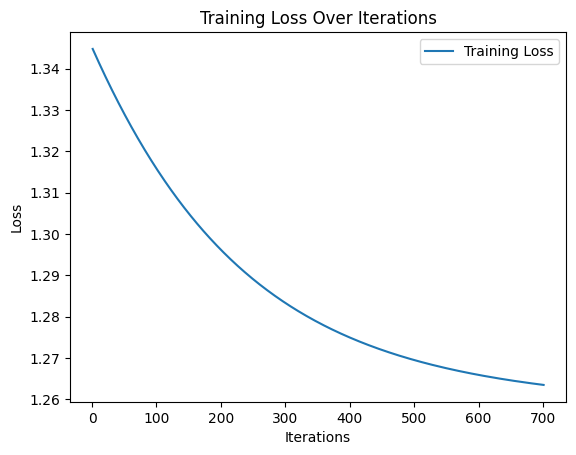


**** RUN 17 ***
Calibrating to 80 patients
Early stopping after 587 epochs.
Optimized thetas: tensor([0.4787, 0.2630, 0.2583], grad_fn=<DivBackward0>)


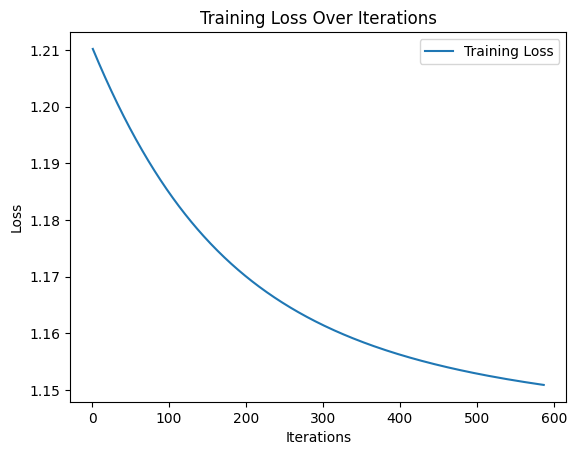


**** RUN 18 ***
Calibrating to 80 patients
Early stopping after 546 epochs.
Optimized thetas: tensor([0.4832, 0.2524, 0.2644], grad_fn=<DivBackward0>)


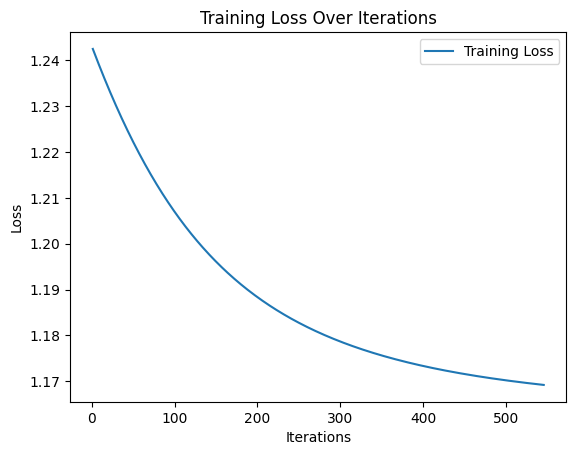


**** RUN 19 ***
Calibrating to 80 patients
Early stopping after 517 epochs.
Optimized thetas: tensor([0.4672, 0.2625, 0.2703], grad_fn=<DivBackward0>)


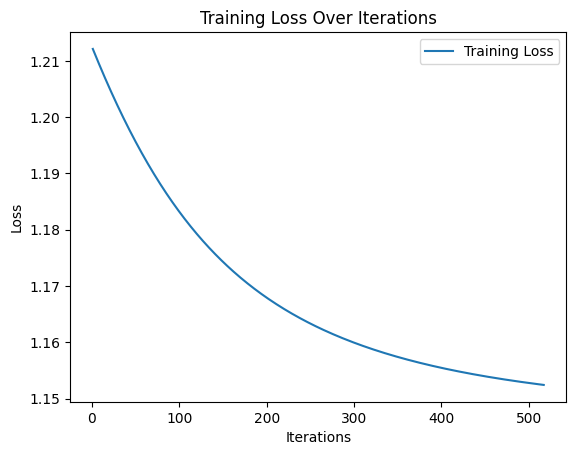


**** RUN 20 ***
Calibrating to 80 patients
Early stopping after 620 epochs.
Optimized thetas: tensor([0.4650, 0.2578, 0.2772], grad_fn=<DivBackward0>)


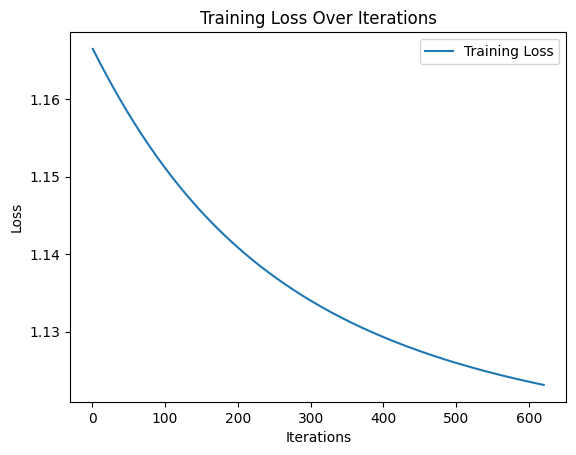


**** RUN 21 ***
Calibrating to 80 patients
Early stopping after 661 epochs.
Optimized thetas: tensor([0.5003, 0.2496, 0.2501], grad_fn=<DivBackward0>)


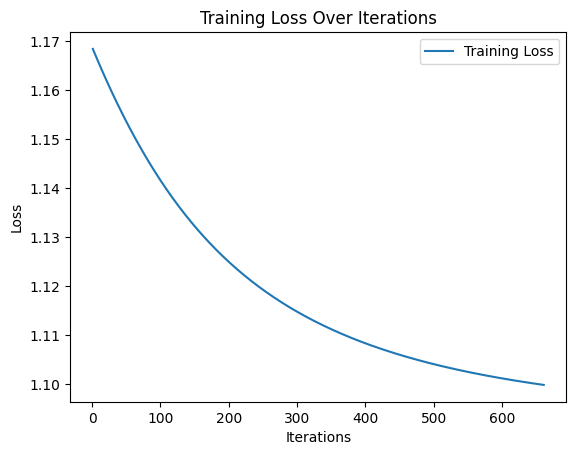


**** RUN 22 ***
Calibrating to 80 patients
Early stopping after 719 epochs.
Optimized thetas: tensor([0.5088, 0.2520, 0.2392], grad_fn=<DivBackward0>)


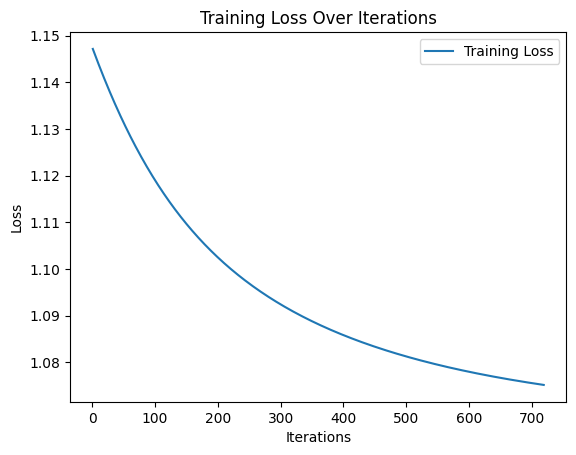


**** RUN 23 ***
Calibrating to 80 patients
Early stopping after 616 epochs.
Optimized thetas: tensor([0.4897, 0.2634, 0.2469], grad_fn=<DivBackward0>)


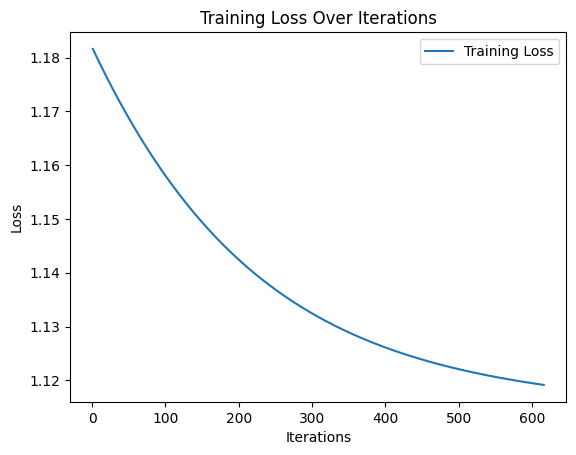


**** RUN 24 ***
Calibrating to 80 patients
Early stopping after 805 epochs.
Optimized thetas: tensor([0.5626, 0.2202, 0.2172], grad_fn=<DivBackward0>)


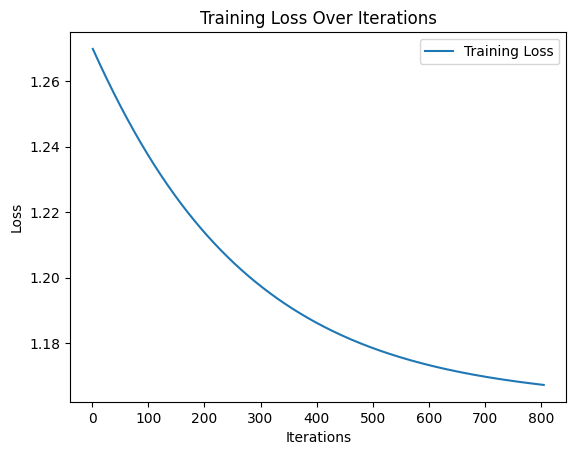


**** RUN 25 ***
Calibrating to 80 patients
Early stopping after 706 epochs.
Optimized thetas: tensor([0.5129, 0.2597, 0.2274], grad_fn=<DivBackward0>)


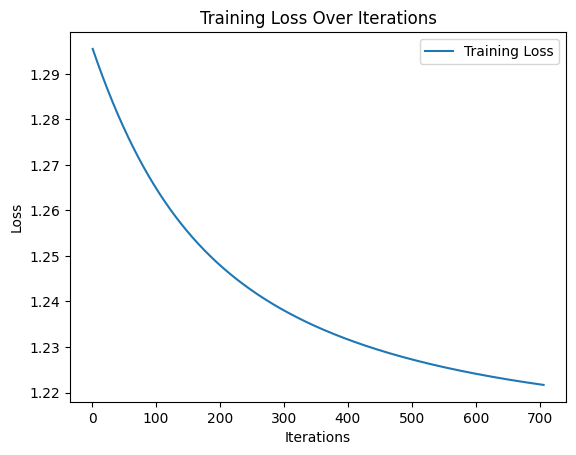


**** RUN 26 ***
Calibrating to 80 patients
Early stopping after 597 epochs.
Optimized thetas: tensor([0.5290, 0.2266, 0.2444], grad_fn=<DivBackward0>)


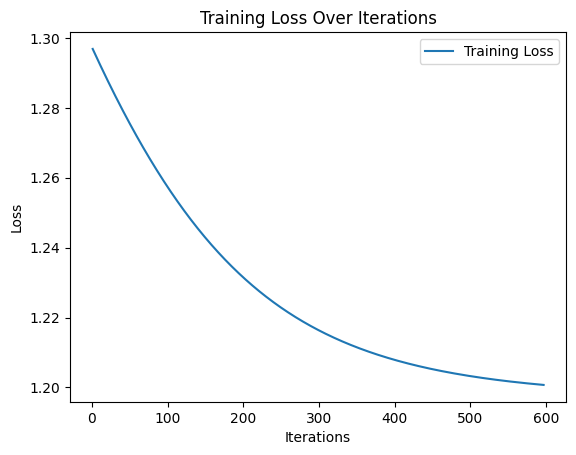


**** RUN 27 ***
Calibrating to 80 patients
Early stopping after 873 epochs.
Optimized thetas: tensor([0.5777, 0.2171, 0.2052], grad_fn=<DivBackward0>)


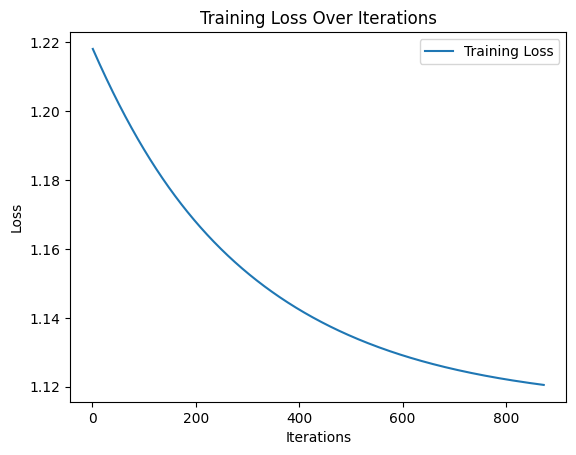


**** RUN 28 ***
Calibrating to 80 patients
Early stopping after 560 epochs.
Optimized thetas: tensor([0.4746, 0.2774, 0.2480], grad_fn=<DivBackward0>)


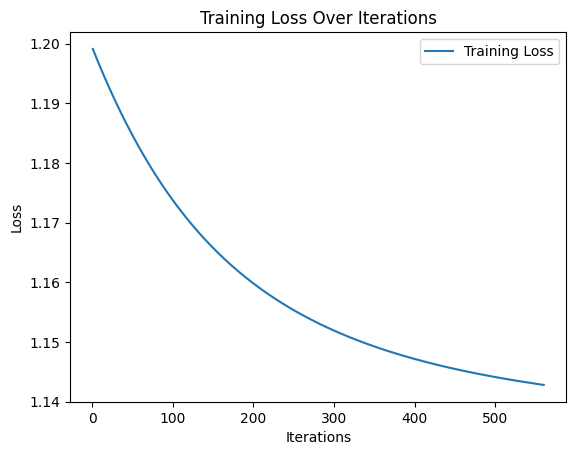


**** RUN 29 ***
Calibrating to 80 patients
Early stopping after 735 epochs.
Optimized thetas: tensor([0.5254, 0.2415, 0.2331], grad_fn=<DivBackward0>)


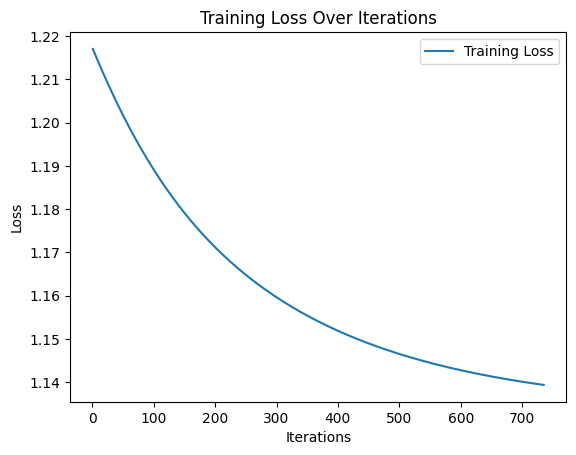


**** RUN 30 ***
Calibrating to 80 patients
Early stopping after 899 epochs.
Optimized thetas: tensor([0.5390, 0.2385, 0.2224], grad_fn=<DivBackward0>)


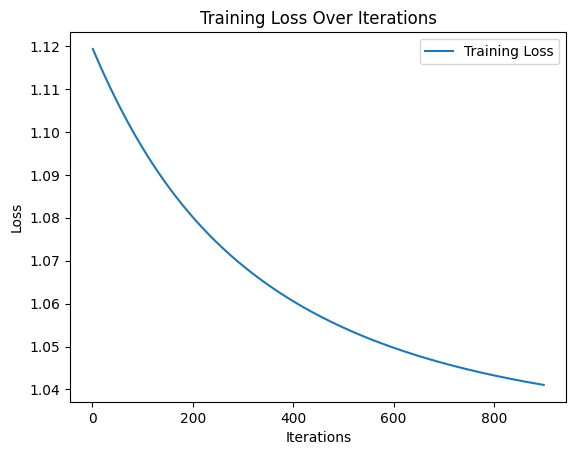


**** RUN 31 ***
Calibrating to 80 patients
Early stopping after 836 epochs.
Optimized thetas: tensor([0.5156, 0.2542, 0.2302], grad_fn=<DivBackward0>)


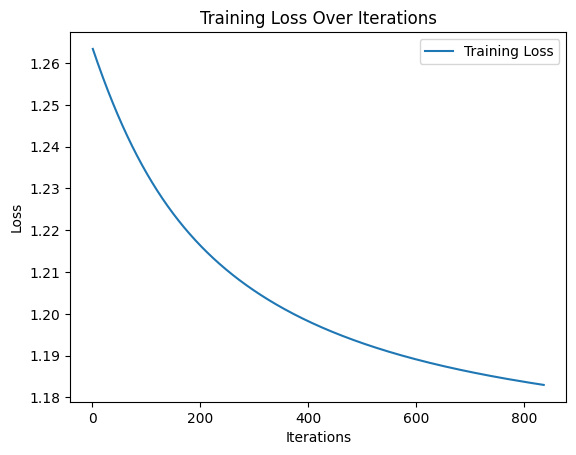


**** RUN 32 ***
Calibrating to 80 patients
Early stopping after 762 epochs.
Optimized thetas: tensor([0.5160, 0.2580, 0.2259], grad_fn=<DivBackward0>)


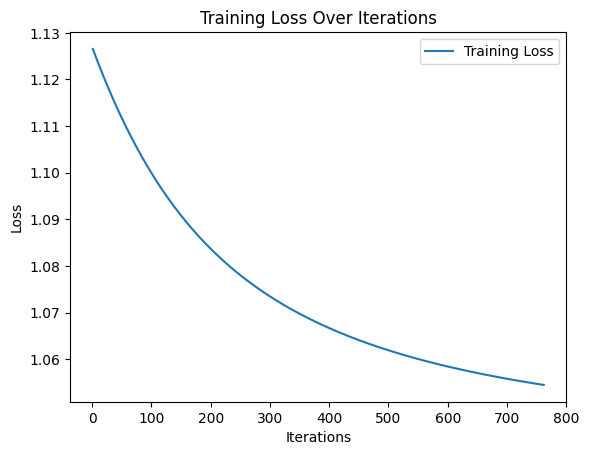


**** RUN 33 ***
Calibrating to 80 patients
Early stopping after 646 epochs.
Optimized thetas: tensor([0.5091, 0.2495, 0.2413], grad_fn=<DivBackward0>)


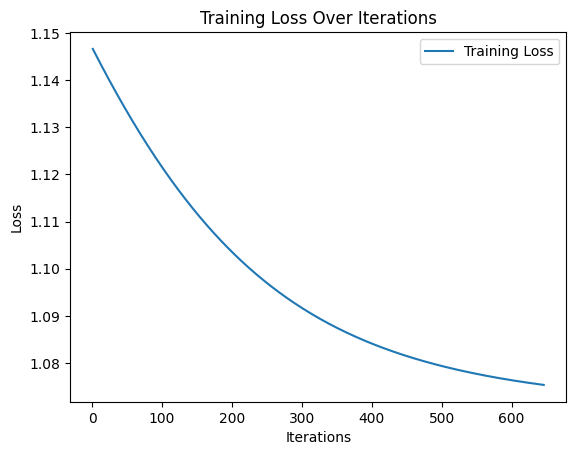


**** RUN 34 ***
Calibrating to 80 patients
Early stopping after 332 epochs.
Optimized thetas: tensor([0.3946, 0.3056, 0.2998], grad_fn=<DivBackward0>)


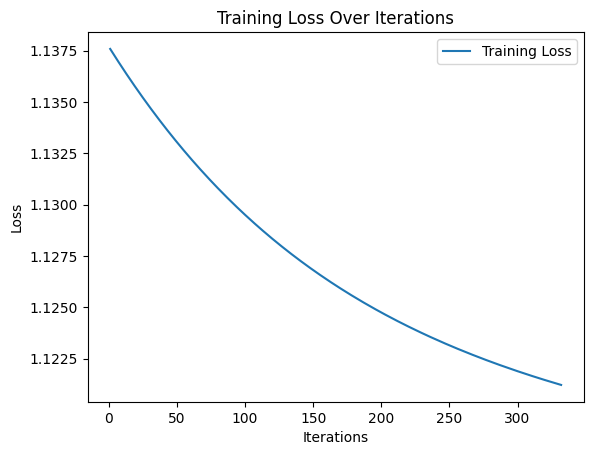


**** RUN 35 ***
Calibrating to 80 patients
Early stopping after 778 epochs.
Optimized thetas: tensor([0.5180, 0.2478, 0.2342], grad_fn=<DivBackward0>)


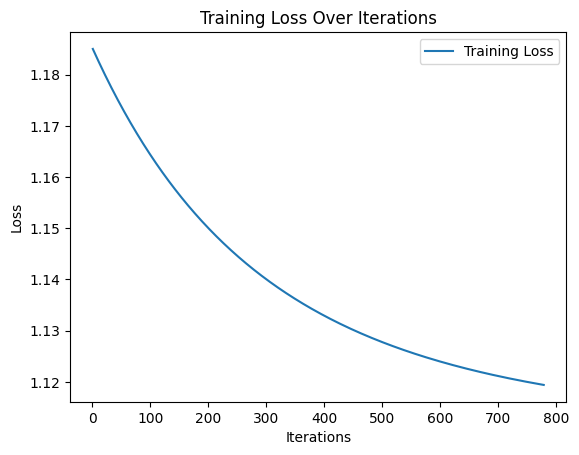


**** RUN 36 ***
Calibrating to 80 patients
Early stopping after 684 epochs.
Optimized thetas: tensor([0.4641, 0.2737, 0.2622], grad_fn=<DivBackward0>)


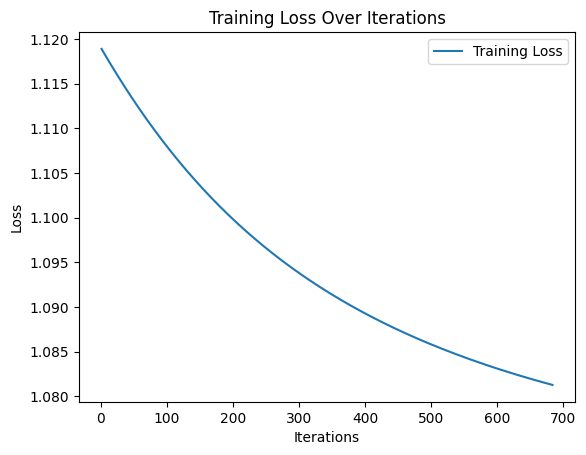


**** RUN 37 ***
Calibrating to 80 patients
Early stopping after 694 epochs.
Optimized thetas: tensor([0.4604, 0.2585, 0.2811], grad_fn=<DivBackward0>)


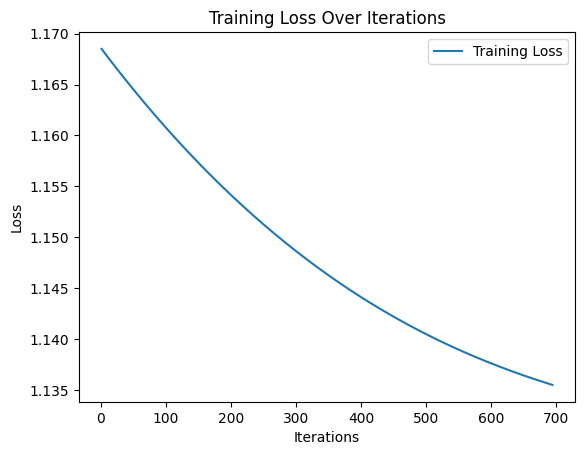


**** RUN 38 ***
Calibrating to 80 patients
Early stopping after 604 epochs.
Optimized thetas: tensor([0.4976, 0.2450, 0.2573], grad_fn=<DivBackward0>)


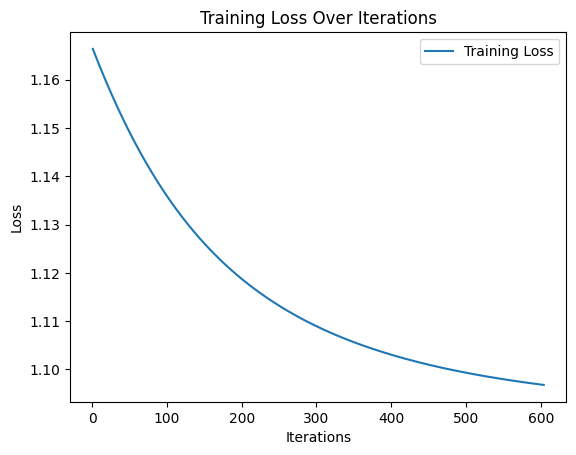


**** RUN 39 ***
Calibrating to 80 patients
Early stopping after 422 epochs.
Optimized thetas: tensor([0.4299, 0.2931, 0.2770], grad_fn=<DivBackward0>)


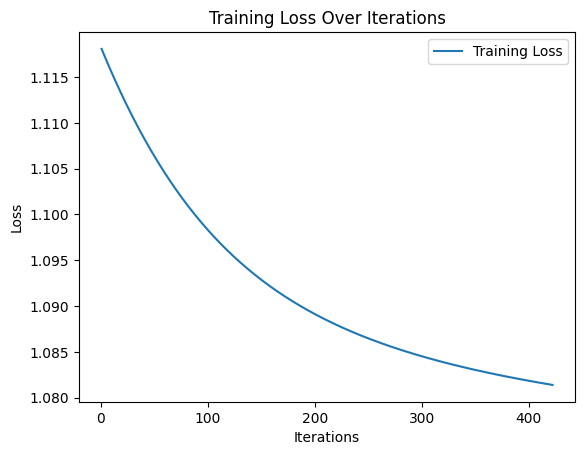


**** RUN 40 ***
Calibrating to 80 patients
Early stopping after 724 epochs.
Optimized thetas: tensor([0.5398, 0.2299, 0.2303], grad_fn=<DivBackward0>)


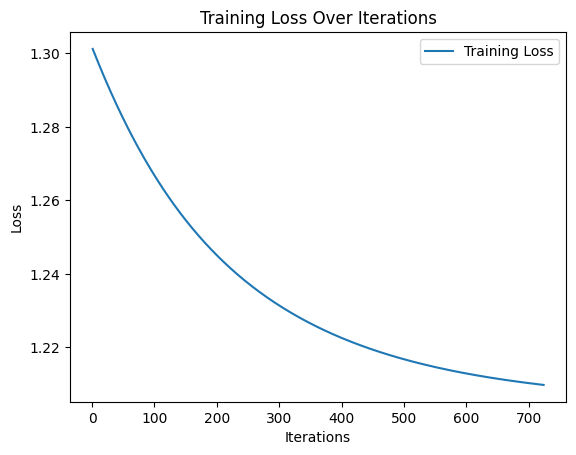


**** RUN 41 ***
Calibrating to 80 patients
Early stopping after 639 epochs.
Optimized thetas: tensor([0.5389, 0.2350, 0.2261], grad_fn=<DivBackward0>)


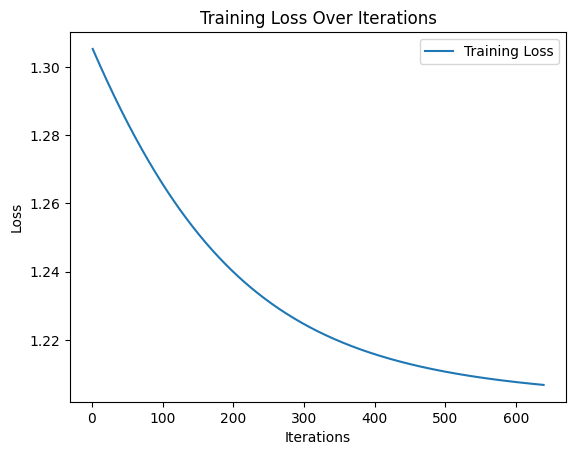


**** RUN 42 ***
Calibrating to 80 patients
Early stopping after 811 epochs.
Optimized thetas: tensor([0.5257, 0.2496, 0.2246], grad_fn=<DivBackward0>)


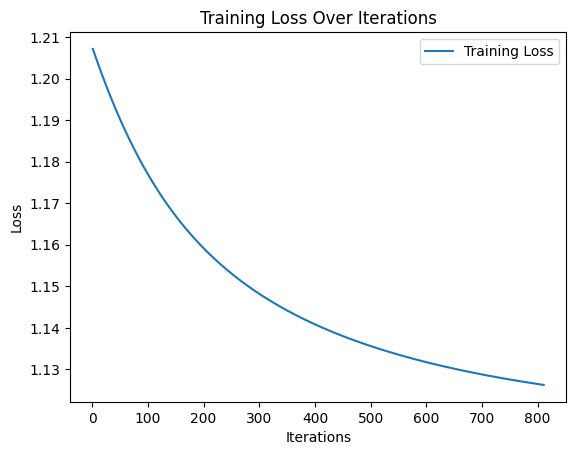


**** RUN 43 ***
Calibrating to 80 patients
Early stopping after 610 epochs.
Optimized thetas: tensor([0.5071, 0.2469, 0.2460], grad_fn=<DivBackward0>)


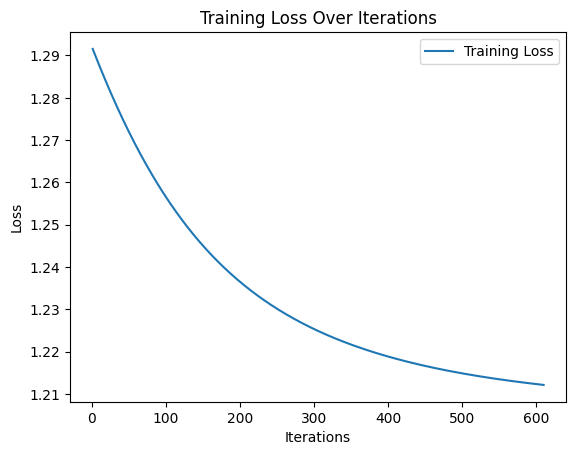


**** RUN 44 ***
Calibrating to 80 patients
Early stopping after 428 epochs.
Optimized thetas: tensor([0.4232, 0.2834, 0.2933], grad_fn=<DivBackward0>)


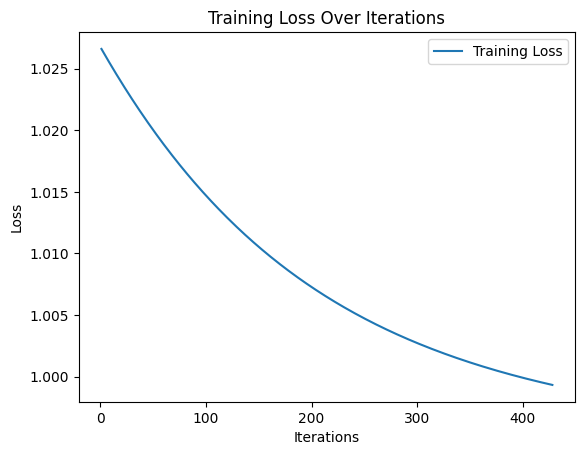


**** RUN 45 ***
Calibrating to 80 patients
Early stopping after 698 epochs.
Optimized thetas: tensor([0.5386, 0.2368, 0.2246], grad_fn=<DivBackward0>)


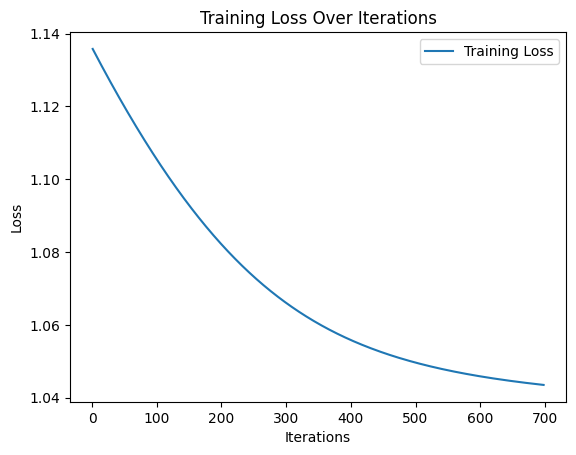


**** RUN 46 ***
Calibrating to 80 patients
Early stopping after 730 epochs.
Optimized thetas: tensor([0.5395, 0.2354, 0.2251], grad_fn=<DivBackward0>)


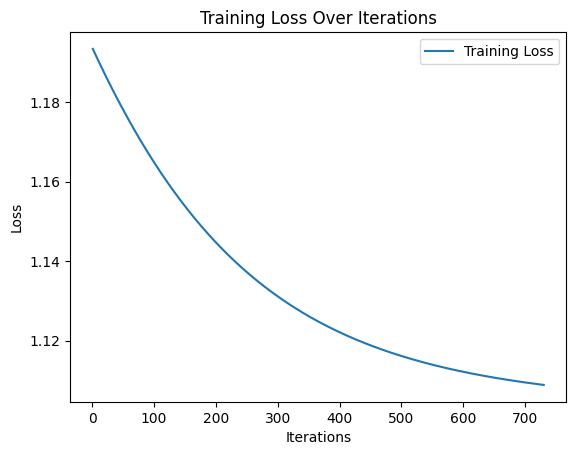


**** RUN 47 ***
Calibrating to 80 patients
Early stopping after 516 epochs.
Optimized thetas: tensor([0.4694, 0.2609, 0.2697], grad_fn=<DivBackward0>)


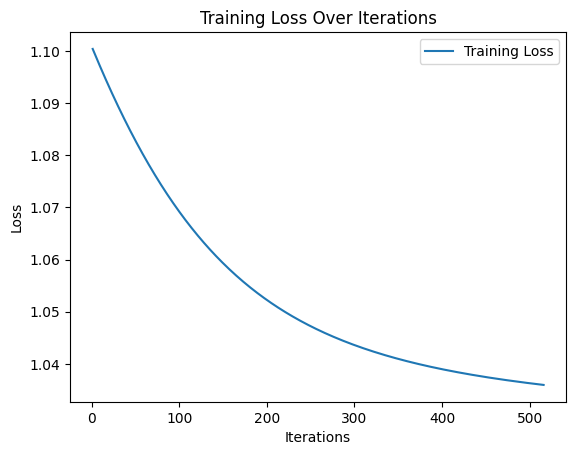


**** RUN 48 ***
Calibrating to 80 patients
Early stopping after 609 epochs.
Optimized thetas: tensor([0.4834, 0.2538, 0.2627], grad_fn=<DivBackward0>)


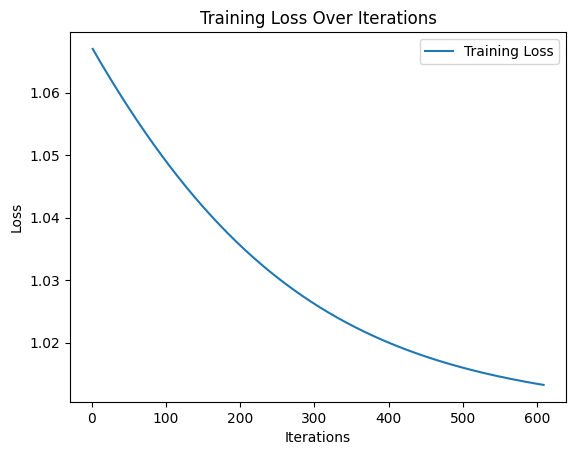


**** RUN 49 ***
Calibrating to 80 patients
Early stopping after 492 epochs.
Optimized thetas: tensor([0.4455, 0.2833, 0.2712], grad_fn=<DivBackward0>)


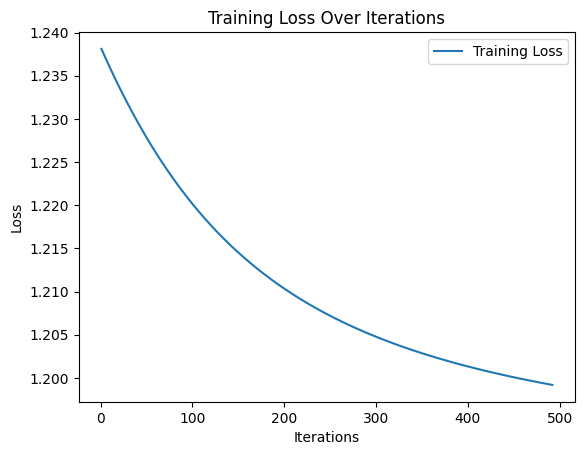


**** RUN 50 ***
Calibrating to 80 patients
Early stopping after 666 epochs.
Optimized thetas: tensor([0.5159, 0.2318, 0.2523], grad_fn=<DivBackward0>)


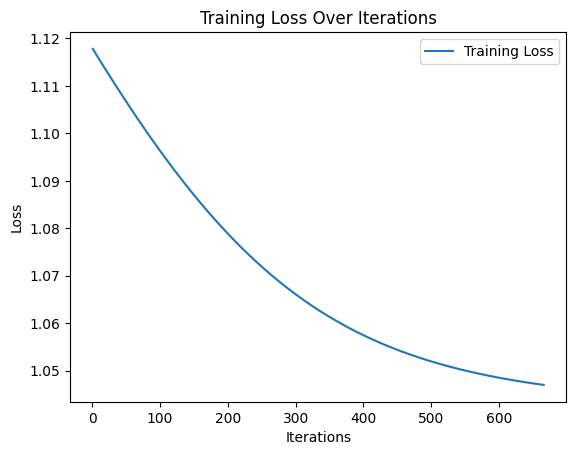

Parsimony metric  Fit theta
0          Migration      0.544
1        Comigration      0.225
2       Seeding site      0.232
3          Migration      0.476
4        Comigration      0.283
..               ...        ...
145      Comigration      0.283
146     Seeding site      0.271
147        Migration      0.516
148      Comigration      0.232
149     Seeding site      0.252

[150 rows x 2 columns]

In [4]:
data = []
dataset_sizes = []
all_matching_files = []
for dataset in dataset_to_pickle_files:
    files = dataset_to_pickle_files[dataset]
    dataset_sizes.append(len(files))
    all_matching_files.extend(files)
print(dataset_sizes, len(all_matching_files))

for i in range(num_bootstrap_samples):
    print(f"\n**** RUN {i+1} ***")
    matching_files = [x[0] for x in all_matching_files]
    if len(matching_files) == 0:
        continue
    # Create a bootstrap sample by sampling with replacement
    bootstrap_sample = list(np.random.choice(matching_files, size=len(matching_files), replace=True))
    thetas = eutil.get_max_cross_ent_thetas(pickle_file_list=bootstrap_sample)
    for midx, metric in enumerate(METRICS):
        data.append([metric, thetas[midx]])

thetas_split_on_random_cohort = pd.DataFrame(data, columns=["Parsimony metric", "Fit theta"])
thetas_split_on_random_cohort

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Migration v.s. Comigration: Welch's t-test independent samples, P_val=3.526e-31 stat=2.004e+01
Comigration v.s. Seeding site: Welch's t-test independent samples, P_val=1.000e+00 stat=9.780e-08
Migration v.s. Seeding site: Welch's t-test independent samples, P_val=3.526e-31 stat=2.004e+01


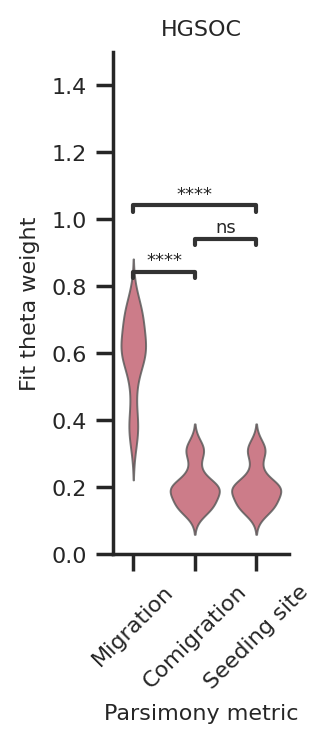

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Migration v.s. Comigration: Welch's t-test independent samples, P_val=3.260e-27 stat=1.783e+01
Comigration v.s. Seeding site: Welch's t-test independent samples, P_val=1.566e-01 stat=-1.428e+00
Migration v.s. Seeding site: Welch's t-test independent samples, P_val=2.238e-26 stat=1.598e+01


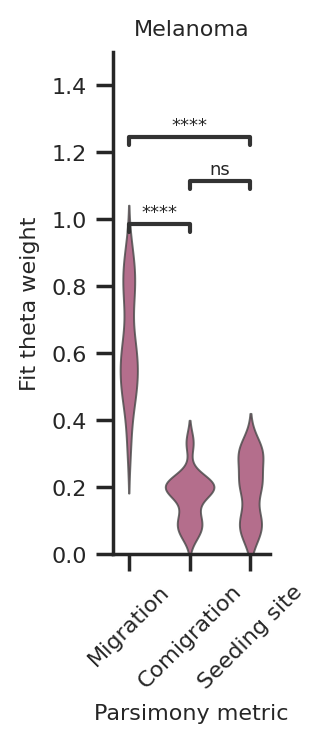

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Migration v.s. Comigration: Welch's t-test independent samples, P_val=1.390e-29 stat=1.820e+01
Comigration v.s. Seeding site: Welch's t-test independent samples, P_val=1.088e-03 stat=3.368e+00
Migration v.s. Seeding site: Welch's t-test independent samples, P_val=2.202e-33 stat=2.012e+01


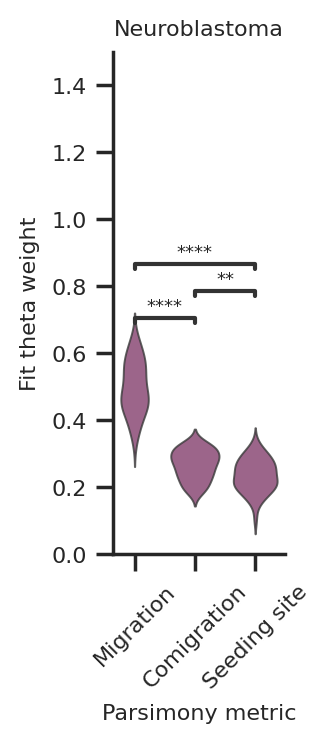

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Migration v.s. Comigration: Welch's t-test independent samples, P_val=1.398e-40 stat=2.642e+01
Comigration v.s. Seeding site: Welch's t-test independent samples, P_val=1.730e-02 stat=2.422e+00
Migration v.s. Seeding site: Welch's t-test independent samples, P_val=3.815e-43 stat=2.760e+01


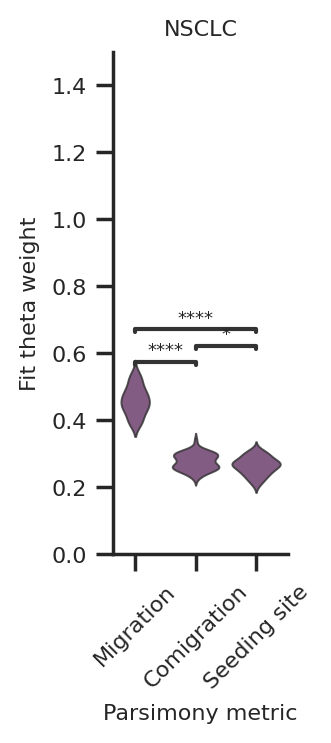

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Migration v.s. Comigration: Welch's t-test independent samples, P_val=1.796e-48 stat=3.584e+01
Comigration v.s. Seeding site: Welch's t-test independent samples, P_val=3.275e-01 stat=9.841e-01
Migration v.s. Seeding site: Welch's t-test independent samples, P_val=1.195e-49 stat=3.609e+01


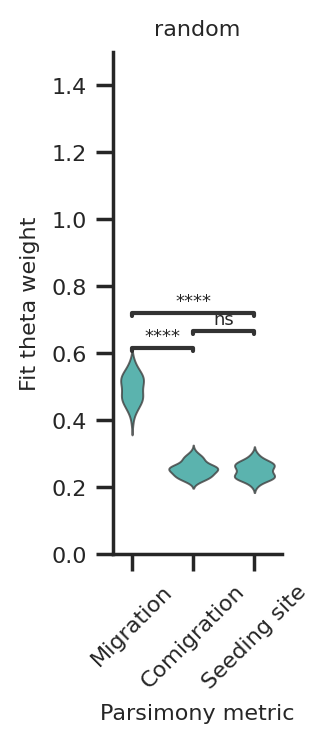

In [132]:
colors = sns.color_palette("flare")[2:]
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

def plot_horizontal_box(df, color, name):
   
    sns.set(style='ticks', rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8})

    fig = plt.figure(figsize=(2, 3.5), dpi=200)
    snsfig = sns.violinplot(x='Parsimony metric', y='Fit theta', data=df, 
                         linewidth=0.7, color=color, alpha=0.5, inner=None)
    # Plot the. medians
    medians = [np.median(df[df['Parsimony metric']==metric]['Fit theta']) for metric in METRICS]
    plt.setp(snsfig.collections, alpha=.3)
    #plt.scatter(y=range(len(medians)),x=medians,c="k",s=5.0, )

    add_stat_annotation(snsfig, data=df, x='Parsimony metric', y="Fit theta",
                        box_pairs=itertools.combinations(METRICS, 2),
                        test='t-test_welch', text_format='star', loc='inside', 
                        verbose=2,  fontsize=6.5, comparisons_correction=None, 
                        )
    if name == "Melanoma":
        plt.ylim(0, 1.5) 
    else:
        plt.ylim(0, 1.5)
    plt.ylabel("Fit theta weight")
    snsfig.spines['top'].set_visible(False)
    snsfig.spines['right'].set_visible(False)
    saved_name = "_".join(name.split(" "))
    plt.setp(snsfig.collections, alpha=0.8)
    plt.tight_layout(pad=1.8) 
    plt.xticks(rotation=45)  
    plt.savefig(f"output_plots/{saved_name}_theta_distribution.png", dpi=300)
    plt.title(name, fontsize=8)
    plt.show()
    plt.close()

for i,dataset in enumerate(dataset_to_pickle_files):
    subset = thetas_split_on_same_cohort[thetas_split_on_same_cohort['dataset']==dataset]
    plot_horizontal_box(subset, colors[i], dataset)

plot_horizontal_box(thetas_split_on_random_cohort, 'lightseagreen', 'random')


### Make one plot per metric with datasets side by side 

In [259]:
from matplotlib.colors import to_rgb
from statannot import add_stat_annotation
import itertools

def plot_all_metrics(df, metric, with_stats, shape=(3,2.8), name="", colors=None):
    if colors == None:
        colors = sns.color_palette("flare")[2:6]
        colors.append((to_rgb("lightseagreen")))

    sns.set(style='ticks', rc={'axes.labelsize': 10, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 'axes.linewidth': 1.0})
    subset = df[df['Parsimony metric']==metric]
    fig = plt.figure(figsize=(shape[0], shape[1]), dpi=200)
    snsfig = sns.violinplot(x='dataset', y='Fit theta', data=subset, palette=colors,
                         linewidth=0.7, alpha=0.5, inner=None )

    groups = list(subset['dataset'].unique())
    
    # Plot the medians
    medians = [np.median(subset[subset['dataset']==dataset]['Fit theta']) for dataset in set(groups)]
    plt.setp(snsfig.collections, alpha=.3)
    plt.scatter(x=range(len(medians)),y=medians,c="k",s=5.0, )
    
    if with_stats:
        if "Combined" in groups: groups.remove("Combined")
        add_stat_annotation(snsfig, data=subset, x='dataset', y="Fit theta",
                            box_pairs=itertools.combinations(groups, 2),
                            test='t-test_welch', text_format='star', loc='inside', 
                            verbose=2,  fontsize=6.5, comparisons_correction=None, 
                            )
        plt.ylim(-0.1, 1.6) 
    else:
        plt.ylim(-0.1, 1.0) 
            
    snsfig.set_xticklabels(snsfig.get_xticklabels(), rotation=45, horizontalalignment='right')
    
    plt.xlabel("Dataset", fontsize=8)
    plt.ylabel(metric, fontsize=8)
    snsfig.spines['top'].set_visible(False)
    snsfig.spines['right'].set_visible(False)
    saved_name = name + "_" + "_".join(metric.split(" "))
    plt.setp(snsfig.collections, alpha=0.7)
    plt.tight_layout(pad=1.6) 
    plt.savefig(f"output_plots/{saved_name}_theta_distribution_stat.png", dpi=300)
    plt.show()
    plt.close()
    
thetas_split_on_random_cohort['dataset'] = "Combined"
combined_df = pd.concat([thetas_split_on_same_cohort, thetas_split_on_random_cohort], axis=0)
combined_df = combined_df[combined_df['dataset']!='Breast Cancer'].reset_index(drop=True)

# This is to plot the alternative metrics (Effective migration #, polyclonality index)
import math
group_size = 3
tolerance = 1e-4
rows_to_add = []
for _, group in combined_df.groupby(combined_df.index // group_size):
    assert(math.isclose(group['Fit theta'].sum(),1.0, rel_tol=tolerance, abs_tol=tolerance))
    dataset = group['dataset'].unique().item()

    mig = float(group[group['Parsimony metric']=="Migration"]["Fit theta"].item())
    comig = float(group[group['Parsimony metric']=="Comigration"]["Fit theta"].item())
    ss = float(group[group['Parsimony metric']=="Seeding site"]["Fit theta"].item())
    rows_to_add.append([dataset,  "Migration # index", 1-(mig)])
    rows_to_add.append([dataset,  "Polyclonality index", 1-(comig/(mig+comig))])
    rows_to_add.append([dataset,  "Comigration # index", 1-(comig)])
    rows_to_add.append([dataset,  "Seeding site index", 1-ss])

combined_df = pd.concat([combined_df, pd.DataFrame(rows_to_add, columns=combined_df.columns)], axis=0)

plot_all_metrics(combined_df, 'Migration # index')
plot_all_metrics(combined_df, 'Polyclonality index')
plot_all_metrics(combined_df, 'Comigration # index')
plot_all_metrics(combined_df, "Seeding site index")


TypeError: plot_all_metrics() missing 1 required positional argument: 'with_stats'

### How consistent are thetas across NSCLC subtypes?

In [260]:
# Split NSCLC lung cancer patients into their subtype (LUAD and LUSC)
import pyreadr
tracerx_patient_info = pyreadr.read_r(os.path.join('/data/morrisq/divyak/data/tracerx_nsclc_2023/20221109_TRACERx421_all_patient_df.rds'))[None]
tracerx_patient_info['histology_multi_full_genomically.confirmed'].value_counts()

import re
nsclc_subtype_to_pickle_files = {"LUSC":[], "LUAD":[]}
pattern = re.compile(r'CRUK[^_]+')
tracerx_pids = [pattern.search(fn[0]).group() for fn in dataset_to_pickle_files['NSCLC']]
print(len(tracerx_pids))
for pid,fn in zip(tracerx_pids, dataset_to_pickle_files['NSCLC']):
    subtype = tracerx_patient_info[tracerx_patient_info['cruk_id']==pid]['histology_multi_full_genomically.confirmed'].item()
    subtype = "LUAD" if "LUAD" in subtype else subtype
    if subtype == "Other":
        print("Not LUAD or LUSC subtype", pid)
        continue
    nsclc_subtype_to_pickle_files[subtype].append((fn[0], fn[1])) 
num_lusc = len(nsclc_subtype_to_pickle_files["LUSC"])
num_luad = len(nsclc_subtype_to_pickle_files["LUAD"])
print(f"LUSC: {num_lusc} patients, LUAD: {num_luad} patients")
    

50
Not LUAD or LUSC subtype CRUK0702
Not LUAD or LUSC subtype CRUK0325
Not LUAD or LUSC subtype CRUK0557
Not LUAD or LUSC subtype CRUK0587
Not LUAD or LUSC subtype CRUK0484
Not LUAD or LUSC subtype CRUK0698
Not LUAD or LUSC subtype CRUK0013
Not LUAD or LUSC subtype CRUK0245
LUSC: 16 patients, LUAD: 26 patients


In [261]:
# Fit thetas to bootstrap samples within the same subtype
data = []
num_bootstrap_samples = 50

# Bootstrap sampling
for i in range(num_bootstrap_samples):
    print(f"\n**** RUN {i+1} ***")
    for subtype in nsclc_subtype_to_pickle_files:
        matching_files = [x[0] for x in nsclc_subtype_to_pickle_files[subtype]]
        if len(matching_files) == 0:
            continue
        # Create a bootstrap sample by sampling with replacement
        bootstrap_sample = list(np.random.choice(matching_files, size=len(matching_files), replace=True))
        thetas = eutil.get_max_cross_ent_thetas(pickle_file_list=bootstrap_sample)
        for midx, metric in enumerate(METRICS):
            data.append([subtype, metric, thetas[midx]])

thetas_split_on_same_cohort = pd.DataFrame(data, columns=["dataset", "Parsimony metric", "Fit theta"])
thetas_split_on_same_cohort


**** RUN 1 ***
Calibrating to 16 patients



KeyboardInterrupt



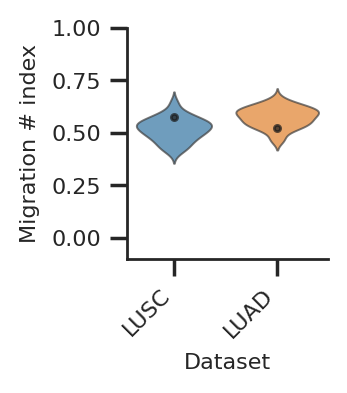

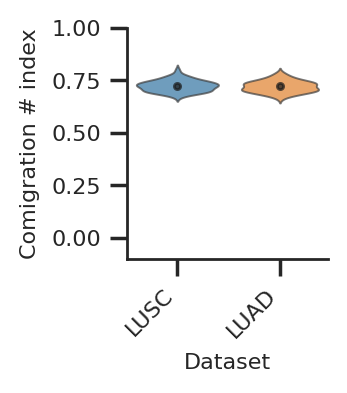

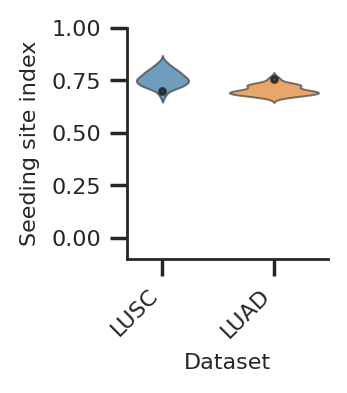

In [264]:
rows_to_add = []
for _, group in thetas_split_on_same_cohort.groupby(thetas_split_on_same_cohort.index // group_size):
    assert(math.isclose(group['Fit theta'].sum(),1.0, rel_tol=tolerance, abs_tol=tolerance))
    dataset = group['dataset'].unique().item()

    mig = float(group[group['Parsimony metric']=="Migration"]["Fit theta"].item())
    comig = float(group[group['Parsimony metric']=="Comigration"]["Fit theta"].item())
    ss = float(group[group['Parsimony metric']=="Seeding site"]["Fit theta"].item())
    rows_to_add.append([dataset,  "Migration # index", 1-(mig)])
    rows_to_add.append([dataset,  "Comigration # index", 1-(comig)])
    rows_to_add.append([dataset,  "Seeding site index", 1-ss])

full_df = pd.concat([thetas_split_on_same_cohort, pd.DataFrame(rows_to_add, columns=thetas_split_on_same_cohort.columns)], axis=0)

plot_all_metrics(full_df, "Migration # index", False, shape=(2,2.3), name="nsclc_subtype", colors=['tab:blue', 'tab:orange'])
plot_all_metrics(full_df, "Comigration # index", False, shape=(2,2.3), name="nsclc_subtype", colors=['tab:blue', 'tab:orange'])
plot_all_metrics(full_df, "Seeding site index", False, shape=(2,2.3), name="nsclc_subtype", colors=['tab:blue', 'tab:orange'])


### Histogram of the number of metastases each patient has (in all cancer cohorts)

In [438]:
# Reload all patient data (not excluding patients with <2 mets)
DATASET_NAMES = ["Breast", "HGSOC", "Melanoma", "Neuroblastoma", "NSCLC"]
CALIBRATE_DIRS = [os.path.join(REPO_DIR,"data/hoadley_breast_cancer_2016/metient_outputs/calibrate"),
                  os.path.join(REPO_DIR,"data/mcpherson_ovarian_2016/metient_outputs/calibrate"),
                  os.path.join(REPO_DIR,"data/sanborn_melanoma_2015/metient_outputs/calibrate"),
                  os.path.join(REPO_DIR,"data/gundem_neuroblastoma_2023/metient_outputs/calibrate"),
                  os.path.join(REPO_DIR,"data/tracerx_nsclc/metient_outputs/pyclone_clustered_conipher_trees_02202024_softer_wm/calibrate")]

num_mets = []
dataset_to_all_pickle_files = {dataset:[] for dataset in DATASET_NAMES}
for dataset_name, calibrate_dir in zip(DATASET_NAMES, CALIBRATE_DIRS):
    matching_files = glob.glob(f'{calibrate_dir}/*pkl.gz')
    for fn in matching_files:
        with gzip.open(fn, 'rb') as f:
            pkl = pickle.load(f)
            num_sites = len(pkl[OUT_SITES_KEY])
            loss_dicts = pkl[OUT_LOSS_DICT_KEY]
            dataset_to_all_pickle_files[dataset_name].append((fn, num_sites))
            
# Do the same with nsclc patients for each nsclc subtype
nsclc_subtype_to_all_pickle_files = {"LUSC":[], "LUAD":[]}
pattern = re.compile(r'CRUK[^_]+')
tracerx_pids = [pattern.search(fn[0]).group() for fn in dataset_to_all_pickle_files['NSCLC']]
print(len(tracerx_pids))
for pid,fn in zip(tracerx_pids, dataset_to_all_pickle_files['NSCLC']):
    subtype = tracerx_patient_info[tracerx_patient_info['cruk_id']==pid]['histology_multi_full_genomically.confirmed'].item()
    subtype = "LUAD" if "LUAD" in subtype else subtype
    if subtype == "Other":
        print("Not LUAD or LUSC subtype", pid)
        continue
    nsclc_subtype_to_all_pickle_files[subtype].append((fn[0], fn[1])) 

128
Not LUAD or LUSC subtype CRUK0702
Not LUAD or LUSC subtype CRUK0514
Not LUAD or LUSC subtype CRUK0325
Not LUAD or LUSC subtype CRUK0718
Not LUAD or LUSC subtype CRUK0422
Not LUAD or LUSC subtype CRUK0596
Not LUAD or LUSC subtype CRUK0476
Not LUAD or LUSC subtype CRUK0719
Not LUAD or LUSC subtype CRUK0100
Not LUAD or LUSC subtype CRUK0557
Not LUAD or LUSC subtype CRUK0099
Not LUAD or LUSC subtype CRUK0587
Not LUAD or LUSC subtype CRUK0524
Not LUAD or LUSC subtype CRUK0484
Not LUAD or LUSC subtype CRUK0769
Not LUAD or LUSC subtype CRUK0097
Not LUAD or LUSC subtype CRUK0698
Not LUAD or LUSC subtype CRUK0640
Not LUAD or LUSC subtype CRUK0013
Not LUAD or LUSC subtype CRUK0598
Not LUAD or LUSC subtype CRUK0245


In [439]:
def plot_hist(df, hue, bin_edges, colors, shape=(3.2,2)):
    sns.set(style='ticks', rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 'ytick.labelsize': 8, 'axes.linewidth': 1.0})
    fig = plt.figure(figsize=(shape[0],shape[1]), dpi=200)
    
    print(bin_edges)
    ax = sns.histplot(df, hue=hue, x="Number of metastases", kde=False,  alpha=0.6, palette=colors, 
                      bins=bin_edges,legend=False, multiple='dodge', shrink=0.85, stat="count")
    ax.set_xlim(math.floor(bin_edges[0]), math.ceil(bin_edges[-1]))
    plt.xticks(ticks=[x for x in range(math.floor(bin_edges[0]), math.ceil(bin_edges[-1])+1)])
    plt.xlabel('Number of metastases')
    plt.ylabel('Number of patients')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.setp(ax.collections, alpha=0.7)
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
    plt.tight_layout(pad=1.6) 
    # saved_name = name + "_" + "_".join(metric.split(" "))
    # plt.savefig(f"output_plots/{saved_name}_theta_distribution_stat.png", dpi=300)
    plt.show()
    plt.close()
    

[3, 3, 2, 3, 4, 5, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 5, 2, 2, 3, 2, 2, 4]
[2, 4, 3, 6, 2, 4, 2, 2, 3, 3, 5, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 6, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 4, 6, 3, 2, 5, 2, 5, 2, 2, 3, 2, 3, 3, 6, 2, 2, 4, 2, 3, 2, 3, 2, 2]
[0.5 1.5 2.5 3.5 4.5 5.5]


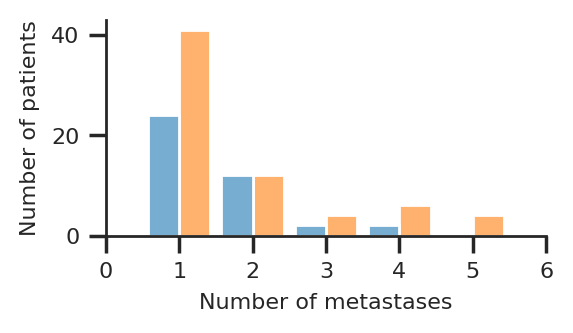

In [440]:
colors = ["tab:blue", "tab:orange"]
lusc_met_counts = [x[1] for x in nsclc_subtype_to_all_pickle_files['LUSC']]
luad_met_counts = [x[1] for x in nsclc_subtype_to_all_pickle_files['LUAD']]
print(lusc_met_counts)
print(luad_met_counts)
data = []
for name, counts in zip(["LUSC", "LUAD"], [lusc_met_counts, luad_met_counts]):
    for count in counts:
        data.append([name, count-1])
df = pd.DataFrame(data, columns=["Subtype", "Number of metastases"])
bin_edges = np.arange(min(min(lusc_met_counts), min(luad_met_counts))-1.5, max(max(lusc_met_counts), max(luad_met_counts)), 1)
plot_hist(df, "Subtype", bin_edges, colors)


In [462]:
data = []
for dataset in dataset_to_all_pickle_files:
    fns = dataset_to_all_pickle_files[dataset]
    for fn in fns:
        if fn[1] < 9:
            data.append([dataset,fn[1]-1])
        else:
            print(dataset, fn[1])
df = pd.DataFrame(data, columns=["Cancer type", "Number of metastases"])
print(df)  

for dataset,color in zip(DATASET_NAMES, sns.color_palette("flare")[1:6]):
    sns.set(style='ticks', rc={'axes.labelsize': 6, 'xtick.labelsize': 6, 'ytick.labelsize': 6, 'axes.linewidth': 1.0})
    fig = plt.figure(figsize=(2,1.5), dpi=200)
    bin_edges = np.arange(0.5, 10.5, 1)
    
    print(bin_edges)

    ax = sns.histplot(data=df[df['Cancer type']==dataset], x='Number of metastases', legend=False,
                     stat="probability", hue='Cancer type', alpha=0.7, palette=[color], bins=bin_edges,
                     )
    ax.set_xlim(0,8)
    ax.set_ylim(0,1.0)
    plt.xticks(ticks=[x for x in range(0,9)])
    plt.xlabel('Number of metastases')
    plt.ylabel('Fraction of cohort')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.setp(ax.collections, alpha=0.7)
    plt.tight_layout(pad=1.6) 
    plt.savefig(f"output_plots/{dataset}_num_mets_histogram.png", dpi=300)
    plt.close()


Neuroblastoma 17
    Cancer type  Number of metastases
0        Breast                     4
1        Breast                     5
2         HGSOC                     2
3         HGSOC                     2
4         HGSOC                     2
..          ...                   ...
165       NSCLC                     2
166       NSCLC                     1
167       NSCLC                     3
168       NSCLC                     1
169       NSCLC                     1

[170 rows x 2 columns]
[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


In [309]:
nsclc_subtype_to_pickle_files['LUAD']

[('/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/tracerx_nsclc/metient_outputs/pyclone_clustered_conipher_trees_02202024_softer_wm/calibrate/CRUK0722_primary_SU_T1.pkl.gz',
  4),
 ('/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/tracerx_nsclc/metient_outputs/pyclone_clustered_conipher_trees_02202024_softer_wm/calibrate/CRUK0284_primary_SU_T1.pkl.gz',
  3),
 ('/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/tracerx_nsclc/metient_outputs/pyclone_clustered_conipher_trees_02202024_softer_wm/calibrate/CRUK0762_primary_SU_T1.pkl.gz',
  6),
 ('/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/tracerx_nsclc/metient_outputs/pyclone_clustered_conipher_trees_02202024_softer_wm/calibrate/CRUK0543_primary_SU_T1.pkl.gz',
  4),
 ('/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/../data/tracerx_nsclc/metient_outputs/pyclone_clustered_conipher_trees_02202024_softer_w